In [ ]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
from tabulate import tabulate  

def analyze_ham10000(dataset_path):
    try:
        print("\nLoading Dataset Analysis")
        
        metadata_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
        
        if not os.path.exists(metadata_file):
            print("Metadata file not found in the dataset directory.")
            return
        
        metadata = pd.read_csv(metadata_file)
        
        # Treat "unknown" as missing values
        metadata.replace("unknown", pd.NA, inplace=True)
        
        missing_values = metadata.isnull().sum().sum()
        print(f"Missing values: {missing_values}")
        
        class_column = "dx"
        class_counts = metadata[class_column].value_counts()
        
        print(f"Number of classes: {class_counts.nunique()}")
        for label, count in class_counts.items():
            print(f"Images for class {label}: {count}")
        
        avg_class_count = sum(class_counts.values) / class_counts.nunique()
        is_balanced = all(abs(count - avg_class_count) <= 0.1 * avg_class_count for count in class_counts.values)
        print(f"Dataset is balanced: {is_balanced}")
        
        image_folders = ["HAM10000_images_part_1", "HAM10000_images_part_2"]
        total_images = 0
        for folder in image_folders:
            folder_path = os.path.join(dataset_path, folder)
            if os.path.exists(folder_path):
                total_images += len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
        print(f"Total number of images: {total_images}")
    
    except Exception as e:
        print(f"Error: {e}")

def display_random_images(dataset_path, num_images=2):
    print("\nLoading Random Images")
    image_folders = ["HAM10000_images_part_1", "HAM10000_images_part_2"]
    image_files = []
    
    for folder in image_folders:
        folder_path = os.path.join(dataset_path, folder)
        if os.path.exists(folder_path):
            image_files.extend([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')])
    
    if len(image_files) < num_images:
        print(f"Not enough images in the directory. Found only {len(image_files)} images.")
        return
    
    selected_images = random.sample(image_files, num_images)
    
    plt.figure(figsize=(8, 4))
    
    for i, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i + 1}")
    
    plt.show()

def analyze_metadata(dataset_path):
    try:
        print("\nLoading Metadata Analysis")
        meta_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
        
        if not os.path.exists(meta_file):
            print("Metadata file not found.")
            return
        
        metadata = pd.read_csv(meta_file)
        
        # Print the first few rows of the metadata
        print("\nFirst few rows of the metadata:")
        print(tabulate(metadata.head(), headers='keys', tablefmt='pretty', showindex=False))
        
        # Print the metadata columns
        print("\nMetadata Columns:")
        print(metadata.columns.tolist())
        
        # Treat "unknown" as missing values
        metadata.replace("unknown", pd.NA, inplace=True)
        
        missing_values = metadata.isnull().sum()
        print("\nMissing Values Per Column:")
        print(tabulate(missing_values.items(), headers=["Column", "Missing Values"], tablefmt="pretty"))
        
        plot_titles = {
            "dx": "Diagnosis Distribution",
            "dx_type": "Diagnosis Type Distribution"
        }
        
        x_labels = {
            "dx": "Diagnosis",
            "dx_type": "Diagnosis Type"
        }
        
        for col, title in plot_titles.items():
            if col in metadata.columns:
                plt.figure(figsize=(8, 6))
                ax = sns.countplot(x=metadata[col], order=metadata[col].value_counts().index, color='skyblue', edgecolor='black')
                
                for p in ax.patches:
                    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                                ha='center', va='bottom', fontsize=10, color='black')
                
                plt.xticks(rotation=45, ha='right')
                plt.title(title)
                plt.xlabel(x_labels[col])
                plt.ylabel("Number of Cases")
                plt.show()
    
    except Exception as e:
        print(f"Error: {e}")

      
# Specify dataset path
dataset_path = "/kaggle/input/skin-cancer-mnist-ham10000/"

# Run analysis
analyze_ham10000(dataset_path)
display_random_images(dataset_path, num_images=2)
analyze_metadata(dataset_path)


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

def clean_and_plot_metadata(dataset_path, save_path="/kaggle/working/"):
    try:
        print("\nCleaning Metadata")
        meta_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
        
        if not os.path.exists(meta_file):
            print("Metadata file not found.")
            return None
        
        metadata = pd.read_csv(meta_file)
        
        # Clean the metadata
        metadata_cleaned = metadata.copy()
        
        # Fill missing values for 'sex' and 'localization' with mode and handle 'unknown' values
        metadata_cleaned['sex'] = metadata_cleaned['sex'].fillna(metadata_cleaned['sex'].mode()[0])
        metadata_cleaned['localization'] = metadata_cleaned['localization'].fillna(metadata_cleaned['localization'].mode()[0])
        
        # Replace 'unknown' with NaN in 'sex' and 'localization' and then fill these with mode
        metadata_cleaned['sex'] = metadata_cleaned['sex'].replace("unknown", pd.NA)
        metadata_cleaned['localization'] = metadata_cleaned['localization'].replace("unknown", pd.NA)
        metadata_cleaned['sex'] = metadata_cleaned['sex'].fillna(metadata_cleaned['sex'].mode()[0])
        metadata_cleaned['localization'] = metadata_cleaned['localization'].fillna(metadata_cleaned['localization'].mode()[0])
        
        # For 'age', fill missing values with the mean
        metadata_cleaned['age'] = pd.to_numeric(metadata_cleaned['age'], errors='coerce')  
        metadata_cleaned['age'] = metadata_cleaned['age'].fillna(metadata_cleaned['age'].mean())
        
        # Save the cleaned metadata 
        csv_path = os.path.join(save_path, "HAM10000_metadata_cleaned.csv")
        metadata_cleaned.to_csv(csv_path, index=False)
        print(f"\nCleaned metadata saved to: {csv_path}")
        
        # Reporting missing values 
        missing_values = metadata_cleaned.isnull().sum()
        print("\nMissing Values Per Column:")
        print(tabulate(missing_values.items(), headers=["Column", "Missing Values"], tablefmt="pretty"))
        
        # Plotting graph
        print("\nPlotting Graphs")

        plot_titles = {
            "sex": "Sex Distribution",
            "age": "Age Distribution",
            "localization": "Localization Distribution"
        }
        
        x_labels = {
            "sex": "Sex",
            "age": "Age",
            "localization": "Localization"
        }
        
        
        for col, title in plot_titles.items():
            plt.figure(figsize=(8, 6))
            
            if col == "age":
               
                ax = sns.histplot(metadata_cleaned[col], bins=20, kde=True, color='skyblue', edgecolor='black')
                
               
                ax.set_xticks(range(0, int(metadata_cleaned['age'].max())+5, 5))  
                
                # Annotate the bars with the count values
                for p in ax.patches:
                    ax.annotate(f'{int(p.get_height())}', 
                                (p.get_x() + p.get_width() / 2, p.get_height()),
                                ha='center', va='bottom', fontsize=10, color='black')
            
            else:
                # For categorical columns 
                ax = sns.countplot(x=metadata_cleaned[col], order=metadata_cleaned[col].value_counts().index, color='skyblue', edgecolor='black')
                
                for p in ax.patches:
                    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                                ha='center', va='bottom', fontsize=10, color='black')
            
            #  graph formatting
            plt.title(title)
            plt.xlabel(x_labels[col])
            plt.ylabel("Number of Cases")
            plt.xticks(rotation=45, ha='right')
            plt.show()

        return metadata_cleaned
    
    except Exception as e:
        print(f"Error: {e}")
        return None

# Specify dataset path
dataset_path = "/kaggle/input/skin-cancer-mnist-ham10000/"
save_path = "/kaggle/working/"

# Run the function 
cleaned_metadata = clean_and_plot_metadata(dataset_path, save_path)


/usr/local/lib/python3.10/site-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
E0000 00:00:1744458401.294687      10 common_lib.cc:621] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:232


[2025-04-12 11:46:44] Using TPU for computation
[2025-04-12 11:46:44] Using device: xla:0
[2025-04-12 11:46:44] Using TPU-specific settings
[2025-04-12 11:46:44] 
Loading and augmenting dataset...
[2025-04-12 11:46:44] 
Initial class distribution:
[2025-04-12 11:46:44] nv: 6705
[2025-04-12 11:46:44] mel: 1113
[2025-04-12 11:46:44] bkl: 1099
[2025-04-12 11:46:44] bcc: 514
[2025-04-12 11:46:44] akiec: 327
[2025-04-12 11:46:44] vasc: 142
[2025-04-12 11:46:44] df: 115


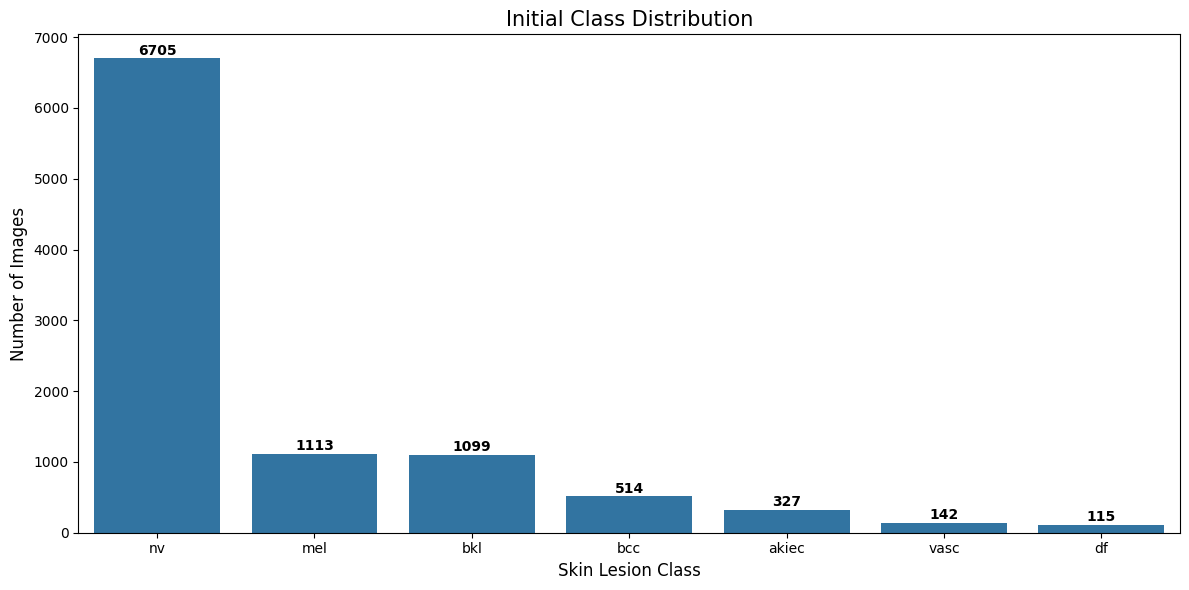

[2025-04-12 11:46:45] 
Class distribution after downsampling:
[2025-04-12 11:46:45] nv: 6705
[2025-04-12 11:46:45] mel: 1113
[2025-04-12 11:46:45] bkl: 1099
[2025-04-12 11:46:45] bcc: 514
[2025-04-12 11:46:45] akiec: 327
[2025-04-12 11:46:45] vasc: 142
[2025-04-12 11:46:45] df: 115
[2025-04-12 11:46:45] 
STEP 1: Processing original images and generating augmentations


Processing original images: 100%|██████████| 10015/10015 [02:19<00:00, 71.71it/s]


[2025-04-12 11:49:05] 
Generating augmented images...
[2025-04-12 11:49:05] Augmenting 'akiec' class: adding 6378 samples to reach 6705


Preloading images for akiec: 100%|██████████| 327/327 [00:02<00:00, 151.52it/s]


[2025-04-12 11:49:15] Generated 3000/6378 augmented samples for class akiec
[2025-04-12 11:49:24] Generated 6000/6378 augmented samples for class akiec
[2025-04-12 11:49:25] Augmenting 'bcc' class: adding 6191 samples to reach 6705


Preloading images for bcc: 100%|██████████| 514/514 [00:03<00:00, 155.91it/s]


[2025-04-12 11:49:37] Generated 3000/6191 augmented samples for class bcc
[2025-04-12 11:49:45] Generated 6000/6191 augmented samples for class bcc
[2025-04-12 11:49:46] Augmenting 'bkl' class: adding 5606 samples to reach 6705


Preloading images for bkl: 100%|██████████| 1099/1099 [00:07<00:00, 143.27it/s]


[2025-04-12 11:50:02] Generated 3000/5606 augmented samples for class bkl
[2025-04-12 11:50:09] Augmenting 'df' class: adding 6590 samples to reach 6705


Preloading images for df: 100%|██████████| 115/115 [00:00<00:00, 146.78it/s]


[2025-04-12 11:50:17] Generated 3000/6590 augmented samples for class df
[2025-04-12 11:50:26] Generated 6000/6590 augmented samples for class df
[2025-04-12 11:50:28] Augmenting 'mel' class: adding 5592 samples to reach 6705


Preloading images for mel: 100%|██████████| 1113/1113 [00:08<00:00, 135.98it/s]


[2025-04-12 11:50:44] Generated 3000/5592 augmented samples for class mel
[2025-04-12 11:50:52] Class 'nv' already has 6705 samples, no augmentation needed
[2025-04-12 11:50:52] Augmenting 'vasc' class: adding 6563 samples to reach 6705


Preloading images for vasc: 100%|██████████| 142/142 [00:00<00:00, 150.33it/s]


[2025-04-12 11:51:00] Generated 3000/6563 augmented samples for class vasc
[2025-04-12 11:51:09] Generated 6000/6563 augmented samples for class vasc
[2025-04-12 11:51:11] 
STEP 2: Creating transforms for different model architectures
[2025-04-12 11:51:11] Applying resize and normalize for dataset splitting...


Processing images: 100%|██████████| 46935/46935 [02:29<00:00, 313.65it/s]


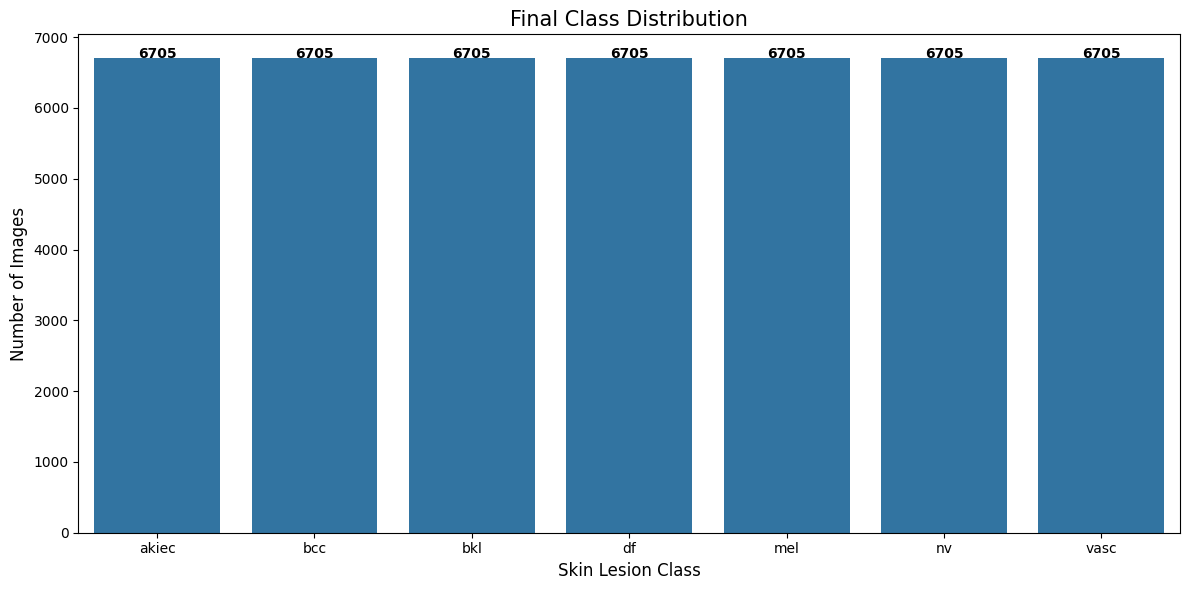

[2025-04-12 11:53:41] 
STEP 3: Splitting dataset into train, validation, and test sets
[2025-04-12 11:53:41] Splitting dataset: 32855 train, 7041 validation, 7041 test samples
[2025-04-12 11:53:49] Validation set size: 7041, Test set size: 7041


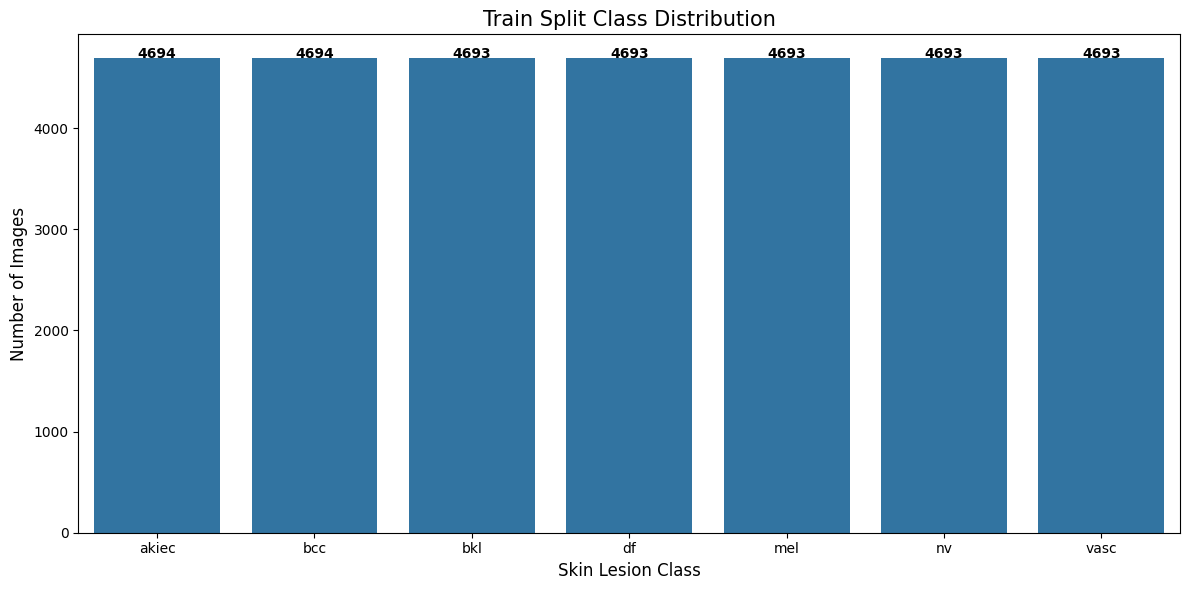

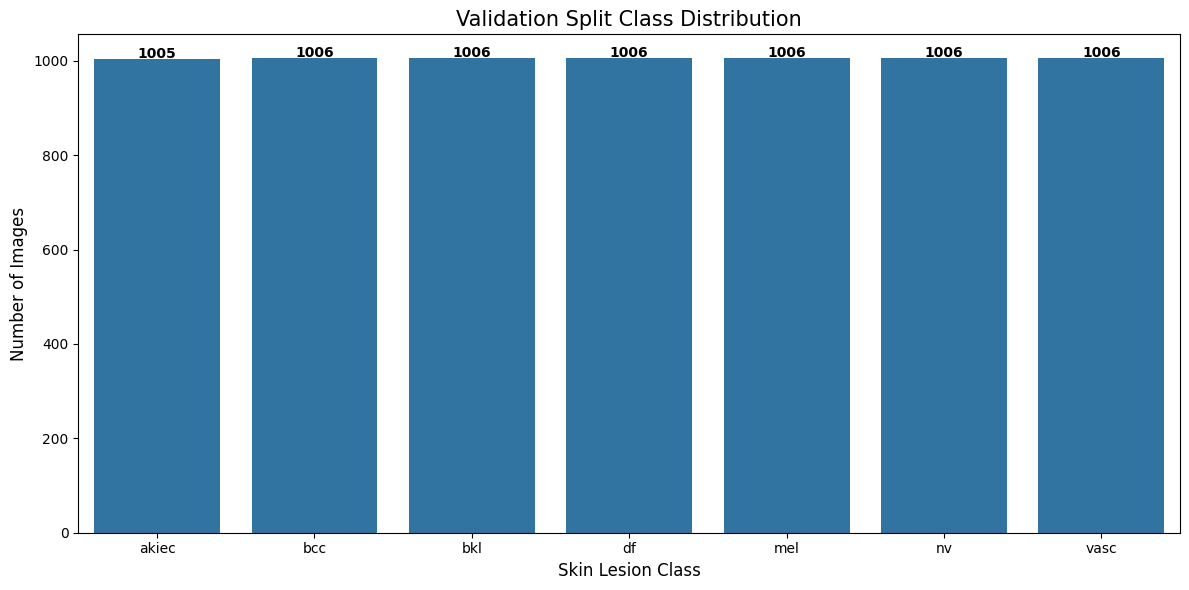

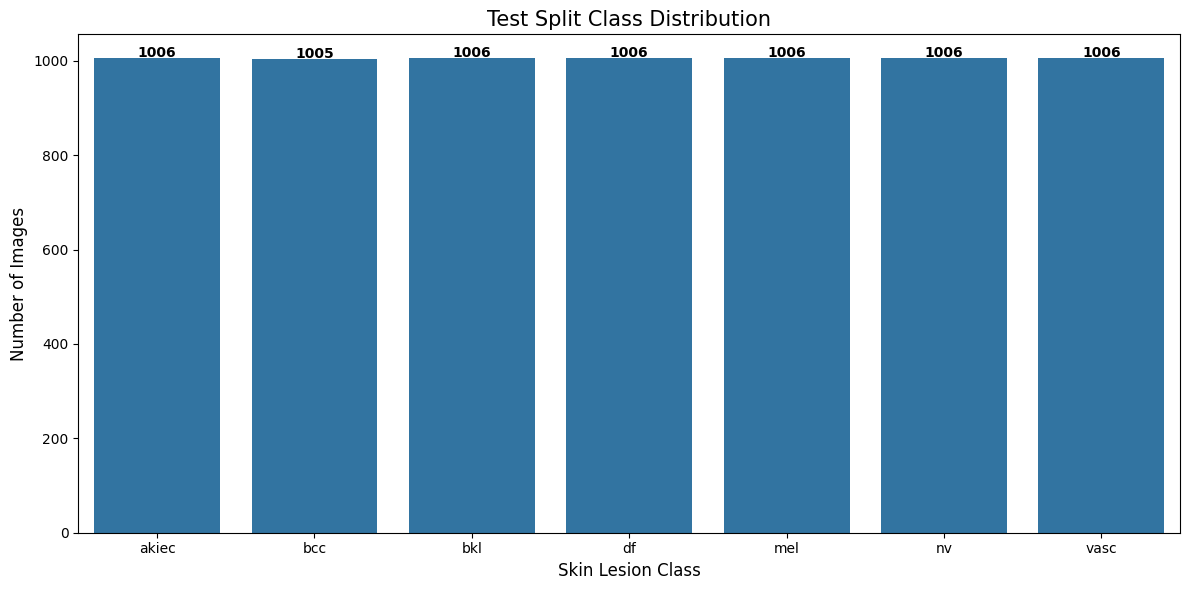

[2025-04-12 11:53:51] Using batch_size=128, num_workers=96
[2025-04-12 11:55:24] mobilenetv3 - Batch 0 - Image shape: torch.Size([128, 3, 224, 224]), Labels shape: torch.Size([128])
[2025-04-12 11:57:04] densenet121 - Batch 0 - Image shape: torch.Size([128, 3, 224, 224]), Labels shape: torch.Size([128])
[2025-04-12 11:58:42] resnet50 - Batch 0 - Image shape: torch.Size([128, 3, 224, 224]), Labels shape: torch.Size([128])
[2025-04-12 11:58:47] 
Dataset preparation completed successfully!
[2025-04-12 11:58:50] 
Dataset Information:
[2025-04-12 11:58:50] Classes: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
[2025-04-12 11:58:50] Dataset sizes: {'train': 32853, 'validation': 7041, 'test': 7041, 'total': 46935}


Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 132MB/s] 
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 153MB/s] 
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 188MB/s] 


[2025-04-12 11:58:52] 
----- Training mobilenetv3 -----
[2025-04-12 11:58:52] Using TPU for computation
[2025-04-12 11:58:52] Using device: xla:0 for mobilenetv3
[2025-04-12 11:58:52] Starting training for mobilenetv3, will log updates every 10 minutes


mobilenetv3 - Epoch 1/10: 100%|██████████| 257/257 [02:04<00:00,  2.07it/s]


[2025-04-12 12:02:36]  Best mobilenetv3 model saved with Val Accuracy: 0.7293
[2025-04-12 12:02:36] 
mobilenetv3 - Epoch 1/10
[2025-04-12 12:02:36] Train Loss: 0.8922, Train Accuracy: 0.6736
[2025-04-12 12:02:36] Val Loss: 0.7397, Val Accuracy: 0.7293
[2025-04-12 12:02:36] Epoch Time: 224.19 seconds


mobilenetv3 - Epoch 2/10: 100%|██████████| 257/257 [01:53<00:00,  2.27it/s]


[2025-04-12 12:05:54]  Best mobilenetv3 model saved with Val Accuracy: 0.7801
[2025-04-12 12:05:54] 
mobilenetv3 - Epoch 2/10
[2025-04-12 12:05:54] Train Loss: 0.6465, Train Accuracy: 0.7615
[2025-04-12 12:05:54] Val Loss: 0.6114, Val Accuracy: 0.7801
[2025-04-12 12:05:54] Epoch Time: 195.92 seconds


mobilenetv3 - Epoch 3/10: 100%|██████████| 257/257 [01:48<00:00,  2.37it/s]


[2025-04-12 12:09:05]  Best mobilenetv3 model saved with Val Accuracy: 0.8120
[2025-04-12 12:09:05] 
mobilenetv3 - Epoch 3/10
[2025-04-12 12:09:05] Train Loss: 0.5483, Train Accuracy: 0.7962
[2025-04-12 12:09:05] Val Loss: 0.5187, Val Accuracy: 0.8120
[2025-04-12 12:09:05] Epoch Time: 190.92 seconds


mobilenetv3 - Epoch 4/10:   0%|          | 0/257 [00:00<?, ?it/s]

[2025-04-12 12:10:19] Progress: mobilenetv3 training - Epoch 4/10, Batch 0/257


mobilenetv3 - Epoch 4/10: 100%|██████████| 257/257 [01:47<00:00,  2.39it/s]


[2025-04-12 12:12:13]  Best mobilenetv3 model saved with Val Accuracy: 0.8260
[2025-04-12 12:12:13] 
mobilenetv3 - Epoch 4/10
[2025-04-12 12:12:13] Train Loss: 0.4731, Train Accuracy: 0.8253
[2025-04-12 12:12:13] Val Loss: 0.4669, Val Accuracy: 0.8260
[2025-04-12 12:12:13] Epoch Time: 186.88 seconds


mobilenetv3 - Epoch 5/10: 100%|██████████| 257/257 [01:44<00:00,  2.45it/s]


[2025-04-12 12:15:21]  Best mobilenetv3 model saved with Val Accuracy: 0.8424
[2025-04-12 12:15:21] 
mobilenetv3 - Epoch 5/10
[2025-04-12 12:15:21] Train Loss: 0.4254, Train Accuracy: 0.8429
[2025-04-12 12:15:21] Val Loss: 0.4285, Val Accuracy: 0.8424
[2025-04-12 12:15:21] Epoch Time: 187.62 seconds


mobilenetv3 - Epoch 6/10: 100%|██████████| 257/257 [01:44<00:00,  2.46it/s]


[2025-04-12 12:18:28]  Best mobilenetv3 model saved with Val Accuracy: 0.8496
[2025-04-12 12:18:28] 
mobilenetv3 - Epoch 6/10
[2025-04-12 12:18:28] Train Loss: 0.3848, Train Accuracy: 0.8600
[2025-04-12 12:18:28] Val Loss: 0.3863, Val Accuracy: 0.8496
[2025-04-12 12:18:28] Epoch Time: 186.96 seconds


mobilenetv3 - Epoch 7/10: 100%|██████████| 257/257 [01:47<00:00,  2.38it/s]


[2025-04-12 12:21:39]  Best mobilenetv3 model saved with Val Accuracy: 0.8664
[2025-04-12 12:21:39] 
mobilenetv3 - Epoch 7/10
[2025-04-12 12:21:39] Train Loss: 0.3446, Train Accuracy: 0.8737
[2025-04-12 12:21:39] Val Loss: 0.3610, Val Accuracy: 0.8664
[2025-04-12 12:21:39] Epoch Time: 190.41 seconds


mobilenetv3 - Epoch 8/10:   0%|          | 0/257 [00:00<?, ?it/s]

[2025-04-12 12:22:50] Progress: mobilenetv3 training - Epoch 8/10, Batch 0/257


mobilenetv3 - Epoch 8/10: 100%|██████████| 257/257 [01:46<00:00,  2.40it/s]


[2025-04-12 12:24:45]  Best mobilenetv3 model saved with Val Accuracy: 0.8735
[2025-04-12 12:24:45] 
mobilenetv3 - Epoch 8/10
[2025-04-12 12:24:45] Train Loss: 0.3075, Train Accuracy: 0.8868
[2025-04-12 12:24:45] Val Loss: 0.3432, Val Accuracy: 0.8735
[2025-04-12 12:24:45] Epoch Time: 185.71 seconds


mobilenetv3 - Epoch 9/10: 100%|██████████| 257/257 [01:47<00:00,  2.40it/s]


[2025-04-12 12:27:55]  Best mobilenetv3 model saved with Val Accuracy: 0.8810
[2025-04-12 12:27:55] 
mobilenetv3 - Epoch 9/10
[2025-04-12 12:27:55] Train Loss: 0.2825, Train Accuracy: 0.8962
[2025-04-12 12:27:55] Val Loss: 0.3241, Val Accuracy: 0.8810
[2025-04-12 12:27:55] Epoch Time: 190.11 seconds


mobilenetv3 - Epoch 10/10: 100%|██████████| 257/257 [01:48<00:00,  2.38it/s]


[2025-04-12 12:31:07]  Best mobilenetv3 model saved with Val Accuracy: 0.8862
[2025-04-12 12:31:07] 
mobilenetv3 - Epoch 10/10
[2025-04-12 12:31:07] Train Loss: 0.2620, Train Accuracy: 0.9043
[2025-04-12 12:31:07] Val Loss: 0.3089, Val Accuracy: 0.8862
[2025-04-12 12:31:07] Epoch Time: 190.93 seconds
[2025-04-12 12:31:07] 
Training Complete for mobilenetv3!
[2025-04-12 12:31:07] Total Training Time: 1935.05 seconds


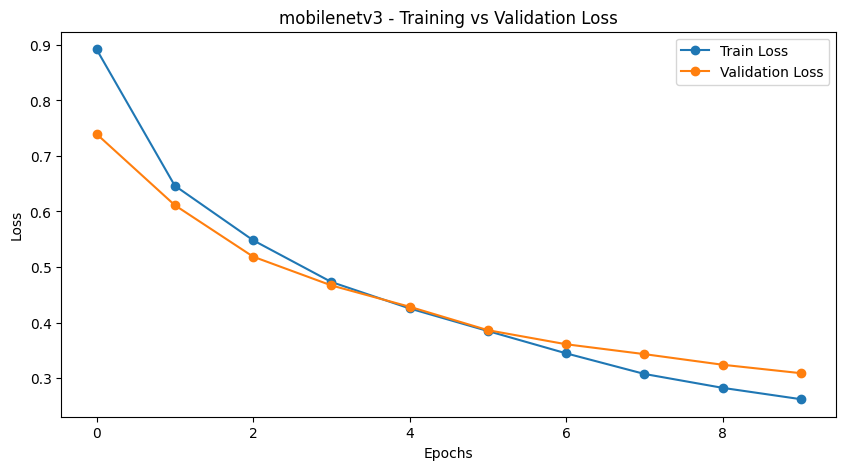

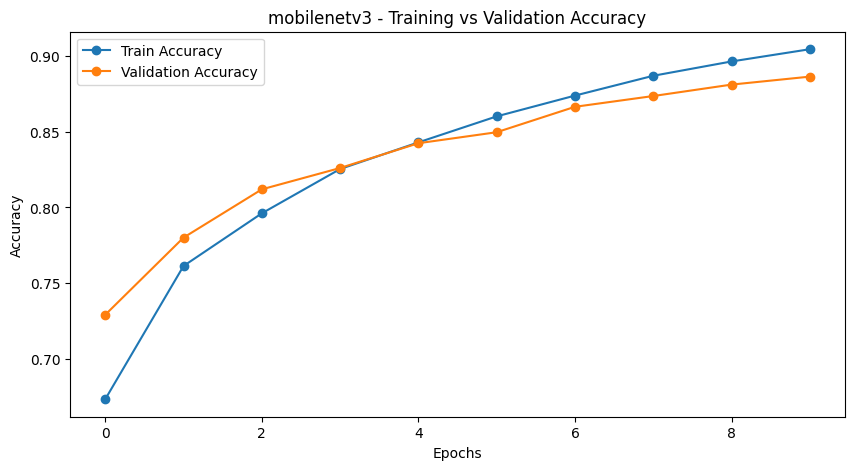

[2025-04-12 12:31:08] 
Time taken for each epoch (seconds):
[2025-04-12 12:31:08] Epoch 1: 224.19 seconds
[2025-04-12 12:31:08] Epoch 2: 195.92 seconds
[2025-04-12 12:31:08] Epoch 3: 190.92 seconds
[2025-04-12 12:31:08] Epoch 4: 186.88 seconds
[2025-04-12 12:31:08] Epoch 5: 187.62 seconds
[2025-04-12 12:31:08] Epoch 6: 186.96 seconds
[2025-04-12 12:31:08] Epoch 7: 190.41 seconds
[2025-04-12 12:31:08] Epoch 8: 185.71 seconds
[2025-04-12 12:31:08] Epoch 9: 190.11 seconds
[2025-04-12 12:31:08] Epoch 10: 190.93 seconds
[2025-04-12 12:31:08] 
----- Training densenet121 -----
[2025-04-12 12:31:08] Using TPU for computation
[2025-04-12 12:31:08] Using device: xla:0 for densenet121
[2025-04-12 12:31:08] Starting training for densenet121, will log updates every 10 minutes


densenet121 - Epoch 1/10: 100%|██████████| 257/257 [03:29<00:00,  1.22it/s]


[2025-04-12 12:36:52]  Best densenet121 model saved with Val Accuracy: 0.9013
[2025-04-12 12:36:52] 
densenet121 - Epoch 1/10
[2025-04-12 12:36:52] Train Loss: 0.4170, Train Accuracy: 0.8448
[2025-04-12 12:36:52] Val Loss: 0.2645, Val Accuracy: 0.9013
[2025-04-12 12:36:52] Epoch Time: 343.38 seconds


densenet121 - Epoch 2/10: 100%|██████████| 257/257 [03:13<00:00,  1.33it/s] 


[2025-04-12 12:41:45]  Best densenet121 model saved with Val Accuracy: 0.9154
[2025-04-12 12:41:45] 
densenet121 - Epoch 2/10
[2025-04-12 12:41:45] Train Loss: 0.1518, Train Accuracy: 0.9442
[2025-04-12 12:41:45] Val Loss: 0.2324, Val Accuracy: 0.9154
[2025-04-12 12:41:45] Epoch Time: 292.39 seconds


densenet121 - Epoch 3/10:   0%|          | 0/257 [00:00<?, ?it/s]

[2025-04-12 12:43:10] Progress: densenet121 training - Epoch 3/10, Batch 0/257


densenet121 - Epoch 3/10: 100%|██████████| 257/257 [02:57<00:00,  1.45it/s]


[2025-04-12 12:46:21]  Best densenet121 model saved with Val Accuracy: 0.9288
[2025-04-12 12:46:21] 
densenet121 - Epoch 3/10
[2025-04-12 12:46:21] Train Loss: 0.0817, Train Accuracy: 0.9717
[2025-04-12 12:46:21] Val Loss: 0.2026, Val Accuracy: 0.9288
[2025-04-12 12:46:21] Epoch Time: 276.18 seconds


densenet121 - Epoch 4/10: 100%|██████████| 257/257 [02:52<00:00,  1.49it/s]


[2025-04-12 12:50:53]  Best densenet121 model saved with Val Accuracy: 0.9425
[2025-04-12 12:50:53] 
densenet121 - Epoch 4/10
[2025-04-12 12:50:53] Train Loss: 0.0505, Train Accuracy: 0.9823
[2025-04-12 12:50:53] Val Loss: 0.1679, Val Accuracy: 0.9425
[2025-04-12 12:50:53] Epoch Time: 271.19 seconds


densenet121 - Epoch 5/10:  60%|██████    | 155/257 [02:17<00:34,  2.95it/s]

[2025-04-12 12:53:10] Progress: densenet121 training - Epoch 5/10, Batch 155/257


densenet121 - Epoch 5/10: 100%|██████████| 257/257 [02:54<00:00,  1.47it/s]


[2025-04-12 12:55:29] 
densenet121 - Epoch 5/10
[2025-04-12 12:55:29] Train Loss: 0.0351, Train Accuracy: 0.9885
[2025-04-12 12:55:29] Val Loss: 0.2073, Val Accuracy: 0.9375
[2025-04-12 12:55:29] Epoch Time: 275.99 seconds


densenet121 - Epoch 6/10: 100%|██████████| 257/257 [02:50<00:00,  1.51it/s]


[2025-04-12 12:59:59]  Best densenet121 model saved with Val Accuracy: 0.9486
[2025-04-12 12:59:59] 
densenet121 - Epoch 6/10
[2025-04-12 12:59:59] Train Loss: 0.0341, Train Accuracy: 0.9893
[2025-04-12 12:59:59] Val Loss: 0.1630, Val Accuracy: 0.9486
[2025-04-12 12:59:59] Epoch Time: 269.27 seconds


densenet121 - Epoch 7/10: 100%|██████████| 257/257 [02:57<00:00,  1.45it/s]


[2025-04-12 13:04:39]  Best densenet121 model saved with Val Accuracy: 0.9540
[2025-04-12 13:04:39] 
densenet121 - Epoch 7/10
[2025-04-12 13:04:39] Train Loss: 0.0323, Train Accuracy: 0.9890
[2025-04-12 13:04:39] Val Loss: 0.1448, Val Accuracy: 0.9540
[2025-04-12 13:04:39] Epoch Time: 279.91 seconds


densenet121 - Epoch 8/10:   0%|          | 0/257 [00:00<?, ?it/s]

[2025-04-12 13:06:05] Progress: densenet121 training - Epoch 8/10, Batch 0/257


densenet121 - Epoch 8/10: 100%|██████████| 257/257 [02:53<00:00,  1.48it/s]


[2025-04-12 13:09:16] 
densenet121 - Epoch 8/10
[2025-04-12 13:09:16] Train Loss: 0.0210, Train Accuracy: 0.9935
[2025-04-12 13:09:16] Val Loss: 0.1524, Val Accuracy: 0.9500
[2025-04-12 13:09:16] Epoch Time: 275.67 seconds


densenet121 - Epoch 9/10: 100%|██████████| 257/257 [02:57<00:00,  1.45it/s]


[2025-04-12 13:13:57]  Best densenet121 model saved with Val Accuracy: 0.9580
[2025-04-12 13:13:57] 
densenet121 - Epoch 9/10
[2025-04-12 13:13:57] Train Loss: 0.0177, Train Accuracy: 0.9942
[2025-04-12 13:13:57] Val Loss: 0.1394, Val Accuracy: 0.9580
[2025-04-12 13:13:57] Epoch Time: 281.17 seconds


densenet121 - Epoch 10/10:  47%|████▋     | 121/257 [02:07<00:46,  2.90it/s]

[2025-04-12 13:16:05] Progress: densenet121 training - Epoch 10/10, Batch 121/257


densenet121 - Epoch 10/10: 100%|██████████| 257/257 [02:57<00:00,  1.45it/s]


[2025-04-12 13:18:38] 
densenet121 - Epoch 10/10
[2025-04-12 13:18:38] Train Loss: 0.0265, Train Accuracy: 0.9905
[2025-04-12 13:18:38] Val Loss: 0.1765, Val Accuracy: 0.9511
[2025-04-12 13:18:38] Epoch Time: 280.80 seconds
[2025-04-12 13:18:39] 
Training Complete for densenet121!
[2025-04-12 13:18:39] Total Training Time: 2850.46 seconds


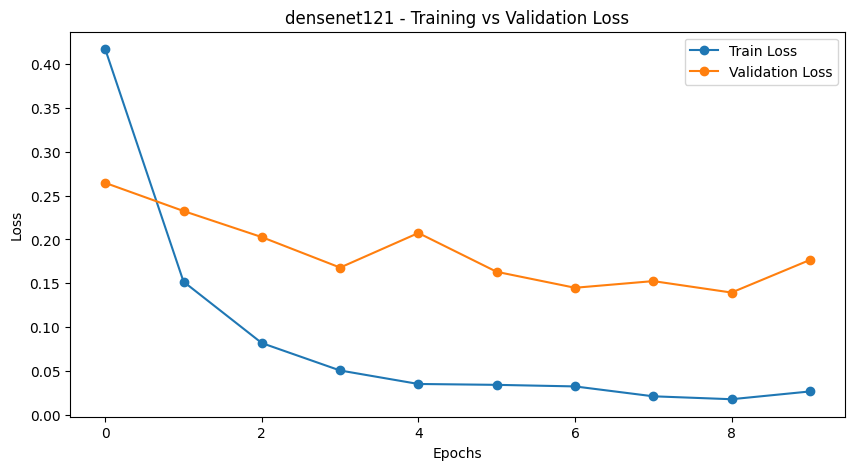

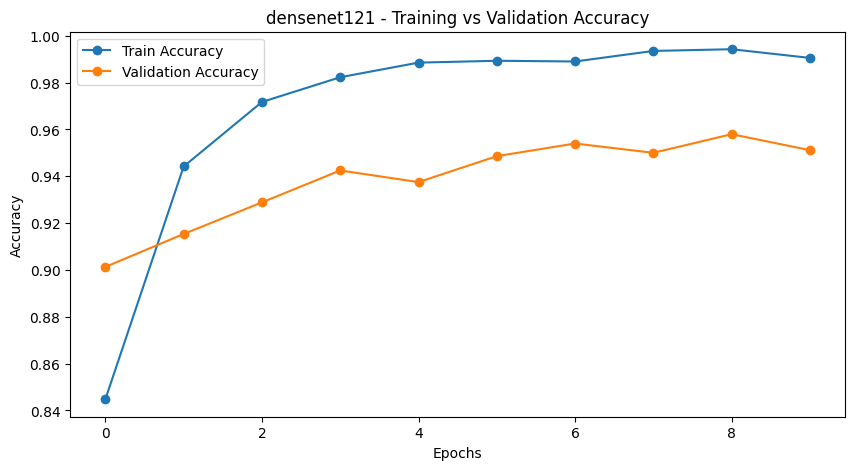

[2025-04-12 13:18:40] 
Time taken for each epoch (seconds):
[2025-04-12 13:18:40] Epoch 1: 343.38 seconds
[2025-04-12 13:18:40] Epoch 2: 292.39 seconds
[2025-04-12 13:18:40] Epoch 3: 276.18 seconds
[2025-04-12 13:18:40] Epoch 4: 271.19 seconds
[2025-04-12 13:18:40] Epoch 5: 275.99 seconds
[2025-04-12 13:18:40] Epoch 6: 269.27 seconds
[2025-04-12 13:18:40] Epoch 7: 279.91 seconds
[2025-04-12 13:18:40] Epoch 8: 275.67 seconds
[2025-04-12 13:18:40] Epoch 9: 281.17 seconds
[2025-04-12 13:18:40] Epoch 10: 280.80 seconds
[2025-04-12 13:18:40] 
----- Training resnet50 -----
[2025-04-12 13:18:40] Using TPU for computation
[2025-04-12 13:18:40] Using device: xla:0 for resnet50
[2025-04-12 13:18:40] Starting training for resnet50, will log updates every 10 minutes


resnet50 - Epoch 1/10: 100%|██████████| 257/257 [02:49<00:00,  1.52it/s]


[2025-04-12 13:23:28]  Best resnet50 model saved with Val Accuracy: 0.8985
[2025-04-12 13:23:28] 
resnet50 - Epoch 1/10
[2025-04-12 13:23:28] Train Loss: 0.4197, Train Accuracy: 0.8463
[2025-04-12 13:23:28] Val Loss: 0.2698, Val Accuracy: 0.8985
[2025-04-12 13:23:28] Epoch Time: 287.79 seconds


resnet50 - Epoch 2/10: 100%|██████████| 257/257 [02:31<00:00,  1.70it/s] 


[2025-04-12 13:27:39]  Best resnet50 model saved with Val Accuracy: 0.9252
[2025-04-12 13:27:39] 
resnet50 - Epoch 2/10
[2025-04-12 13:27:39] Train Loss: 0.1757, Train Accuracy: 0.9357
[2025-04-12 13:27:39] Val Loss: 0.2036, Val Accuracy: 0.9252
[2025-04-12 13:27:39] Epoch Time: 251.06 seconds


resnet50 - Epoch 3/10:   0%|          | 0/257 [00:00<?, ?it/s]

[2025-04-12 13:29:08] Progress: resnet50 training - Epoch 3/10, Batch 0/257


resnet50 - Epoch 3/10: 100%|██████████| 257/257 [02:18<00:00,  1.86it/s]


[2025-04-12 13:31:38]  Best resnet50 model saved with Val Accuracy: 0.9276
[2025-04-12 13:31:38] 
resnet50 - Epoch 3/10
[2025-04-12 13:31:38] Train Loss: 0.1061, Train Accuracy: 0.9623
[2025-04-12 13:31:38] Val Loss: 0.2166, Val Accuracy: 0.9276
[2025-04-12 13:31:38] Epoch Time: 237.98 seconds


resnet50 - Epoch 4/10: 100%|██████████| 257/257 [02:17<00:00,  1.87it/s]


[2025-04-12 13:35:33]  Best resnet50 model saved with Val Accuracy: 0.9374
[2025-04-12 13:35:33] 
resnet50 - Epoch 4/10
[2025-04-12 13:35:33] Train Loss: 0.0668, Train Accuracy: 0.9766
[2025-04-12 13:35:33] Val Loss: 0.1862, Val Accuracy: 0.9374
[2025-04-12 13:35:33] Epoch Time: 235.22 seconds


resnet50 - Epoch 5/10: 100%|██████████| 257/257 [02:19<00:00,  1.85it/s]


[2025-04-12 13:39:33]  Best resnet50 model saved with Val Accuracy: 0.9422
[2025-04-12 13:39:33] 
resnet50 - Epoch 5/10
[2025-04-12 13:39:33] Train Loss: 0.0496, Train Accuracy: 0.9832
[2025-04-12 13:39:33] Val Loss: 0.1927, Val Accuracy: 0.9422
[2025-04-12 13:39:33] Epoch Time: 239.47 seconds


resnet50 - Epoch 6/10:   0%|          | 0/257 [00:00<?, ?it/s]

[2025-04-12 13:41:03] Progress: resnet50 training - Epoch 6/10, Batch 0/257


resnet50 - Epoch 6/10: 100%|██████████| 257/257 [02:18<00:00,  1.86it/s]


[2025-04-12 13:43:32]  Best resnet50 model saved with Val Accuracy: 0.9442
[2025-04-12 13:43:32] 
resnet50 - Epoch 6/10
[2025-04-12 13:43:32] Train Loss: 0.0353, Train Accuracy: 0.9876
[2025-04-12 13:43:32] Val Loss: 0.1924, Val Accuracy: 0.9442
[2025-04-12 13:43:32] Epoch Time: 238.14 seconds


resnet50 - Epoch 7/10: 100%|██████████| 257/257 [02:15<00:00,  1.90it/s]


[2025-04-12 13:47:28] 
resnet50 - Epoch 7/10
[2025-04-12 13:47:28] Train Loss: 0.0329, Train Accuracy: 0.9888
[2025-04-12 13:47:28] Val Loss: 0.2296, Val Accuracy: 0.9374
[2025-04-12 13:47:28] Epoch Time: 235.57 seconds


resnet50 - Epoch 8/10: 100%|██████████| 257/257 [02:18<00:00,  1.86it/s]


[2025-04-12 13:51:25]  Best resnet50 model saved with Val Accuracy: 0.9489
[2025-04-12 13:51:25] 
resnet50 - Epoch 8/10
[2025-04-12 13:51:25] Train Loss: 0.0295, Train Accuracy: 0.9905
[2025-04-12 13:51:25] Val Loss: 0.1758, Val Accuracy: 0.9489
[2025-04-12 13:51:25] Epoch Time: 237.02 seconds


resnet50 - Epoch 9/10:   0%|          | 0/257 [00:00<?, ?it/s]

[2025-04-12 13:52:51] Progress: resnet50 training - Epoch 9/10, Batch 0/257


resnet50 - Epoch 9/10: 100%|██████████| 257/257 [02:15<00:00,  1.90it/s]


[2025-04-12 13:55:23]  Best resnet50 model saved with Val Accuracy: 0.9500
[2025-04-12 13:55:23] 
resnet50 - Epoch 9/10
[2025-04-12 13:55:23] Train Loss: 0.0207, Train Accuracy: 0.9931
[2025-04-12 13:55:23] Val Loss: 0.1907, Val Accuracy: 0.9500
[2025-04-12 13:55:23] Epoch Time: 237.31 seconds


resnet50 - Epoch 10/10: 100%|██████████| 257/257 [02:19<00:00,  1.85it/s]


[2025-04-12 13:59:22]  Best resnet50 model saved with Val Accuracy: 0.9503
[2025-04-12 13:59:22] 
resnet50 - Epoch 10/10
[2025-04-12 13:59:22] Train Loss: 0.0232, Train Accuracy: 0.9925
[2025-04-12 13:59:22] Val Loss: 0.1899, Val Accuracy: 0.9503
[2025-04-12 13:59:22] Epoch Time: 238.23 seconds
[2025-04-12 13:59:22] 
Training Complete for resnet50!
[2025-04-12 13:59:22] Total Training Time: 2442.36 seconds


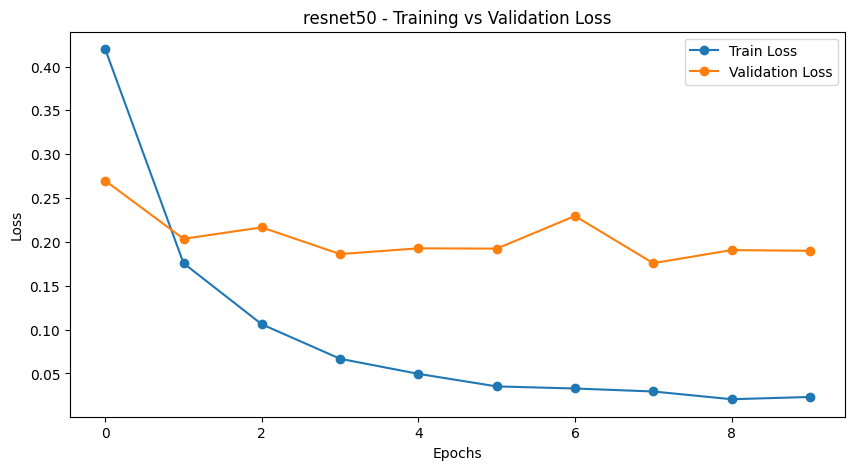

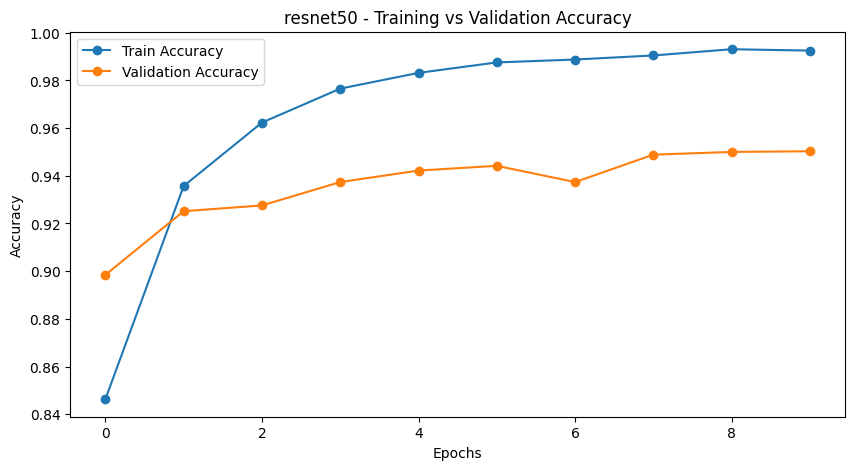

[2025-04-12 13:59:23] 
Time taken for each epoch (seconds):
[2025-04-12 13:59:23] Epoch 1: 287.79 seconds
[2025-04-12 13:59:23] Epoch 2: 251.06 seconds
[2025-04-12 13:59:23] Epoch 3: 237.98 seconds
[2025-04-12 13:59:23] Epoch 4: 235.22 seconds
[2025-04-12 13:59:23] Epoch 5: 239.47 seconds
[2025-04-12 13:59:23] Epoch 6: 238.14 seconds
[2025-04-12 13:59:23] Epoch 7: 235.57 seconds
[2025-04-12 13:59:23] Epoch 8: 237.02 seconds
[2025-04-12 13:59:23] Epoch 9: 237.31 seconds
[2025-04-12 13:59:23] Epoch 10: 238.23 seconds
[2025-04-12 13:59:23] 
----- Evaluating Ensemble Model -----
[2025-04-12 13:59:23] Using TPU for computation
[2025-04-12 13:59:23] 
Evaluating ensemble model...
[2025-04-12 13:59:24] 
Gathering predictions from all models


Getting resnet50 predictions: 100%|██████████| 56/56 [02:07<00:00,  2.27s/it]  


[2025-04-12 14:05:42] 
----- Majority Voting Ensemble Results -----
[2025-04-12 14:05:42] Ensemble Test Accuracy: 0.9614
[2025-04-12 14:05:42] Ensemble Evaluation Time: 378.45 seconds
[2025-04-12 14:05:42] 
Classification Report of Majority Voting Ensemble (MobileNetV3, DenseNet121, ResNet50):
[2025-04-12 14:05:42]               precision  recall  f1-score   support
akiec             0.962   0.996     0.979  1006.000
bcc               0.972   0.986     0.979  1005.000
bkl               0.946   0.897     0.921  1006.000
df                0.991   1.000     0.996  1006.000
mel               0.940   0.906     0.923  1006.000
nv                0.919   0.945     0.932  1006.000
vasc              0.999   1.000     1.000  1006.000
accuracy          0.961   0.961     0.961     0.961
macro avg         0.961   0.961     0.961  7041.000
weighted avg      0.961   0.961     0.961  7041.000


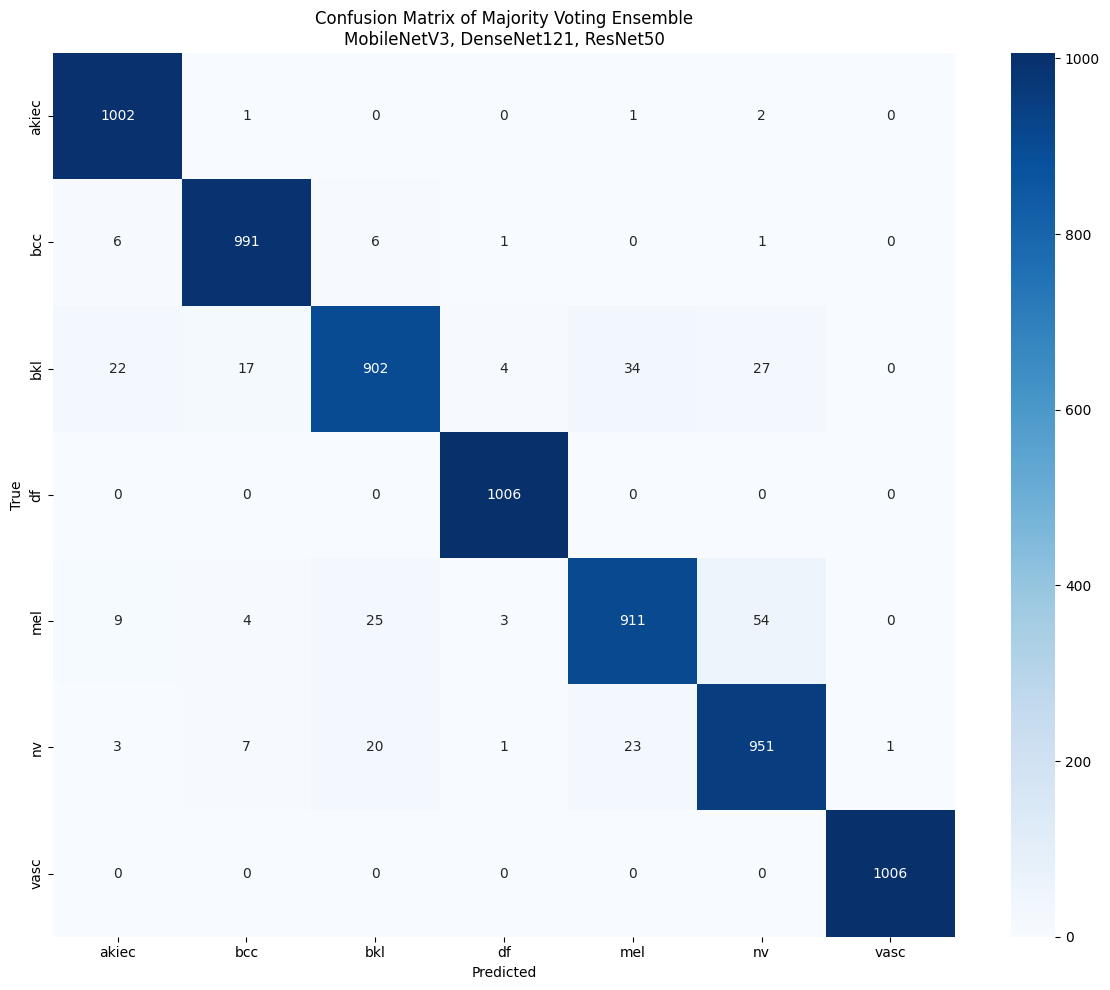

[2025-04-12 14:05:43] Using TPU for computation
[2025-04-12 14:05:43] Evaluating mobilenetv3...


Evaluating mobilenetv3: 100%|██████████| 56/56 [01:49<00:00,  1.95s/it] 


[2025-04-12 14:07:32] 
mobilenetv3 Test Accuracy: 0.8865
[2025-04-12 14:07:32] 
mobilenetv3 Classification Report:
[2025-04-12 14:07:32]               precision  recall  f1-score   support
akiec             0.875   0.911     0.892  1006.000
bcc               0.865   0.917     0.890  1005.000
bkl               0.817   0.735     0.774  1006.000
df                0.960   0.986     0.973  1006.000
mel               0.831   0.777     0.803  1006.000
nv                0.885   0.884     0.885  1006.000
vasc              0.958   0.996     0.977  1006.000
accuracy          0.887   0.887     0.887     0.887
macro avg         0.885   0.887     0.885  7041.000
weighted avg      0.885   0.887     0.885  7041.000


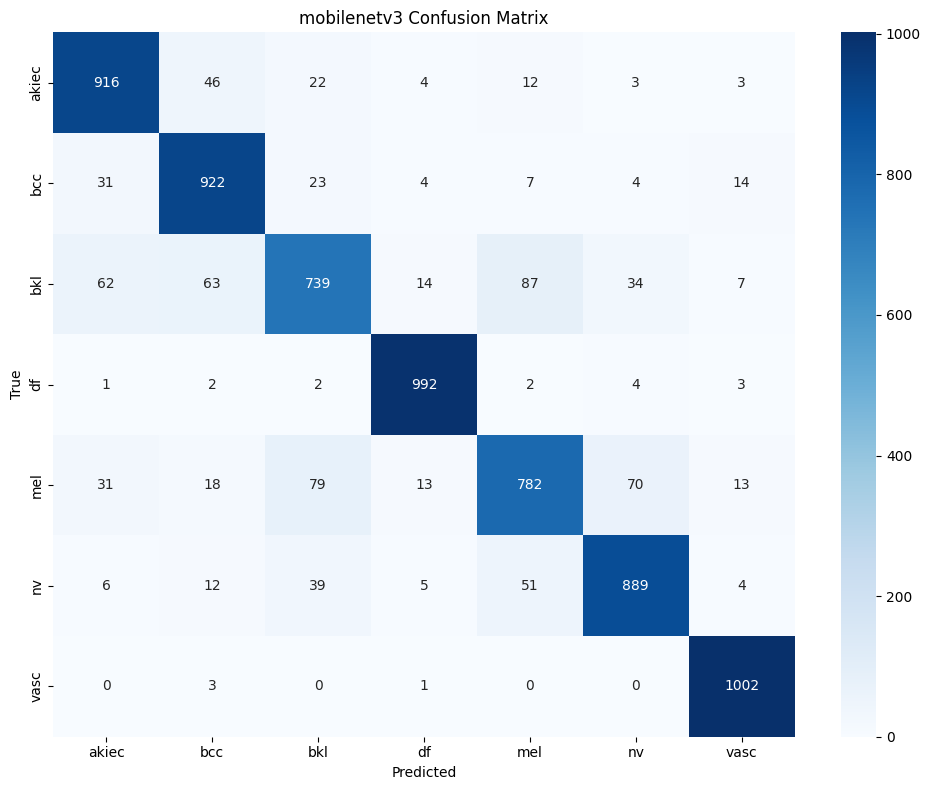

[2025-04-12 14:07:33] Using TPU for computation
[2025-04-12 14:07:33] Computing ROC curve for mobilenetv3...


Getting ROC data for mobilenetv3: 100%|██████████| 56/56 [01:39<00:00,  1.78s/it] 


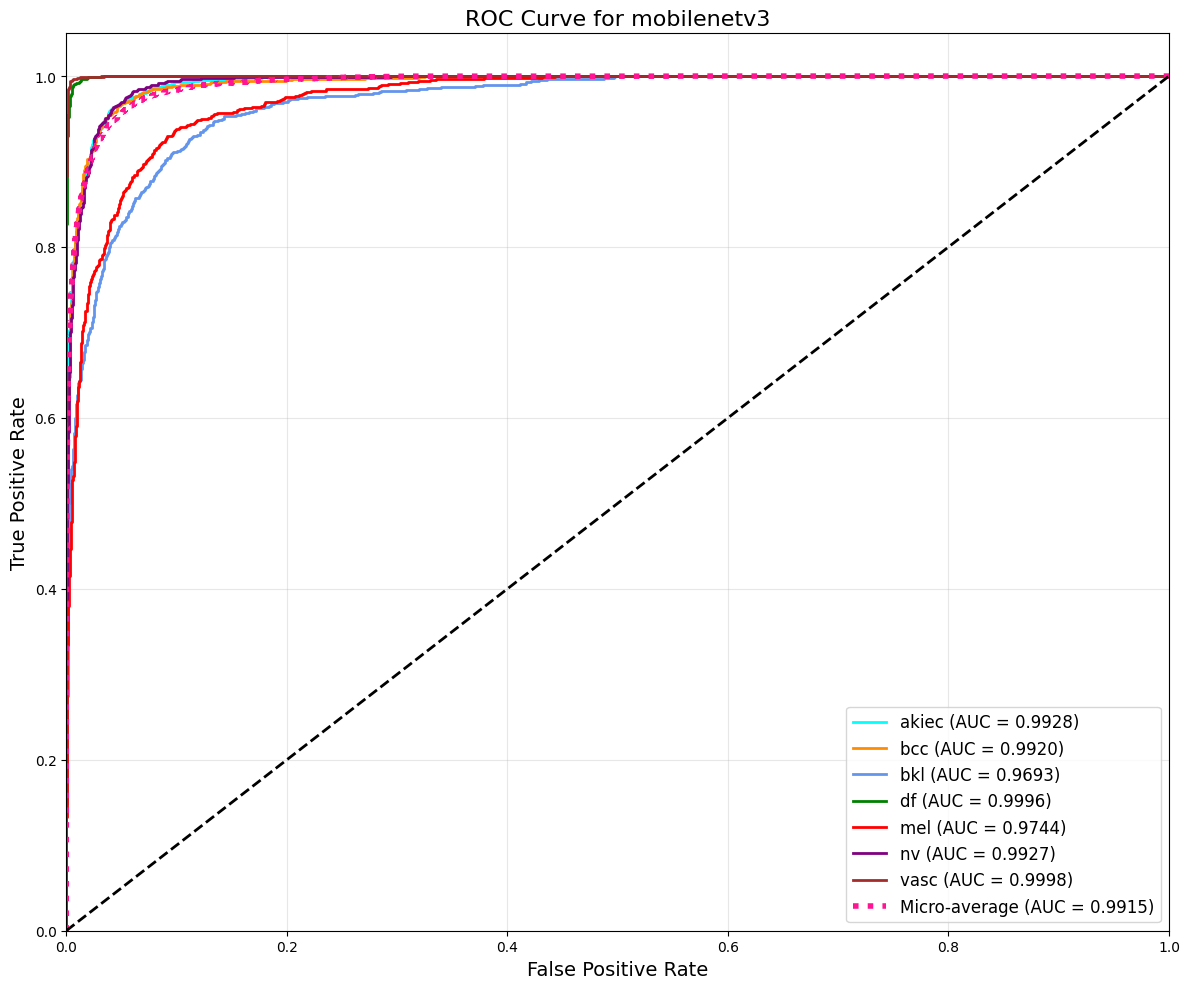

[2025-04-12 14:09:14] Using TPU for computation
[2025-04-12 14:09:14] Evaluating densenet121...


Evaluating densenet121: 100%|██████████| 56/56 [02:09<00:00,  2.32s/it]  


[2025-04-12 14:11:24] 
densenet121 Test Accuracy: 0.9588
[2025-04-12 14:11:24] 
densenet121 Classification Report:
[2025-04-12 14:11:24]               precision  recall  f1-score   support
akiec             0.966   0.978     0.972  1006.000
bcc               0.986   0.984     0.985  1005.000
bkl               0.941   0.898     0.919  1006.000
df                0.997   0.997     0.997  1006.000
mel               0.903   0.917     0.910  1006.000
nv                0.921   0.938     0.930  1006.000
vasc              0.999   1.000     1.000  1006.000
accuracy          0.959   0.959     0.959     0.959
macro avg         0.959   0.959     0.959  7041.000
weighted avg      0.959   0.959     0.959  7041.000


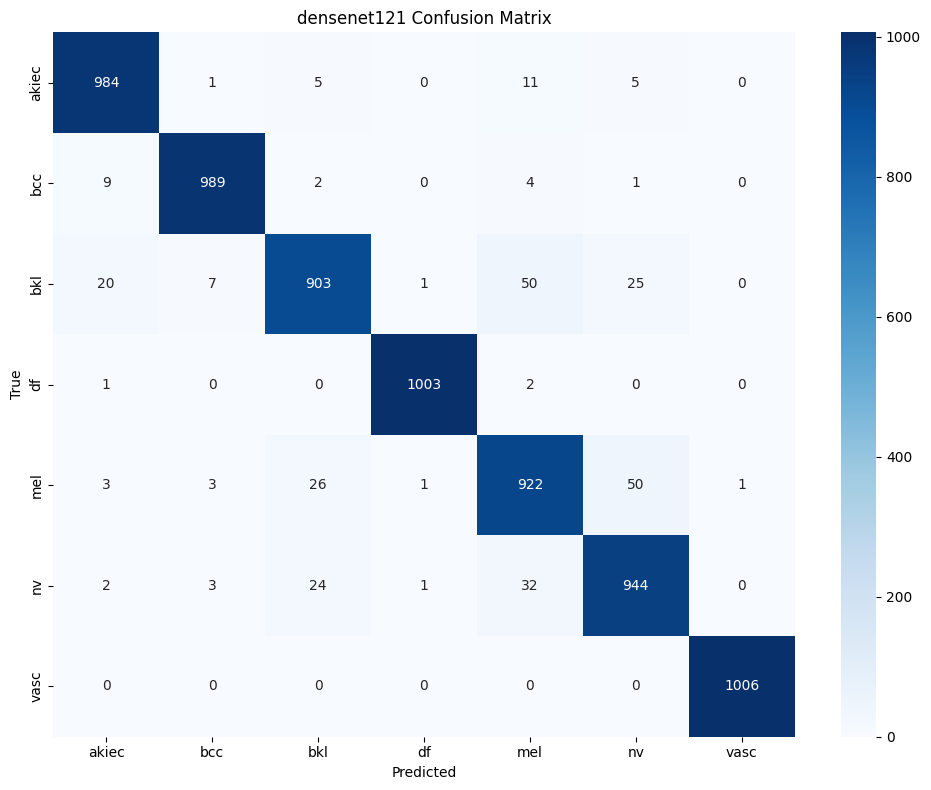

[2025-04-12 14:11:25] Using TPU for computation
[2025-04-12 14:11:25] Computing ROC curve for densenet121...


Getting ROC data for densenet121: 100%|██████████| 56/56 [01:46<00:00,  1.90s/it] 


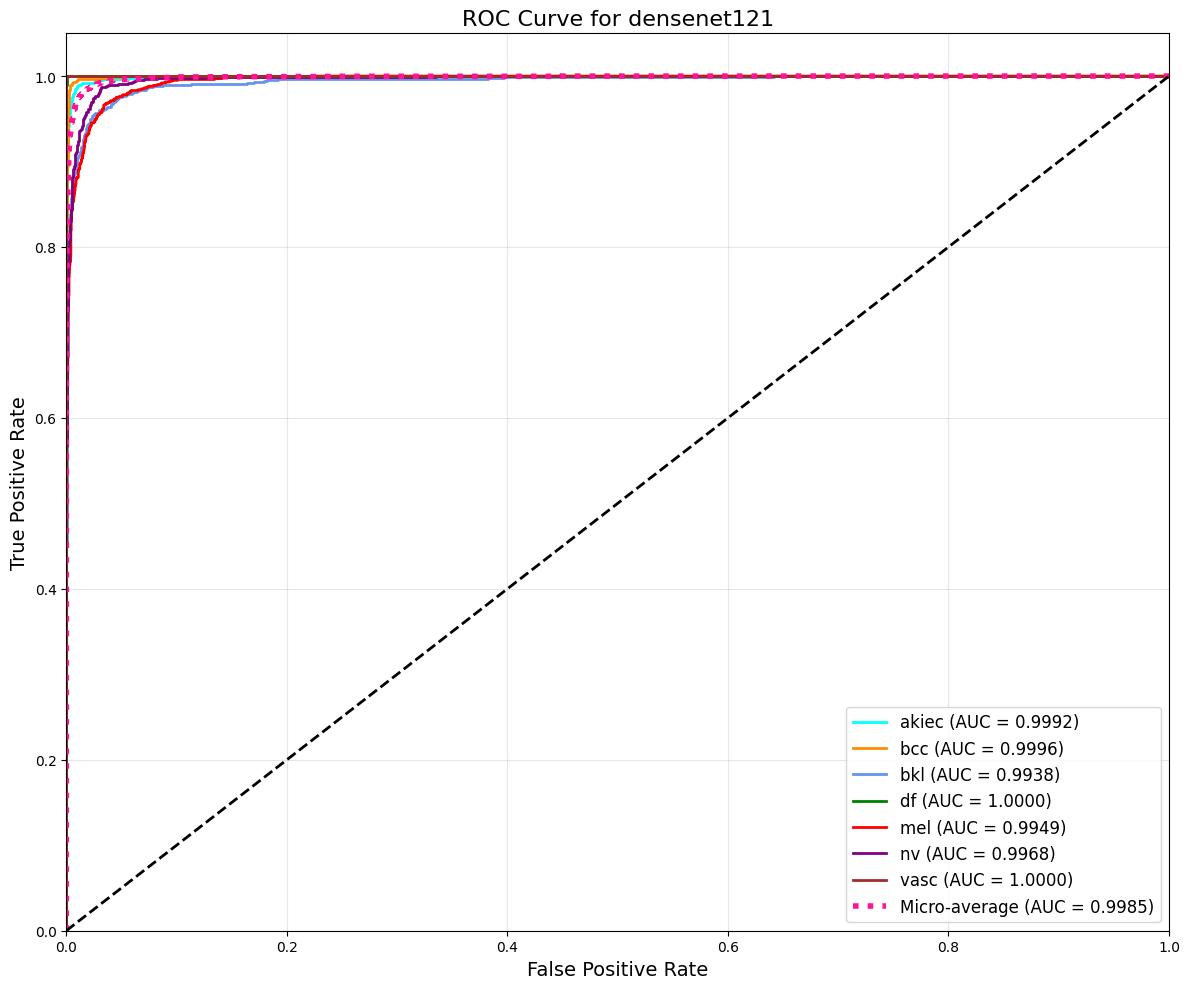

[2025-04-12 14:13:12] Using TPU for computation
[2025-04-12 14:13:12] Evaluating resnet50...


Evaluating resnet50: 100%|██████████| 56/56 [01:58<00:00,  2.12s/it]  


[2025-04-12 14:15:11] 
resnet50 Test Accuracy: 0.9496
[2025-04-12 14:15:11] 
resnet50 Classification Report:
[2025-04-12 14:15:11]               precision  recall  f1-score  support
akiec             0.932   0.991     0.961  1006.00
bcc               0.989   0.948     0.968  1005.00
bkl               0.941   0.873     0.906  1006.00
df                0.987   1.000     0.994  1006.00
mel               0.902   0.892     0.897  1006.00
nv                0.904   0.943     0.923  1006.00
vasc              0.995   1.000     0.998  1006.00
accuracy          0.950   0.950     0.950     0.95
macro avg         0.950   0.950     0.949  7041.00
weighted avg      0.950   0.950     0.949  7041.00


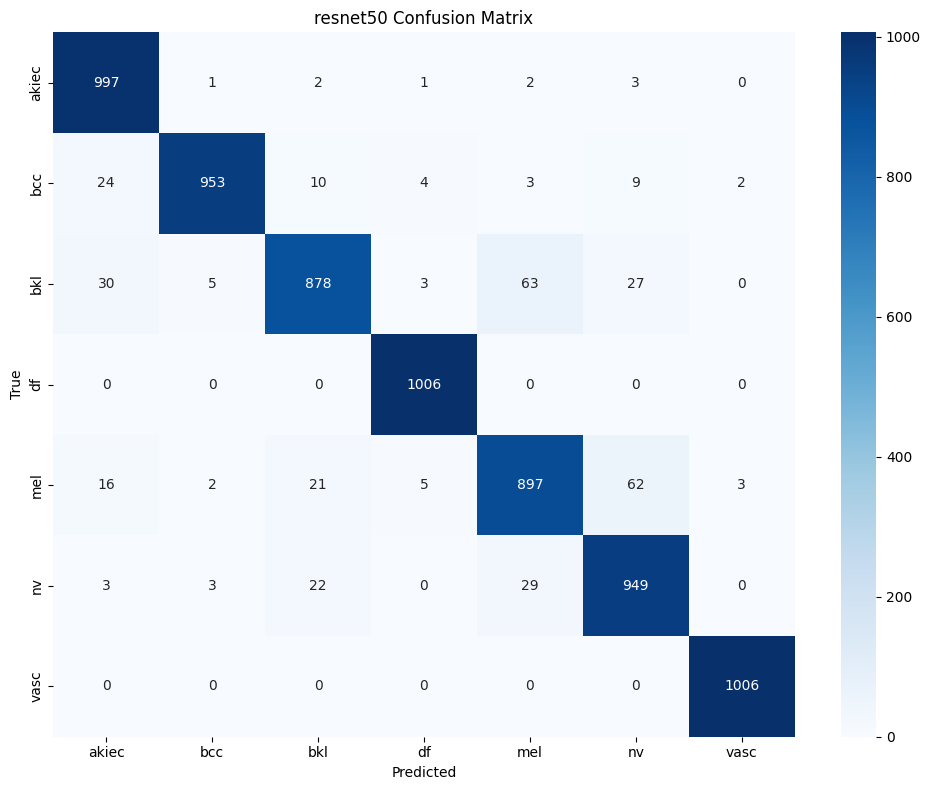

[2025-04-12 14:15:12] Using TPU for computation
[2025-04-12 14:15:12] Computing ROC curve for resnet50...


Getting ROC data for resnet50: 100%|██████████| 56/56 [01:45<00:00,  1.88s/it] 


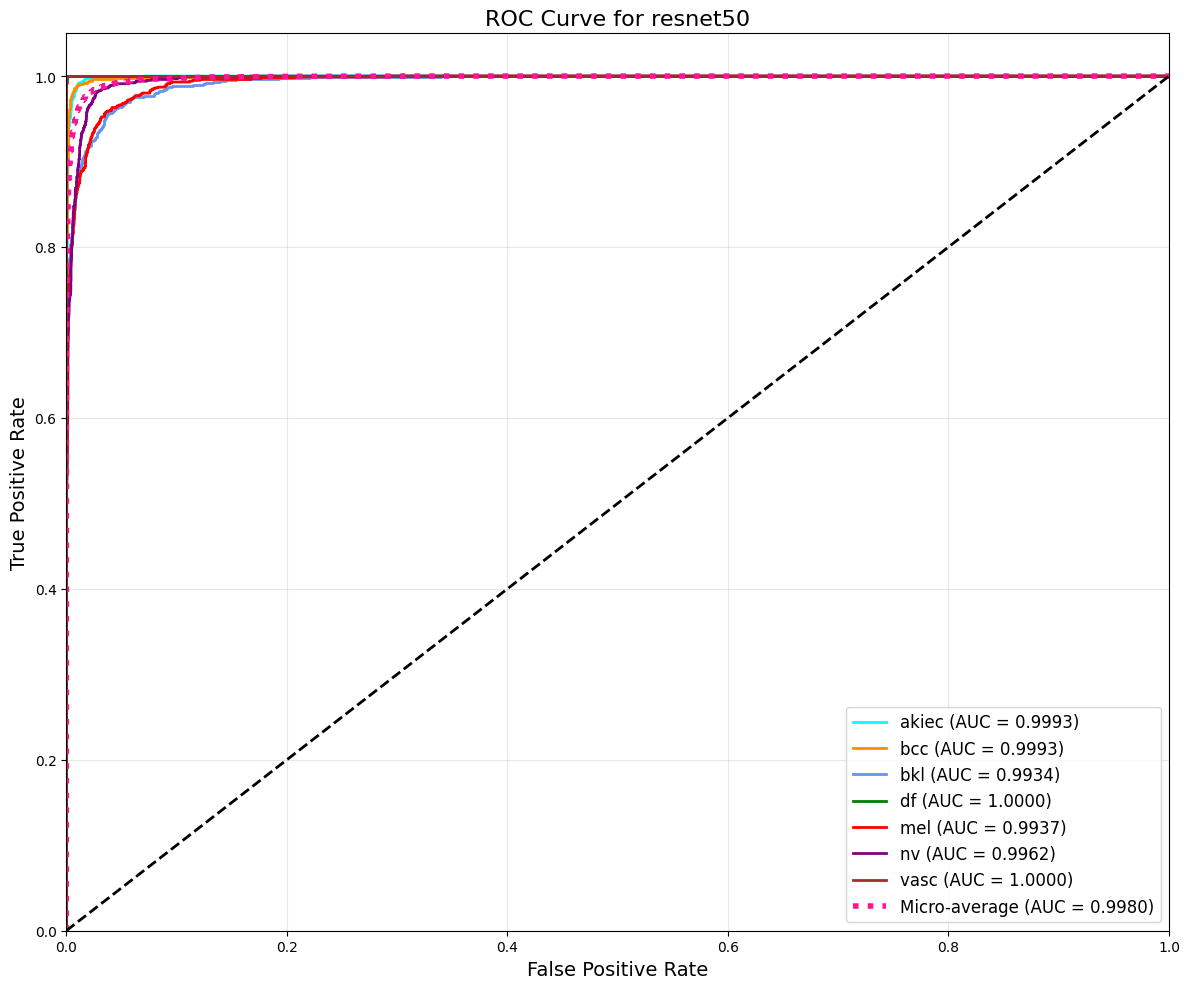

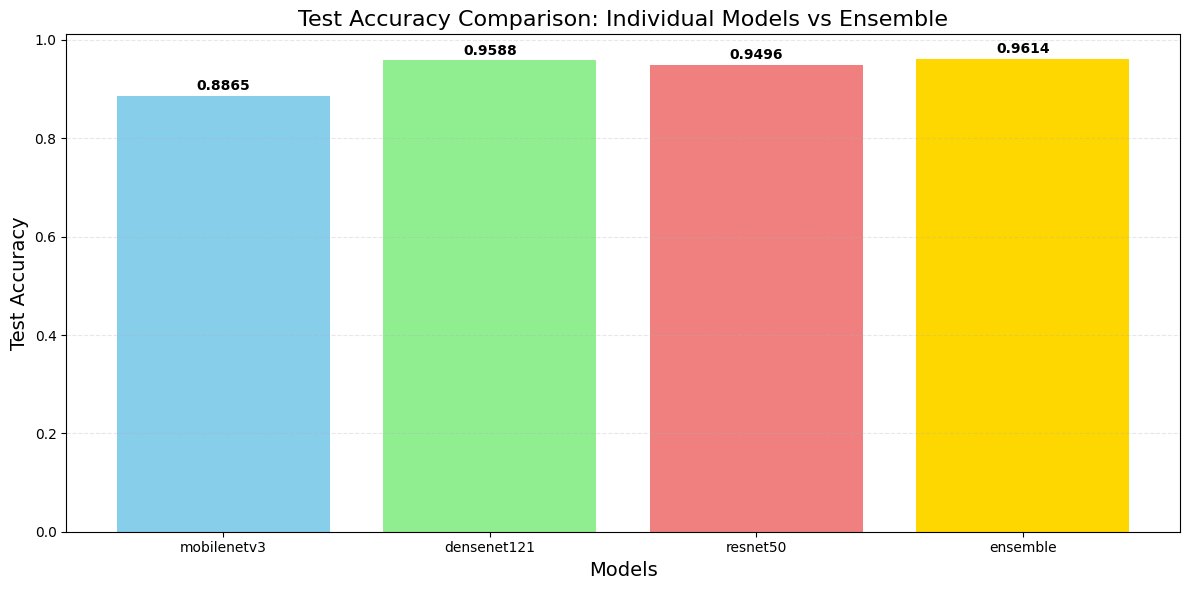

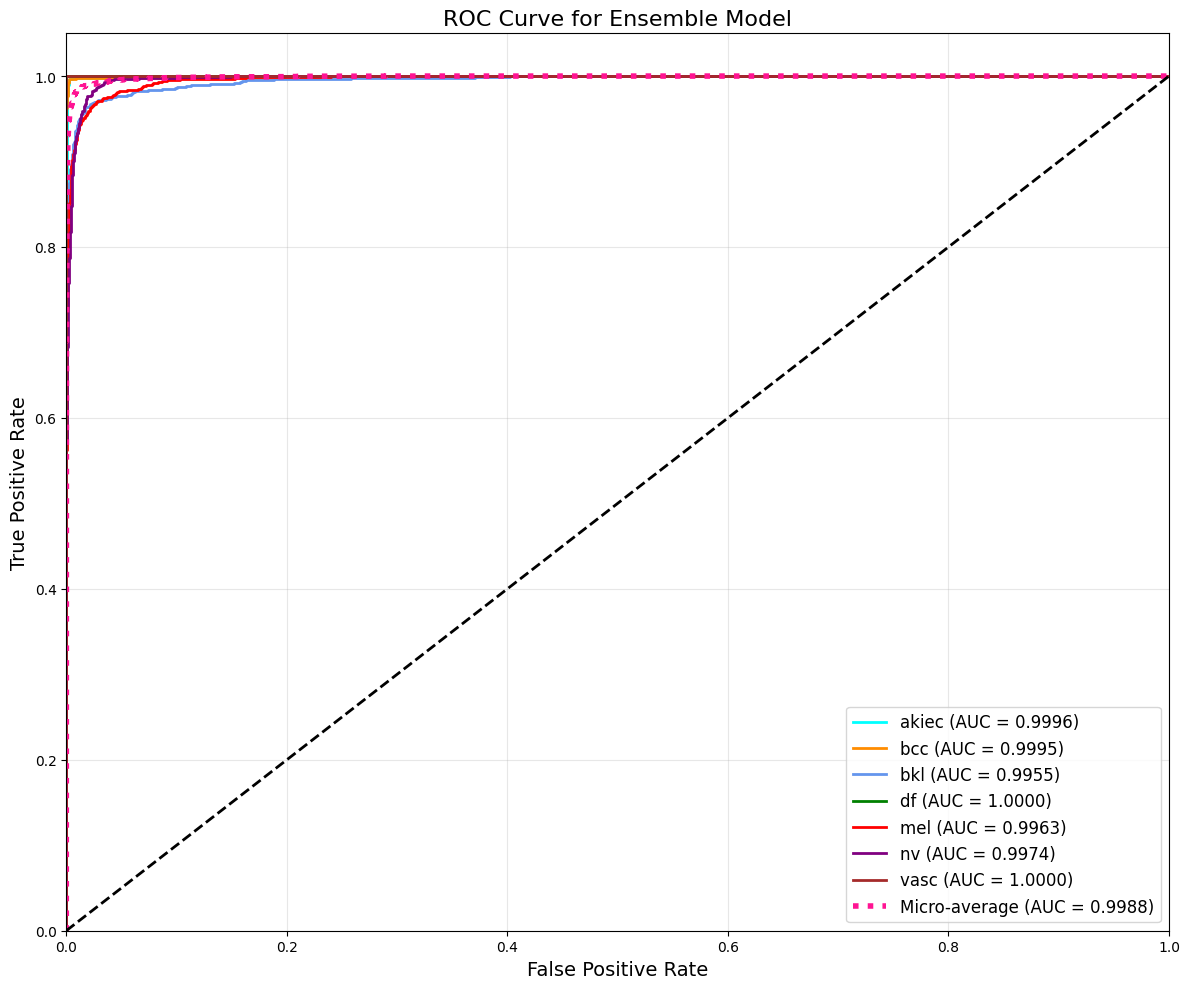

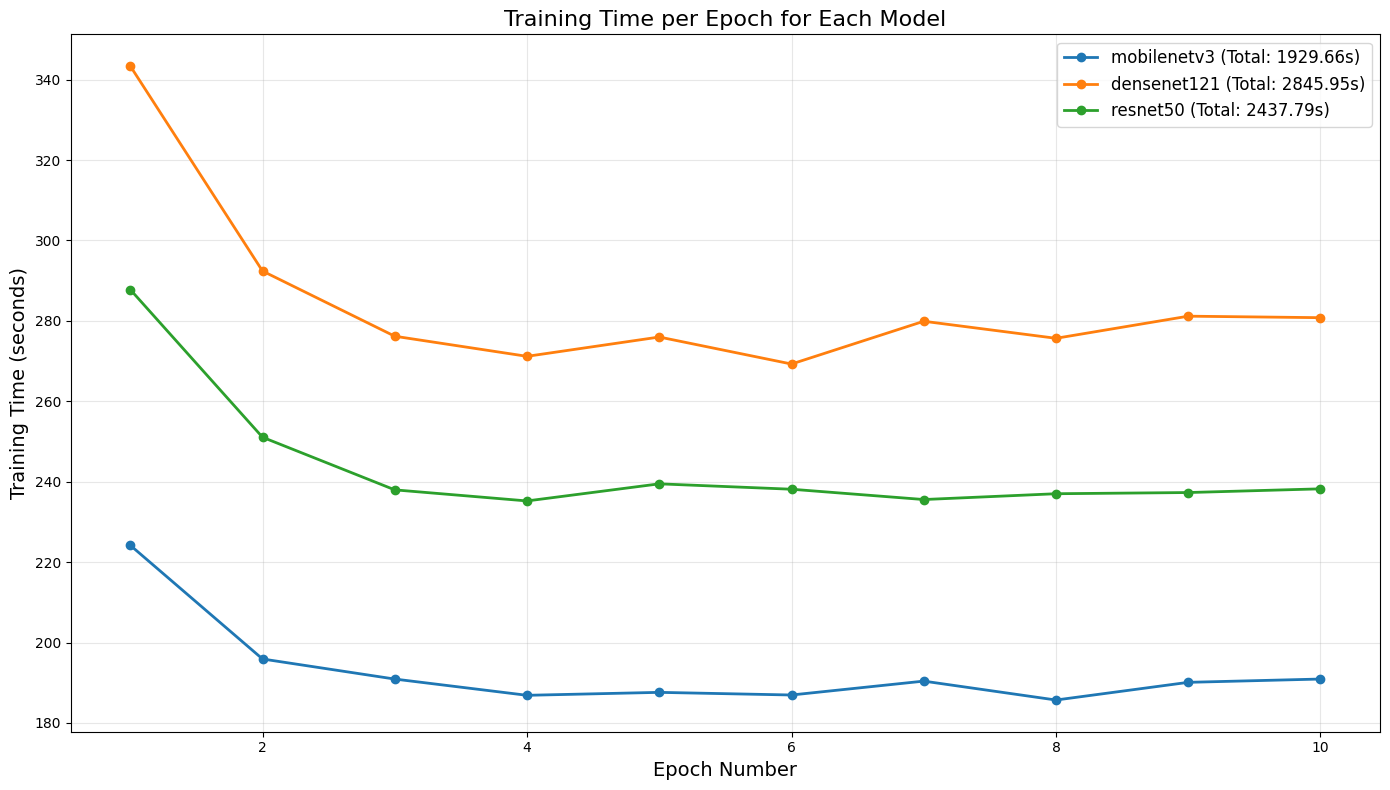

[2025-04-12 14:17:01] 
----- Creating visualization for before and after augmentation -----


<Figure size 1400x800 with 0 Axes>

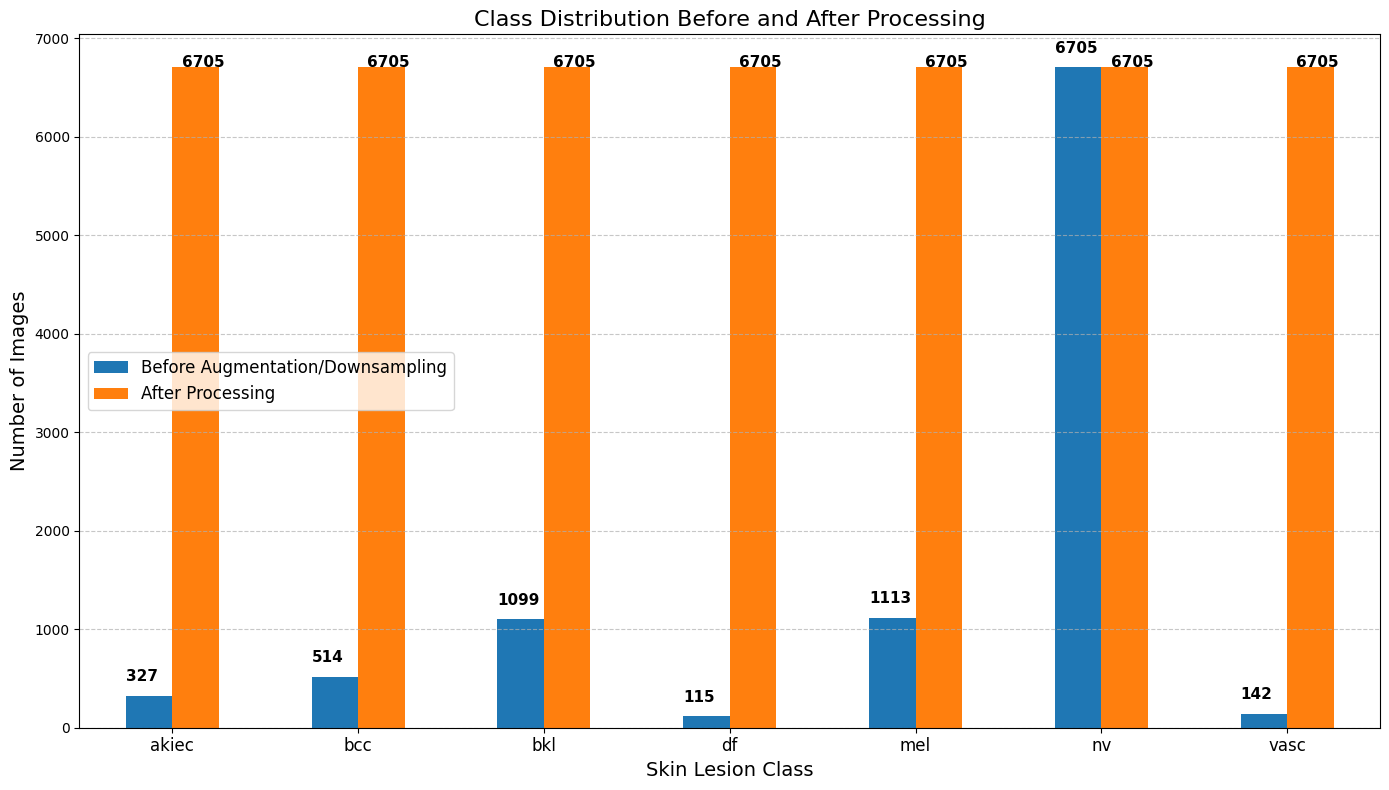

[2025-04-12 14:17:02] 
=== Skin Cancer Classification Training Completed Successfully ===


In [1]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import time
import random
import copy
from collections import Counter
import ssl
import gc
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
import datetime

# Fix for SSL certificate issue
ssl._create_default_https_context = ssl._create_unverified_context

# Function to log messages 
def log_message(message, log_file="/kaggle/working/progress_log.txt"):
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    formatted_message = f"[{timestamp}] {message}"
    
    # Print to console
    print(formatted_message)
    
    # Write to log file
    with open(log_file, "a") as f:
        f.write(formatted_message + "\n")

# Determine optimal thread count based on system
cpu_count = multiprocessing.cpu_count()
optimal_threads = max(1, cpu_count - 1)

# Set environment variables for optimized performance
os.environ['OMP_NUM_THREADS'] = str(optimal_threads)
os.environ['MKL_NUM_THREADS'] = str(optimal_threads)
os.environ['NUMEXPR_NUM_THREADS'] = str(optimal_threads)
os.environ['VECLIB_MAXIMUM_THREADS'] = str(optimal_threads)
os.environ['OPENBLAS_NUM_THREADS'] = str(optimal_threads)

# Set up device (TPU/GPU/CPU)
def setup_device():
    try:
        import torch_xla
        import torch_xla.core.xla_model as xm
        device = xm.xla_device()
        log_message("Using TPU for computation")
        return device, "tpu"
    except ImportError:
        if torch.cuda.is_available():
            device = torch.device("cuda")
            log_message(f"Using GPU: {torch.cuda.get_device_name(0)}")
            return device, "cuda"
        else:
            device = torch.device("cpu")
            log_message("Using CPU for computation")
            return device, "cpu"

# Memory management
def release_memory(verbose=False):
    """Release unused memory in PyTorch and trigger garbage collection"""
    before = 0
    if torch.cuda.is_available() and verbose:
        before = torch.cuda.memory_allocated()
        
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        
    collected = gc.collect(generation=2)  
    
    if torch.cuda.is_available() and verbose:
        after = torch.cuda.memory_allocated()
        log_message(f"Memory freed: {(before-after)/1024**2:.2f} MB, Objects collected: {collected}")

# Define target counts for each class
target_counts = {
    'akiec': 6705,
    'bcc': 6705,
    'bkl': 6705,
    'df': 6705,
    'mel': 6705,
    'nv': 6705,
    'vasc': 6705,
}

# Define paths for saving models
model_paths = {
    'mobilenetv3': "/kaggle/working/best_mobilenetv3_ham10000.pth",
    'densenet121': "/kaggle/working/best_densenet121_ham10000.pth",
    'resnet50': "/kaggle/working/best_resnet50_ham10000.pth"
}

def augment_and_prepare_dataset(dataset_path):
    log_message("\nLoading and augmenting dataset...")
    
    # Initialize progress updater for 10-minute intervals
    last_update_time = time.time()
    
    # Load metadata
    metadata_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
    metadata = pd.read_csv(metadata_file)
    
    # Calculate initial class distribution 
    initial_class_counts = metadata['dx'].value_counts()
    log_message("\nInitial class distribution:")
    for cls, count in initial_class_counts.items():
        log_message(f"{cls}: {count}")
    
    # Get image paths
    image_folders = ["HAM10000_images_part_1", "HAM10000_images_part_2"]
    image_path_dict = {}
    
    def process_folder(folder):
        local_dict = {}
        folder_path = os.path.join(dataset_path, folder)
        if os.path.exists(folder_path):
            for img_name in os.listdir(folder_path):
                if img_name.endswith('.jpg'):
                    image_id = os.path.splitext(img_name)[0]
                    local_dict[image_id] = os.path.join(folder_path, img_name)
        return local_dict
    
    # Process folders in parallel 
    if len(image_folders) > 1:
        with ThreadPoolExecutor(max_workers=len(image_folders)) as executor:
            results = list(executor.map(process_folder, image_folders))
            
        for result in results:
            image_path_dict.update(result)
    else:
        image_path_dict = process_folder(image_folders[0])
    
    # Add image paths to metadata
    metadata['image_path'] = metadata['image_id'].map(image_path_dict)
    
    # Create a plot to visualize initial class distribution
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=initial_class_counts.index, y=initial_class_counts.values)
    plt.title('Initial Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(initial_class_counts.values):
        ax.text(i, count + 50, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/initial_class_distribution.png", dpi=300)
    plt.show()
    
    # Log progress after 10 minutes
    current_time = time.time()
    if current_time - last_update_time > 600:  # 600 seconds = 10 minutes
        log_message("Progress: Processing dataset and downsampling if needed")
        last_update_time = current_time
    
   
    processed_metadata_list = []
    
    # For each class, downsample if needed (trying)
    for class_name in metadata['dx'].unique():
        class_samples = metadata[metadata['dx'] == class_name]
        target_count = target_counts[class_name]
        
        if len(class_samples) > target_count:
            log_message(f"Downsampling '{class_name}' class from {len(class_samples)} to {target_count} samples")
            class_samples = class_samples.sample(target_count, random_state=42)
        
        processed_metadata_list.append(class_samples)
    
    # Combine all processed classes
    processed_metadata = pd.concat(processed_metadata_list, ignore_index=True)
    
    # Calculate new class distribution after downsampling
    processed_class_counts = processed_metadata['dx'].value_counts()
    log_message("\nClass distribution after downsampling:")
    for cls, count in processed_class_counts.items():
        log_message(f"{cls}: {count}")
    
    # Define augmentation transforms
    augmentation_transforms = [
        transforms.RandomRotation(15),  # 15 degree rotation
        transforms.RandomHorizontalFlip(p=0.5),  # Horizontal flip
        transforms.RandomVerticalFlip(p=0.5),  # Vertical flip
        transforms.RandomAffine(
            degrees=0,  # No additional rotation
            translate=(0.1, 0.1),  # Width and height shift of 10%
            scale=(0.8, 1.2),  # Zoom effect with scale range of 0.2 (20%)
        ),
    ]
    
    # Use the same augmentations but at different probabilities for diversity
    strong_augmentation_transforms = [
        transforms.RandomRotation(15),  # 15 degree rotation
        transforms.RandomHorizontalFlip(p=0.8),  # Horizontal flip 
        transforms.RandomVerticalFlip(p=0.8),  # Vertical flip 
        transforms.RandomAffine(
            degrees=0,  # No additional rotation
            translate=(0.1, 0.1),  # Width and height shift of 10%
            scale=(0.8, 1.2),  # Zoom effect with scale range of 0.2 (20%)
        ),
    ]
    
    # STEP 1: Create all images (original + augmented) 
    log_message("\nSTEP 1: Processing original images and generating augmentations")
    all_images = []  
    
    # Add all original images
    for idx, row in tqdm(processed_metadata.iterrows(), total=len(processed_metadata), desc="Processing original images"):
        try:
            img_path = row['image_path']
            label = row['dx']
            image_id = row['image_id']
            
            if pd.isna(img_path):
                continue
                
            # Load original image and add to the list
            img = Image.open(img_path).convert('RGB')
            all_images.append((img, label, f"{image_id}_orig"))
            
        except Exception as e:
            log_message(f"Error processing image {row['image_id']}: {e}")
    
    # Log progress after 10 minutes
    current_time = time.time()
    if current_time - last_update_time > 600:
        log_message("Progress: Original images processed, beginning augmentation")
        last_update_time = current_time
    
    # Create augmented data
    log_message("\nGenerating augmented images...")
    
    for class_name, target_count in target_counts.items():
        # Get original samples for this class
        class_samples = processed_metadata[processed_metadata['dx'] == class_name]
        current_count = len(class_samples)
        
        if current_count >= target_count:
            log_message(f"Class '{class_name}' already has {current_count} samples, no augmentation needed")
            continue
            
        # Calculate how many augmented samples 
        num_augmented_needed = target_count - current_count
        
        log_message(f"Augmenting '{class_name}' class: adding {num_augmented_needed} samples to reach {target_count}")
        
        # Pre-load images to improve performance
        preloaded_images = {}
        for _, row in tqdm(class_samples.iterrows(), desc=f"Preloading images for {class_name}", total=len(class_samples)):
            try:
                img_path = row['image_path']
                if pd.isna(img_path):
                    continue
                preloaded_images[row['image_id']] = Image.open(img_path).convert('RGB')
            except Exception as e:
                log_message(f"Error preloading image {row['image_id']}: {e}")
        
        # Generate augmented samples
        counter = 0
        augmentation_count = 0
        indices = list(range(len(class_samples)))
        
        while counter < num_augmented_needed:
            # Cycle through the indices
            idx = indices[augmentation_count % len(indices)]
            sample = class_samples.iloc[idx]
            image_id = sample['image_id']
            
            try:
                # Get the preloaded image
                if image_id not in preloaded_images:
                    augmentation_count += 1
                    continue
                    
                img = preloaded_images[image_id]
                
                # Decide which augmentation strategy to use
                if counter % 5 == 0:  # Every 5th augmentation, use strong mix
                    # Apply the strong augmentations
                    aug_img = img
                    for transform in strong_augmentation_transforms:
                        aug_img = transform(aug_img)
                
                else:
                    # Apply the standard augmentations
                    aug_img = img
                    for transform in augmentation_transforms:
                        aug_img = transform(aug_img)
                
                # Add augmented image to the list
                all_images.append((aug_img, class_name, f"{sample['image_id']}_aug_{counter}"))
                counter += 1
                
                if counter % 3000 == 0:
                    log_message(f"Generated {counter}/{num_augmented_needed} augmented samples for class {class_name}")
                    release_memory()
                    
                # Log progress every 10 minutes
                current_time = time.time()
                if current_time - last_update_time > 600:
                    log_message(f"Progress: Augmenting class {class_name} - {counter}/{num_augmented_needed} samples created")
                    last_update_time = current_time
                    
            except Exception as e:
                log_message(f"Error generating augmented image: {e}")
            
            augmentation_count += 1
    
    # Clean up preloaded images to free memory
    preloaded_images = None
    release_memory()
    
    # STEP 2: Create different transforms for each model architecture
    log_message(f"\nSTEP 2: Creating transforms for different model architectures")
    
    # Define model-specific transforms
    transforms_dict = {
        'mobilenetv3': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]),
        'densenet121': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]),
        'resnet50': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    }
    
    # Process all images 
    all_processed_data = []
    
    default_transform = transforms_dict['mobilenetv3']
    
    log_message(f"Applying resize and normalize for dataset splitting...")
    for img, label, image_id in tqdm(all_images, desc="Processing images"):
        img_tensor = default_transform(img)
        all_processed_data.append((img_tensor, label, image_id, img))  
        
        # Log progress every 10 minutes
        current_time = time.time()
        if current_time - last_update_time > 600:
            log_message(f"Progress: Processing and normalizing images - {len(all_processed_data)}/{len(all_images)} completed")
            last_update_time = current_time
    
    # Calculate class distribution in final dataset
    label_counts = {}
    for _, label, _, _ in all_processed_data:
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1
    
    # Visualize final class distribution with a bar chart
    plt.figure(figsize=(12, 6))
    classes = sorted(label_counts.keys())
    counts = [label_counts[cls] for cls in classes]
    
    ax = sns.barplot(x=classes, y=counts)
    plt.title('Final Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(counts):
        ax.text(i, count + 5, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/final_class_distribution.png", dpi=300)
    plt.show()
    
    # STEP 3: Split the dataset
    log_message("\nSTEP 3: Splitting dataset into train, validation, and test sets")
    
    # Create class to index mapping
    classes = sorted(list(set([label for _, label, _, _ in all_processed_data])))
    class_to_idx = {cls: i for i, cls in enumerate(classes)}
    
    # Convert string labels to indices
    all_dataset = [(img_tensor, class_to_idx[label], image_id, pil_img) for img_tensor, label, image_id, pil_img in all_processed_data]
    
   
    total_size = len(all_dataset)
    
    
    # First calculate 70% for training
    train_size = int(0.70 * total_size)
    # Then split the remaining 30% exactly in half for validation and test
    remaining = total_size - train_size
    val_size = remaining // 2  
    test_size = remaining - val_size  
    
    # If there's an odd number remaining, add the extra one to training
    if val_size != test_size:
        train_size += 1
        val_size = test_size  
        
    log_message(f"Splitting dataset: {train_size} train, {val_size} validation, {test_size} test samples")
    assert val_size == test_size, "Validation and test sizes must be exactly equal"
    
    # Convert to tensor dataset for splitting
    x_data = torch.stack([item[0] for item in all_dataset])
    y_data = torch.tensor([class_to_idx[label] for _, label, _, _ in all_processed_data])
    image_ids = [item[2] for item in all_dataset]
    pil_images = [item[3] for item in all_dataset]
    
    # Use stratified splitting to maintain class distribution
    indices = np.arange(len(all_dataset))
    
    # First split: train (val+test)
    train_indices, temp_indices = train_test_split(
        indices, test_size=val_size+test_size, 
        stratify=y_data.numpy(), 
        random_state=42
    )
    
    # Second split: val vs test 
    val_indices, test_indices = train_test_split(
        temp_indices, 
        test_size=0.5,  
        stratify=y_data[temp_indices].numpy(),
        random_state=42
    )
    
    log_message(f"Validation set size: {len(val_indices)}, Test set size: {len(test_indices)}")
    
    # Count instances of each class in each split
    train_labels = [y_data[i].item() for i in train_indices]
    val_labels = [y_data[i].item() for i in val_indices]
    test_labels = [y_data[i].item() for i in test_indices]
    
    train_counts = {}
    val_counts = {}
    test_counts = {}
    
    for label in range(len(classes)):
        train_counts[label] = train_labels.count(label)
        val_counts[label] = val_labels.count(label)
        test_counts[label] = test_labels.count(label)
    
    # Plot train split class distribution
    plt.figure(figsize=(12, 6))
    train_classes = list(train_counts.keys())
    train_count_values = list(train_counts.values())
    
    ax = sns.barplot(x=[classes[i] for i in train_classes], y=train_count_values)
    plt.title('Train Split Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(train_count_values):
        ax.text(i, count + 5, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/train_split_distribution.png", dpi=300)
    plt.show()
    
    # Plot validation split class distribution
    plt.figure(figsize=(12, 6))
    val_classes = list(val_counts.keys())
    val_count_values = list(val_counts.values())
    
    ax = sns.barplot(x=[classes[i] for i in val_classes], y=val_count_values)
    plt.title('Validation Split Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(val_count_values):
        ax.text(i, count + 2, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/val_split_distribution.png", dpi=300)
    plt.show()
    
    # Plot test split class distribution
    plt.figure(figsize=(12, 6))
    test_classes = list(test_counts.keys())
    test_count_values = list(test_counts.values())
    
    ax = sns.barplot(x=[classes[i] for i in test_classes], y=test_count_values)
    plt.title('Test Split Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(test_count_values):
        ax.text(i, count + 2, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/test_split_distribution.png", dpi=300)
    plt.show()
    
    # Create special datasets for each model architecture
    class MultiModelSkinLesionDataset:
        def __init__(self, data_indices, x_data, y_data, pil_images, transform):
            self.data_indices = data_indices
            self.y_data = y_data
            self.pil_images = pil_images
            self.transform = transform
            
        def __len__(self):
            return len(self.data_indices)
            
        def __getitem__(self, idx):
            index = self.data_indices[idx]
            pil_img = self.pil_images[index]
            # Apply the model-specific transform
            img_tensor = self.transform(pil_img)
            return img_tensor, self.y_data[index]
    
    # Create dataset dictionaries for each model architecture
    train_datasets = {}
    val_datasets = {}
    test_datasets = {}
    
    for model_name, transform in transforms_dict.items():
        train_datasets[model_name] = MultiModelSkinLesionDataset(train_indices, x_data, y_data, pil_images, transform)
        val_datasets[model_name] = MultiModelSkinLesionDataset(val_indices, x_data, y_data, pil_images, transform)
        test_datasets[model_name] = MultiModelSkinLesionDataset(test_indices, x_data, y_data, pil_images, transform)
    
    # Optimize batch_size based on system resources
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1e9
        
        if gpu_memory > 16:  
            batch_size = 128
        elif gpu_memory > 8:  
            batch_size = 64
        else:  
            batch_size = 32
    else:
        # Default batch size 
        batch_size = 128
    
    # Dynamically determine optimal num_workers based on CPU cores
    num_workers = min(128, os.cpu_count() or 4)
    
    log_message(f"Using batch_size={batch_size}, num_workers={num_workers}")
    
    train_loaders = {}
    val_loaders = {}
    test_loaders = {}
    
    for model_name in transforms_dict.keys():
        train_loaders[model_name] = DataLoader(
            train_datasets[model_name], 
            batch_size=batch_size, 
            shuffle=True, 
            num_workers=num_workers, 
            pin_memory=True
        )
        val_loaders[model_name] = DataLoader(
            val_datasets[model_name], 
            batch_size=batch_size, 
            shuffle=False,
            num_workers=num_workers,
            pin_memory=True
        )
        test_loaders[model_name] = DataLoader(
            test_datasets[model_name], 
            batch_size=batch_size, 
            shuffle=False,
            num_workers=num_workers,
            pin_memory=True
        )
    
    # Print shapes to verify
    for model_name, loader in train_loaders.items():
        for i, (images, labels) in enumerate(loader):
            log_message(f"{model_name} - Batch {i} - Image shape: {images.shape}, Labels shape: {labels.shape}")
            break
    
    log_message("\nDataset preparation completed successfully!")
    
    return {
        'train_loaders': train_loaders,
        'val_loaders': val_loaders,
        'test_loaders': test_loaders,
        'class_to_idx': class_to_idx,
        'idx_to_class': {v: k for k, v in class_to_idx.items()},
        'dataset_size': {
            'train': len(train_indices),
            'validation': len(val_indices),
            'test': len(test_indices),
            'total': total_size
        },
        'classes': classes
    }

# Functions to build different models (UPDATED)
def build_mobilenetv3_model(num_classes):
    # Load pre-trained MobileNetV3 Large model 
    model = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.IMAGENET1K_V1)
    
    # Get correct input features
    num_features = model.classifier[0].in_features
    
    # Modify classifier for our number of classes
    model.classifier = nn.Sequential(
        nn.Linear(num_features, 256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256, num_classes)
    )
    
    return model

def build_densenet121_model(num_classes):
    # Load pre-trained DenseNet121 model (changed from 201)
    model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
    
    # Modify the final classifier for our number of classes
    num_features = model.classifier.in_features
    model.classifier = nn.Linear(num_features, num_classes)
    
    return model

def build_resnet50_model(num_classes):
    # Load pre-trained ResNet50 model (changed from 101)
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    
    # Modify the final fully connected layer for our number of classes
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)
    
    return model

# Dictionary to store epoch times for all models
all_model_epoch_times = {}
# Dictionary to store evaluation times
model_eval_times = {}
# Dictionary to store total times (training + evaluation)
model_total_times = {}

# Training function for each model
def train_model(model, train_loader, val_loader, num_classes, model_name):
    # Set device
    device, device_type = setup_device()
    log_message(f"Using device: {device} for {model_name}")
    
    # Move model to device
    model = model.to(device)
    
    # Initialize last update time for 10-minute logging
    last_update_time = time.time()
    
    # Freeze most of the parameters for transfer learning
    # Only train the last few layers
    if model_name == 'mobilenetv3':
        # Freeze all layers except the classifier
        for param in model.features.parameters():
            param.requires_grad = False
    elif model_name == 'densenet121':
        # Freeze all layers except the classifier and last dense block
        for name, param in model.named_parameters():
            if "classifier" not in name and "denseblock4" not in name:
                param.requires_grad = False
    elif model_name == 'resnet50':
        # Freeze all layers except the last block and fc layer
        for name, param in model.named_parameters():
            if "layer4" not in name and "fc" not in name:
                param.requires_grad = False
    
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    
    # Using higher learning rates for the unfrozen layers
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)
    
    # Early stopping variables
    patience = 5
    best_val_accuracy = 0.0
    early_stop_counter = 0
    
    # Track loss & accuracy
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    epoch_times = []
    
    # Record total training start time
    total_training_start = time.time()
    
    # Log message every 10 minutes during training
    log_message(f"Starting training for {model_name}, will log updates every 10 minutes")
    
    # Training loop 
    num_epochs = 10
    for epoch in range(num_epochs):
        start_time = time.time()
        
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        train_progress = tqdm(train_loader, desc=f"{model_name} - Epoch {epoch+1}/{num_epochs}")
        
        for batch_idx, (images, labels) in enumerate(train_progress):
            images, labels = images.to(device), labels.to(device)
            
            # Check if we need to log progress (every 10 minutes)
            current_time = time.time()
            if current_time - last_update_time > 600:
                log_message(f"Progress: {model_name} training - Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}")
                last_update_time = current_time
            
            # Handle TPU differently
            if device_type == "tpu":
                import torch_xla.core.xla_model as xm
                
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                xm.mark_step()  
            else:
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
        
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                
                if device_type == "tpu":
                    import torch_xla.core.xla_model as xm
                    outputs = model(images)
                else:
                    outputs = model(images)
                    
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)
        
        val_loss = val_loss / len(val_loader)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Update learning rate based on validation accuracy
        scheduler.step(val_accuracy)
        
        # Save best model 
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            
            # Handle TPU model saving
            if device_type == "tpu":
                import torch_xla.core.xla_model as xm
                xm.save(model.state_dict(), model_paths[model_name])
            else:
                torch.save(model.state_dict(), model_paths[model_name])
                
            log_message(f" Best {model_name} model saved with Val Accuracy: {val_accuracy:.4f}")
            early_stop_counter = 0
        else:
            early_stop_counter += 1
        
        end_time = time.time()
        epoch_duration = end_time - start_time
        epoch_times.append(epoch_duration)
        
        log_message(f"\n{model_name} - Epoch {epoch+1}/{num_epochs}")
        log_message(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
        log_message(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
        log_message(f"Epoch Time: {epoch_duration:.2f} seconds")
        
        # Release memory after each epoch
        release_memory()
        
        # Early stopping
        if early_stop_counter >= patience:
            log_message(f"\nEarly stopping triggered for {model_name}. Training stopped.")
            break
    
    # Calculate total training time
    total_training_time = time.time() - total_training_start
    
    # Store epoch times and total training time for this model
    all_model_epoch_times[model_name] = epoch_times
    model_total_times[model_name + "_training"] = total_training_time
    
    log_message(f"\nTraining Complete for {model_name}!")
    log_message(f"Total Training Time: {total_training_time:.2f} seconds")
    
    # Plot loss
    plt.figure(figsize=(10,5))
    plt.plot(train_losses, label='Train Loss', marker='o')
    plt.plot(val_losses, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.legend()
    plt.savefig(f"/kaggle/working/{model_name}_loss.png", dpi=300)
    plt.show()
    
    # Plot accuracy
    plt.figure(figsize=(10,5))
    plt.plot(train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(val_accuracies, label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Training vs Validation Accuracy')
    plt.legend()
    plt.savefig(f"/kaggle/working/{model_name}_accuracy.png", dpi=300)
    plt.show()
    
    # Print time for each epoch
    log_message("\nTime taken for each epoch (seconds):")
    for epoch_num, epoch_time in enumerate(epoch_times, 1):
        log_message(f"Epoch {epoch_num}: {epoch_time:.2f} seconds")
    
    return model

# Function to plot ROC curve for a model
def plot_model_roc(model, test_loader, num_classes, idx_to_class, model_name):
    device, device_type = setup_device()
    model.to(device)
    model.eval()
    
    log_message(f"Computing ROC curve for {model_name}...")
    
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc=f"Getting ROC data for {model_name}"):
            images = images.to(device)
            
            # Get probability scores
            if device_type == "tpu":
                import torch_xla.core.xla_model as xm
                outputs = model(images)
                # Move outputs to CPU for TPU
                outputs = xm.all_gather(outputs)
            else:
                outputs = model(images)
                
            probs = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
            
            all_probs.append(probs)
            all_labels.extend(labels.cpu().numpy())
    
    # Stack all batches
    all_probs = np.vstack(all_probs)
    all_labels = np.array(all_labels)
    
    # Binarize the labels for ROC curve calculation
    y_test_bin = label_binarize(all_labels, classes=range(num_classes))
    
    # Compute micro-average ROC curve and ROC area
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), all_probs.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], all_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curve
    plt.figure(figsize=(12, 10))
    
    # Plot ROC curves for each class
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown']
    label_names = [idx_to_class[i] for i in range(num_classes)]
    
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{label_names[i]} (AUC = {roc_auc[i]:.4f})')
    
    # Plot micro-average ROC curve
    plt.plot(fpr_micro, tpr_micro,
             label=f'Micro-average (AUC = {roc_auc_micro:.4f})',
             color='deeppink', linestyle=':', linewidth=4)
    
    # Add diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {model_name}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/{model_name}_roc_curve.png", dpi=300)
    plt.show()
    
    return fpr, tpr, roc_auc, fpr_micro, tpr_micro, roc_auc_micro

# Function to evaluate each individual model
def evaluate_individual_model(model, test_loader, idx_to_class, model_name, num_classes):
    device, device_type = setup_device()
    
    # Record the evaluation time
    start_time = time.time()
    
    log_message(f"Evaluating {model_name}...")
    
    # Load best model
    if device_type == "tpu":
        import torch_xla.core.xla_model as xm
        model.load_state_dict(torch.load(model_paths[model_name], map_location="cpu"))
    else:
        try:
            model.load_state_dict(torch.load(model_paths[model_name]))
        except:
            model.load_state_dict(torch.load(model_paths[model_name], map_location=device))
    
    model.to(device)
    model.eval()
    
    # Test evaluation
    correct_test = 0
    total_test = 0
    all_preds = []
    all_labels = []
    
    # Initialize last update time for 10-minute logging
    last_update_time = time.time()
    
    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(tqdm(test_loader, desc=f"Evaluating {model_name}")):
            images, labels = images.to(device), labels.to(device)
            
            # Check if we need to log progress 
            current_time = time.time()
            if current_time - last_update_time > 600:
                log_message(f"Progress: Evaluating {model_name} - Batch {batch_idx}/{len(test_loader)}")
                last_update_time = current_time
                
            if device_type == "tpu":
                import torch_xla.core.xla_model as xm
                outputs = model(images)
            else:
                outputs = model(images)
                
            _, predicted = torch.max(outputs, 1)
            
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate evaluation time
    eval_time = time.time() - start_time
    model_eval_times[model_name] = eval_time
    
    test_accuracy = correct_test / total_test
    log_message(f"\n{model_name} Test Accuracy: {test_accuracy:.4f}")
    
    # Convert indices to class names
    label_names = [idx_to_class[i] for i in range(len(idx_to_class))]
    
    # Generate classification report
    log_message(f"\n{model_name} Classification Report:")
    try:
        report = classification_report(all_labels, all_preds, target_names=label_names, output_dict=True, zero_division=0)
        report_df = pd.DataFrame(report).transpose()
        log_message(str(report_df.round(3)))
    except Exception as e:
        log_message(f"Error generating classification report: {e}")
        report = None
    
    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/{model_name}_confusion_matrix.png", dpi=300)
    plt.show()
    
    # Plot ROC curve for this model
    plot_model_roc(model, test_loader, num_classes, idx_to_class, model_name)
    
    return all_preds, all_labels, test_accuracy, report, eval_time

# Function to evaluate ensemble using majority voting
def evaluate_ensemble(models, test_loaders, idx_to_class):
    device, device_type = setup_device()
    num_classes = len(idx_to_class)
    
    # Record the ensemble evaluation start time
    ensemble_start_time = time.time()
    
    log_message("\nEvaluating ensemble model...")
    
    # Initialize last update time for 10-minute logging
    last_update_time = time.time()
    
    # Load best models for each architecture
    for model_name, model in models.items():
        # Check if we need to log progress (every 10 minutes)
        current_time = time.time()
        if current_time - last_update_time > 600:
            log_message(f"Progress: Loading best {model_name} model for ensemble")
            last_update_time = current_time
            
        if device_type == "tpu":
            import torch_xla.core.xla_model as xm
            model.load_state_dict(torch.load(model_paths[model_name], map_location="cpu"))
        else:
            try:
                model.load_state_dict(torch.load(model_paths[model_name]))
            except:
                model.load_state_dict(torch.load(model_paths[model_name], map_location=device))
        
        model.to(device)
        model.eval()
    
    # Store all model predictions
    all_model_predictions = []
    all_model_probabilities = []
    true_labels = []
    test_data_size = 0
    
    # Get predictions from each model
    log_message("\nGathering predictions from all models")
    for model_name, model in models.items():
        model_predictions = []
        model_probabilities = []
        
        # Check if we need to log progress (every 10 minutes)
        current_time = time.time()
        if current_time - last_update_time > 600:
            log_message(f"Progress: Getting predictions from {model_name}")
            last_update_time = current_time
            
        with torch.no_grad():
            for batch_idx, (images, labels) in enumerate(tqdm(test_loaders[model_name], desc=f"Getting {model_name} predictions")):
                if model_name == 'mobilenetv3' and len(true_labels) < len(test_loaders[model_name].dataset):
                    true_labels.extend(labels.cpu().numpy())
                
                # Check if we need to log progress (every 10 minutes)
                current_time = time.time()
                if current_time - last_update_time > 600:
                    log_message(f"Progress: {model_name} prediction - Batch {batch_idx}/{len(test_loaders[model_name])}")
                    last_update_time = current_time
                    
                images = images.to(device)
                
                if device_type == "tpu":
                    import torch_xla.core.xla_model as xm
                    outputs = model(images)
                   
                    outputs = xm.all_gather(outputs)
                else:
                    outputs = model(images)
                    
                probs = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
                _, predicted = torch.max(outputs, 1)
                
                model_predictions.extend(predicted.cpu().numpy())
                model_probabilities.append(probs)
        
        # Stack all batches of probabilities
        model_probabilities = np.vstack(model_probabilities)
        all_model_probabilities.append(model_probabilities)
        all_model_predictions.append(model_predictions)
        test_data_size = len(model_predictions)
    
    # Perform majority voting for each test sample
    ensemble_predictions = []
    for i in range(test_data_size):
        votes = [all_model_predictions[j][i] for j in range(len(models))]
        majority_vote = Counter(votes).most_common(1)[0][0]
        ensemble_predictions.append(majority_vote)
    
    # Calculate total ensemble evaluation time
    ensemble_total_time = time.time() - ensemble_start_time
    model_eval_times['ensemble'] = ensemble_total_time
    
    # Calculate ensemble accuracy
    correct = sum(1 for a, b in zip(ensemble_predictions, true_labels) if a == b)
    ensemble_accuracy = correct / test_data_size
    
    log_message("\n----- Majority Voting Ensemble Results -----")
    log_message(f"Ensemble Test Accuracy: {ensemble_accuracy:.4f}")
    log_message(f"Ensemble Evaluation Time: {ensemble_total_time:.2f} seconds")
    
    # Convert indices to class names
    label_names = [idx_to_class[i] for i in range(len(idx_to_class))]
    
    # Generate classification report for ensemble
    log_message("\nClassification Report of Majority Voting Ensemble (MobileNetV3, DenseNet121, ResNet50):")
    try:
        ensemble_report = classification_report(true_labels, ensemble_predictions, target_names=label_names, output_dict=True, zero_division=0)
        ensemble_report_df = pd.DataFrame(ensemble_report).transpose()
        log_message(str(ensemble_report_df.round(3)))
    except Exception as e:
        log_message(f"Error generating ensemble classification report: {e}")
        ensemble_report = {}
    
    # Generate confusion matrix for ensemble
    ensemble_cm = confusion_matrix(true_labels, ensemble_predictions)
    
    # Plot confusion matrix for ensemble
    plt.figure(figsize=(12, 10))
    sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of Majority Voting Ensemble\nMobileNetV3, DenseNet121, ResNet50')
    plt.tight_layout()
    plt.savefig("/kaggle/working/ensemble_confusion_matrix.png", dpi=300)
    plt.show()
    
    # Compare individual models with ensemble
    model_accuracies = {}
    
    # Store individual model performances
    for model_name, model in models.items():
        _, _, accuracy, report, eval_time = evaluate_individual_model(
            model, 
            test_loaders[model_name],
            idx_to_class,
            model_name,
            num_classes
        )
        model_accuracies[model_name] = accuracy
    
    # Add ensemble performance
    model_accuracies['ensemble'] = ensemble_accuracy
    
    # Plot comparison of accuracies
    plt.figure(figsize=(12, 6))
    accuracy_bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), 
                        color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Test Accuracy', fontsize=14)
    plt.title('Test Accuracy Comparison: Individual Models vs Ensemble', fontsize=16)

    # Add values on top of bars
    for bar in accuracy_bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.ylim(0, max(model_accuracies.values()) + 0.05)  
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig('/kaggle/working/model_accuracy_comparison.png', dpi=300)
    plt.show()
    
    # Calculate ensemble probabilities 
    ensemble_probs = np.zeros_like(all_model_probabilities[0])
    for model_prob in all_model_probabilities:
        ensemble_probs += model_prob
    ensemble_probs /= len(all_model_probabilities)
    
    # Plot ROC curve for ensemble
    
    y_test_bin = label_binarize(true_labels, classes=range(num_classes))
    
    # Compute micro-average ROC curve and ROC area
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), ensemble_probs.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], ensemble_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curve for ensemble
    plt.figure(figsize=(12, 10))
    
    # Plot ROC curves for each class
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown']
    
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{label_names[i]} (AUC = {roc_auc[i]:.4f})')
    
    # Plot micro-average ROC curve
    plt.plot(fpr_micro, tpr_micro,
             label=f'Micro-average (AUC = {roc_auc_micro:.4f})',
             color='deeppink', linestyle=':', linewidth=4)
    
    # Add diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve for Ensemble Model', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('/kaggle/working/ensemble_roc_curve.png', dpi=300)
    plt.show()
    
    # Create a line graph for epoch training times across all models
    plt.figure(figsize=(14, 8))
    
    # For each model, plot its epoch times
    for model_name, epoch_times in all_model_epoch_times.items():
       
        epochs = list(range(1, len(epoch_times) + 1))
        plt.plot(epochs, epoch_times, marker='o', linewidth=2, label=f"{model_name} (Total: {sum(epoch_times):.2f}s)")
    
    plt.xlabel('Epoch Number', fontsize=14)
    plt.ylabel('Training Time (seconds)', fontsize=14)
    plt.title('Training Time per Epoch for Each Model', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig("/kaggle/working/model_training_times.png", dpi=300)
    plt.show()
    
    return ensemble_predictions, true_labels, ensemble_accuracy, ensemble_report

# Main function
def main():
    # Set device 
    device, device_type = setup_device()
    log_message(f"Using device: {device}")
    
    # Apply optimizations to PyTorch for faster processing
    if device_type == 'cuda':
        # Empty cache before starting
        torch.cuda.empty_cache()
        
        # Optimize CUDA operations
        torch.backends.cudnn.benchmark = True
        # Use TensorFloat32 tensor cores in Ampere GPUs (if available)
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
    elif device_type == 'tpu':
        log_message("Using TPU-specific settings")
    
    # Specify dataset path
    dataset_path = "/kaggle/input/skin-cancer-mnist-ham10000/"
    
    # Run augmentation and preparation
    result = augment_and_prepare_dataset(dataset_path)
    
    # Display dataset information
    log_message("\nDataset Information:")
    log_message(f"Classes: {result['classes']}")
    log_message(f"Dataset sizes: {result['dataset_size']}")
    
    # Number of classes
    num_classes = len(result['class_to_idx'])
    
    # Build models
    models = {
        'mobilenetv3': build_mobilenetv3_model(num_classes),
        'densenet121': build_densenet121_model(num_classes),
        'resnet50': build_resnet50_model(num_classes)
    }
    
    # Train each model
    for model_name, model in models.items():
        log_message(f"\n----- Training {model_name} -----")
        train_model(
            model,
            result['train_loaders'][model_name],
            result['val_loaders'][model_name],
            num_classes,
            model_name
        )
    
    # Evaluate ensemble
    log_message("\n----- Evaluating Ensemble Model -----")
    evaluate_ensemble(models, result['test_loaders'], result['idx_to_class'])

    # Create visualization for before/after augmentation
    log_message("\n----- Creating visualization for before and after augmentation -----")
    
    # Original class distribution
    metadata_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
    metadata = pd.read_csv(metadata_file)
    initial_class_counts = metadata['dx'].value_counts()
    
    # Final distributions are the target counts
    augmented_counts = pd.Series(target_counts)
    
    # Create a DataFrame 
    comparison_df = pd.DataFrame({
        'Before Augmentation/Downsampling': initial_class_counts,
        'After Processing': augmented_counts
    })
    
    # Plot side by side bar chart
    plt.figure(figsize=(14, 8))
    comparison_df.plot(kind='bar', figsize=(14, 8))
    plt.title('Class Distribution Before and After Processing', fontsize=16)
    plt.xlabel('Skin Lesion Class', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add count labels above bars
    for i, (_, row) in enumerate(comparison_df.iterrows()):
        plt.text(i-0.25, row['Before Augmentation/Downsampling']+150, 
                f'{row["Before Augmentation/Downsampling"]}', 
                fontweight='bold', fontsize=11)
        plt.text(i+0.05, row['After Processing']+5, 
                f'{row["After Processing"]}', 
                fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/before_after_processing.png', dpi=300)
    plt.show()
    
    # Log final completion message
    log_message("\n=== Skin Cancer Classification Training Completed Successfully ===")

if __name__ == "__main__":
    # Set random seeds for reproducibility 
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    
    try:
        main()
    except Exception as e:
        # Log any exceptions to help debug issues
        with open("/kaggle/working/error_log.txt", "a") as f:
            timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            f.write(f"[{timestamp}] ERROR: {str(e)}\n")
            import traceback
            f.write(traceback.format_exc())

Using device: cpu
Successfully loaded weights for mobilenetv3
Successfully loaded weights for densenet121
Successfully loaded weights for resnet50

SKIN LESION ANALYSIS REPORT
Primary diagnosis: Benign keratosis (bkl)
Malignancy status: Benign (Low risk)
Confidence level: 96.1%


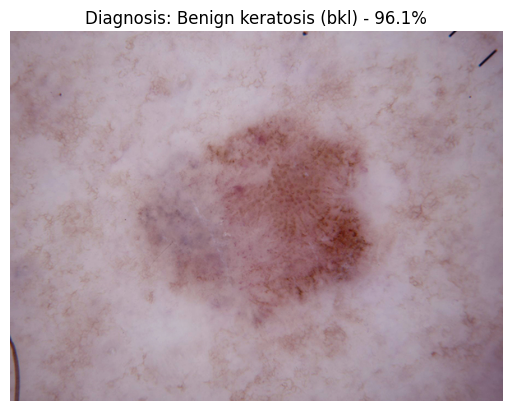


[MEDICAL RECOMMENDATION]
  This appears to be a benign lesion with low risk.
 Recommendation: Routine check-up with a dermatologist is advised.


In [13]:
# Import necessary libraries
import torch
from torchvision import transforms, models
import torch.nn as nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define skin lesion classes and malignancy types
LESION_CLASSES = [
    "Actinic keratosis (akiec)", 
    "Basal cell carcinoma (bcc)", 
    "Benign keratosis (bkl)", 
    "Dermatofibroma (df)", 
    "Melanoma (mel)", 
    "Nevus (nv)", 
    "Vascular lesion (vasc)"
]

# Classes considered malignant
MALIGNANT_TYPES = {"Melanoma (mel)", "Basal cell carcinoma (bcc)", "Actinic keratosis (akiec)"}

# Class to index mapping
class_to_idx = {
    'akiec': 0,
    'bcc': 1,
    'bkl': 2,
    'df': 3,
    'mel': 4,
    'nv': 5,
    'vasc': 6
}

# Index to class mapping
idx_to_class = {v: k for k, v in class_to_idx.items()}

# Set device for model inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define paths for saved models
model_paths = {
    'mobilenetv3': "best_mobilenetv3_ham10000.pth",
    'densenet121': "best_densenet121_ham10000.pth",
    'resnet50': "best_resnet50_ham10000.pth"
}

# Function to build MobileNetV3 model
def build_mobilenetv3_model(num_classes=7):
    model = models.mobilenet_v3_large(pretrained=False)
    num_features = model.classifier[0].in_features
    model.classifier = nn.Sequential(
        nn.Linear(num_features, 256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256, num_classes)
    )
    return model

# Function to build DenseNet121 model
def build_densenet121_model(num_classes=7):
    model = models.densenet121(pretrained=False)
    num_features = model.classifier.in_features
    model.classifier = nn.Linear(num_features, num_classes)
    return model

# Function to build ResNet50 model
def build_resnet50_model(num_classes=7):
    model = models.resnet50(pretrained=False)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)
    return model

# Function to load models
def load_models():
    # Initialize models
    models_dict = {
        'mobilenetv3': build_mobilenetv3_model(),
        'densenet121': build_densenet121_model(),
        'resnet50': build_resnet50_model()
    }
    
    # Load weights if available, otherwise use the models without weights
    for model_name, model in models_dict.items():
        try:
            if os.path.exists(model_paths[model_name]):
                model.load_state_dict(torch.load(model_paths[model_name], map_location=device))
                print(f"Successfully loaded weights for {model_name}")
            else:
                print(f"Warning: Could not find weights for {model_name} at {model_paths[model_name]}")
        except Exception as e:
            print(f"Error loading weights for {model_name}: {str(e)}")
        
        model.to(device)
        model.eval()
    
    return models_dict

# Define transforms for each model
def get_transforms():
    transforms_dict = {
        'mobilenetv3': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]),
        'densenet121': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]),
        'resnet50': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    }
    return transforms_dict

# Enhanced function to analyze skin lesion with multiple models and ensemble prediction
def analyze_skin_lesion(models_dict, image_path, transforms_dict):
    """
    Analyze a skin lesion image using multiple models and ensemble prediction.
    
    Args:
        models_dict: Dictionary containing the trained models
        image_path: Path to the image file
        transforms_dict: Dictionary containing transforms for each model
        
    Returns:
        Dictionary containing diagnosis information and ensemble results
    """
    # Load the image
    try:
        image = Image.open(image_path).convert('RGB')
    except Exception as e:
        return {"error": f"Failed to open image: {str(e)}"}
    
    # Store predictions from all models
    all_predictions = []
    all_confidences = []
    all_probabilities = []
    individual_results = {}
    
    # Get predictions from each model
    for model_name, model in models_dict.items():
        transform = transforms_dict[model_name]
        
        # Preprocess image for this specific model
        image_tensor = transform(image).unsqueeze(0).to(device)
        
        # Get model predictions
        with torch.no_grad():
            outputs = model(image_tensor)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            confidence, predicted_class = torch.max(probs, 1)
        
        predicted_class = predicted_class.item()
        confidence = confidence.item()
        probabilities = probs.squeeze().cpu().numpy()
        
        # Store results
        all_predictions.append(predicted_class)
        all_confidences.append(confidence)
        all_probabilities.append(probabilities)
        
        # Class name and malignancy status
        class_code = idx_to_class[predicted_class]
        class_name = next((name for name in LESION_CLASSES if class_code in name.lower()), "Unknown")
        is_malignant = class_name in MALIGNANT_TYPES
        
        # Store individual model results
        individual_results[model_name] = {
            'diagnosis': class_name,
            'diagnosis_code': class_code,
            'confidence': confidence,
            'probabilities': probabilities,
            'is_malignant': is_malignant
        }
    
    # Calculate ensemble prediction using majority voting
    ensemble_prediction = Counter(all_predictions).most_common(1)[0][0]
    
    # Calculate ensemble probabilities by averaging
    ensemble_probs = np.mean(all_probabilities, axis=0)
    ensemble_confidence = ensemble_probs[ensemble_prediction]
    
    # Get class name for ensemble prediction
    ensemble_class_code = idx_to_class[ensemble_prediction]
    ensemble_class_name = next((name for name in LESION_CLASSES if ensemble_class_code in name.lower()), "Unknown")
    is_malignant_ensemble = ensemble_class_name in MALIGNANT_TYPES
    
    # Prepare final result
    result = {
        'diagnosis': ensemble_class_name,
        'diagnosis_code': ensemble_class_code,
        'confidence': ensemble_confidence,
        'is_malignant': is_malignant_ensemble,
        'image': image,
        'individual_results': individual_results,
        'ensemble_probabilities': ensemble_probs
    }
    
    return result


# Function to print detailed analysis report
def print_analysis_report(result):
    """Print a detailed report of the skin lesion analysis"""
    if 'error' in result:
        print(f"Error: {result['error']}")
        return
    
    print("\n" + "="*50)
    print("SKIN LESION ANALYSIS REPORT")
    print("="*50)
    
    # Ensemble prediction
    print(f"Primary diagnosis: {result['diagnosis']}")
    print(f"Malignancy status: {'Malignant (High risk)' if result['is_malignant'] else 'Benign (Low risk)'}")
    print(f"Confidence level: {result['confidence']*100:.1f}%")
    
   
    
    # Display Image
    plt.imshow(result['image'])
    plt.title(f"Diagnosis: {result['diagnosis']} - {result['confidence']*100:.1f}%")
    plt.axis('off')
    plt.show()
     # Medical recommendations
    print("\n[MEDICAL RECOMMENDATION]")
    if result['is_malignant']:
        print("  Urgent: This lesion shows characteristics of malignancy.")
        print("  Action required: Please consult a dermatologist immediately for evaluation.")
    else:
        print("  This appears to be a benign lesion with low risk.")
        print(" Recommendation: Routine check-up with a dermatologist is advised.")

# Main execution function
def main(image_path):
    """Main function to run the skin lesion analysis"""
    # Load all models
    models_dict = load_models()
    
    # Get transforms
    transforms_dict = get_transforms()
    
    # Analyze the image with all models
    result = analyze_skin_lesion(models_dict, image_path, transforms_dict)
    
    # Visualize the results
    print_analysis_report(result)
    
    return result


if __name__ == "__main__":
   
    test_image_path = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024336.jpg'
    main(test_image_path)


In [14]:
pip install torchinfo



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from torchinfo import summary  
import torch
from torchvision import models
from torch import nn

def build_densenet121_model(num_classes):
    """Function to rebuild DenseNet121 model architecture to match the saved checkpoint"""
    model = models.densenet121(weights=None)  
    num_features = model.classifier.in_features
    model.classifier = nn.Linear(num_features, num_classes)
    return model

# Path to the saved model
model_path = "/kaggle/working/best_densenet121_ham10000.pth"

# Define the number of classes and input image size
num_classes = 7  
input_size = (3, 224, 224)  

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nLoading model on {device}...")

# Build and load model
model = build_densenet121_model(num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)

# Create a dummy input tensor
dummy_input = torch.randn(1, *input_size).to(device)

# Print model summary
print("\n" + "="*80)
print("densenet121 ARCHITECTURE SUMMARY")
print("="*80)

summary(model, input_size=(1, *input_size), device=device.type)



Loading model on cpu...

densenet121 ARCHITECTURE SUMMARY


Layer (type:depth-idx)                   Output Shape              Param #
DenseNet                                 [1, 7]                    --
├─Sequential: 1-1                        [1, 1024, 7, 7]           --
│    └─Conv2d: 2-1                       [1, 64, 112, 112]         9,408
│    └─BatchNorm2d: 2-2                  [1, 64, 112, 112]         128
│    └─ReLU: 2-3                         [1, 64, 112, 112]         --
│    └─MaxPool2d: 2-4                    [1, 64, 56, 56]           --
│    └─_DenseBlock: 2-5                  [1, 256, 56, 56]          --
│    │    └─_DenseLayer: 3-1             [1, 32, 56, 56]           45,440
│    │    └─_DenseLayer: 3-2             [1, 32, 56, 56]           49,600
│    │    └─_DenseLayer: 3-3             [1, 32, 56, 56]           53,760
│    │    └─_DenseLayer: 3-4             [1, 32, 56, 56]           57,920
│    │    └─_DenseLayer: 3-5             [1, 32, 56, 56]           62,080
│    │    └─_DenseLayer: 3-6             [1, 32, 56, 56]     

In [16]:
pip install torchsummary



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
from torchsummary import summary  
import torch
from torchvision import models
from torch import nn

def build_mobilenetv3_model(num_classes):
    """Function to rebuild the exact MobileNetV3-Large architecture used in training"""
    model = models.mobilenet_v3_large(weights=None)

   
    model.classifier[0] = nn.Linear(960, 256)
    model.classifier[3] = nn.Linear(256, num_classes)
    return model

# Model and environment settings
model_path = "/kaggle/working/best_mobilenetv3_ham10000.pth"   
num_classes = 7  
input_size = (3, 224, 224)  

# Build model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nLoading model on {device}...")

model = build_mobilenetv3_model(num_classes)

# Load trained weights
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)

# Create dummy input
dummy_input = torch.randn(1, *input_size).to(device)

# Print model summary
print("\n" + "="*80)
print("MobileNetV3 ARCHITECTURE SUMMARY")
print("="*80)


summary(model, input_size=input_size, device=device.type)



Loading model on cpu...

MobileNetV3 ARCHITECTURE SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 16, 112, 112]             144
       BatchNorm2d-5         [-1, 16, 112, 112]              32
              ReLU-6         [-1, 16, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             256
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 64, 112, 112]           1,024
      BatchNorm2d-11         [-1, 64, 112, 112]             128
             ReLU-12         [-1, 64, 112, 112]               0
           Conv2d-13           [-1, 64, 56, 

In [25]:
from torchsummary import summary  
import torch
from torchvision import models
from torch import nn

def build_resnet50_model(num_classes):
    """Function to rebuild the exact ResNet50 architecture used in training"""
    model = models.resnet50(weights=None)
    
   
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)
    return model


model_path = "/kaggle/working/best_resnet50_ham10000.pth"   
num_classes = 7  
input_size = (3, 224, 224)  

# Build model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nLoading model on {device}...")

model = build_resnet50_model(num_classes)

# Load trained weights
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)

# Create dummy input
dummy_input = torch.randn(1, *input_size).to(device)

# Print model summary
print("\n" + "="*80)
print("ResNet50 ARCHITECTURE SUMMARY")
print("="*80)

summary(model, input_size=input_size, device=device.type)



Loading model on cpu...

ResNet50 ARCHITECTURE SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]

/usr/local/lib/python3.10/site-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
E0000 00:00:1744477477.173278      10 common_lib.cc:621] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:232


[2025-04-12 17:04:41] Using TPU for computation
[2025-04-12 17:04:41] Using device: xla:0
[2025-04-12 17:04:41] Using TPU-specific settings
[2025-04-12 17:04:41] 
Loading and augmenting dataset...
[2025-04-12 17:04:41] 
Initial binary class distribution:
[2025-04-12 17:04:41] benign: 8388
[2025-04-12 17:04:41] malignant: 1627


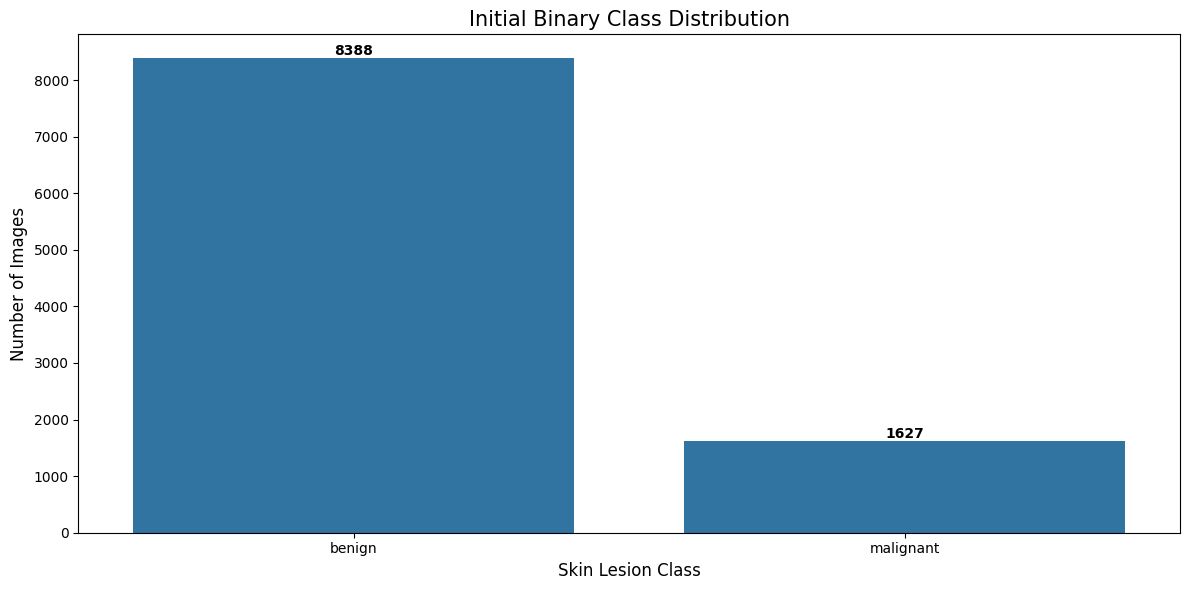

[2025-04-12 17:04:42] 
Class distribution after downsampling:
[2025-04-12 17:04:42] benign: 8388
[2025-04-12 17:04:42] malignant: 1627
[2025-04-12 17:04:42] 
STEP 1: Processing original images and generating augmentations


Processing original images: 100%|██████████| 10015/10015 [02:06<00:00, 78.90it/s]


[2025-04-12 17:06:49] 
Generating augmented images...
[2025-04-12 17:06:49] Class 'benign' already has 8388 samples, no augmentation needed
[2025-04-12 17:06:49] Augmenting 'malignant' class: adding 6761 samples to reach 8388


Preloading images for malignant: 100%|██████████| 1627/1627 [00:11<00:00, 143.13it/s]


[2025-04-12 17:07:08] Generated 3000/6761 augmented samples for class malignant
[2025-04-12 17:07:17] Generated 6000/6761 augmented samples for class malignant
[2025-04-12 17:07:20] 
STEP 2: Creating transforms for different model architectures
[2025-04-12 17:07:20] Applying resize and normalize for dataset splitting...


Processing images: 100%|██████████| 16776/16776 [00:51<00:00, 327.14it/s]


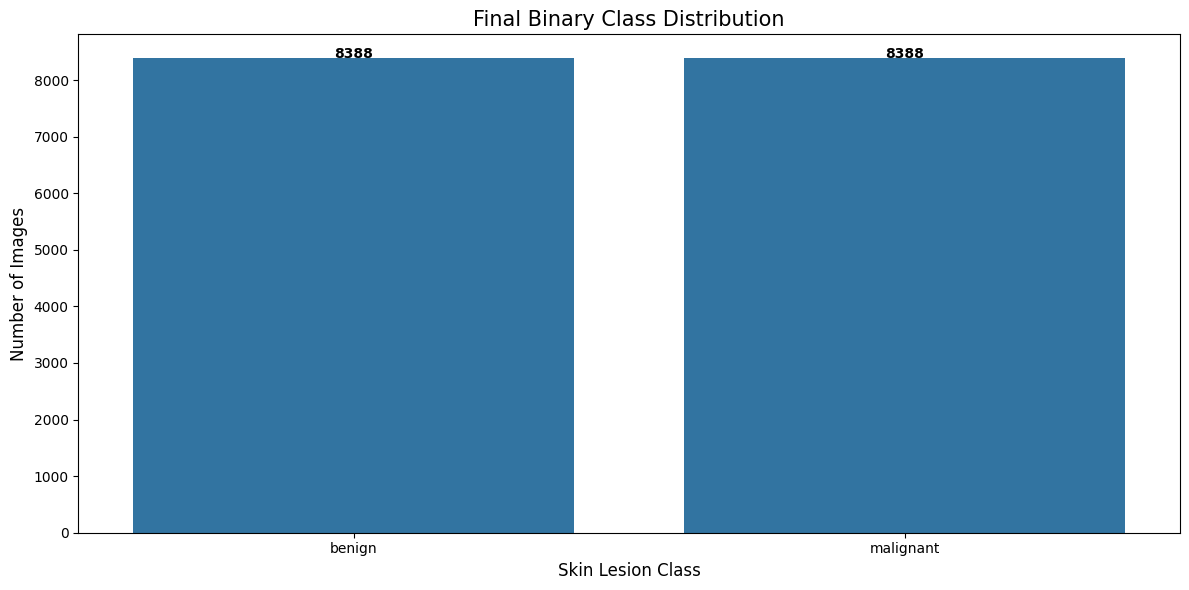

[2025-04-12 17:08:11] 
STEP 3: Splitting dataset into train, validation, and test sets
[2025-04-12 17:08:12] Splitting dataset: 11744 train, 2517 validation, 2517 test samples
[2025-04-12 17:08:14] Validation set size: 2517, Test set size: 2517


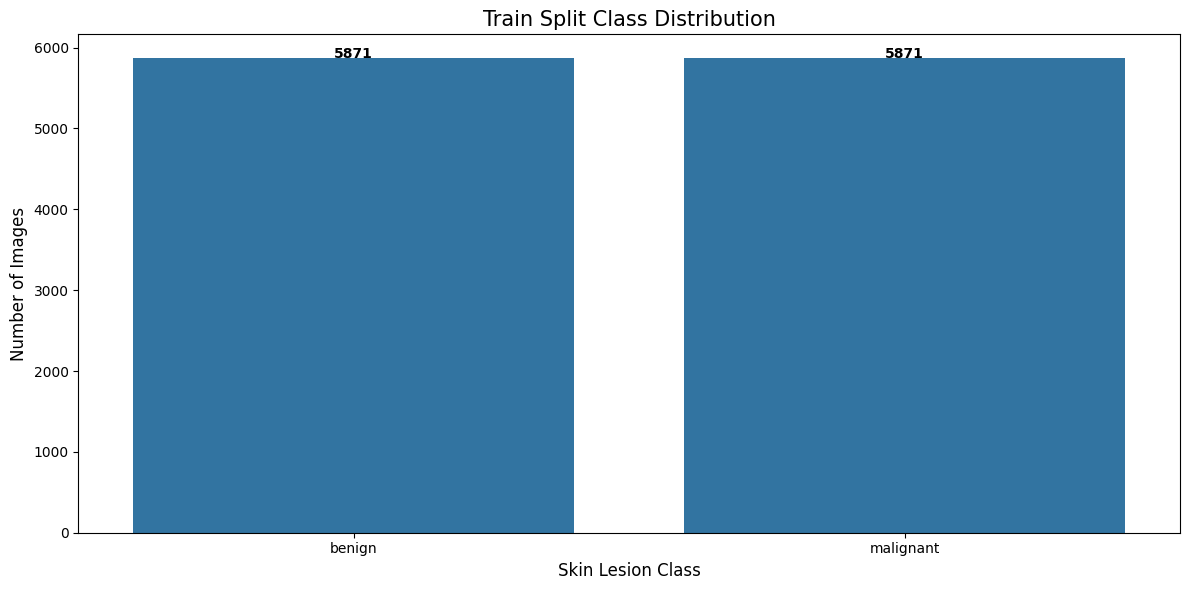

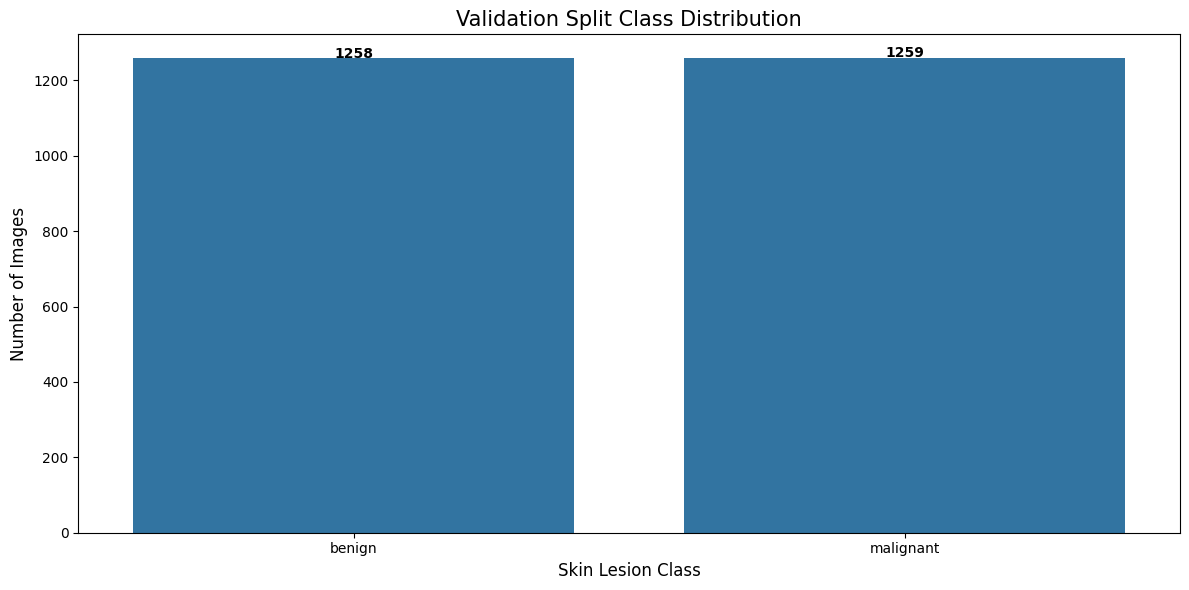

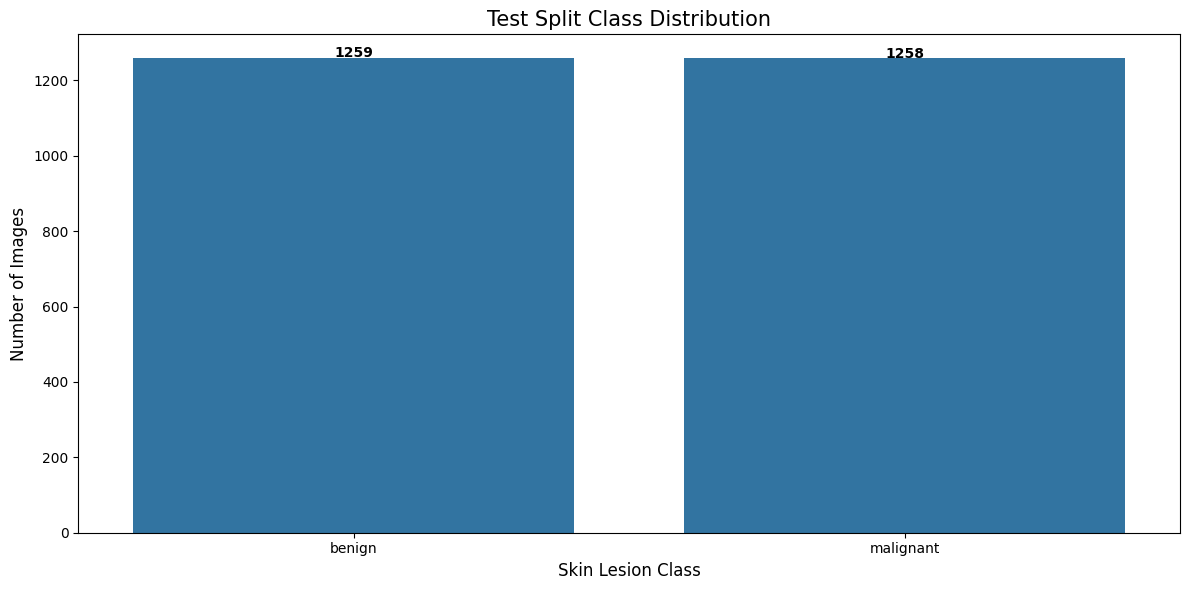

[2025-04-12 17:08:16] Using batch_size=128, num_workers=96
[2025-04-12 17:08:52] mobilenetv3 - Batch 0 - Image shape: torch.Size([128, 3, 224, 224]), Labels shape: torch.Size([128])
[2025-04-12 17:09:34] densenet121 - Batch 0 - Image shape: torch.Size([128, 3, 224, 224]), Labels shape: torch.Size([128])
[2025-04-12 17:10:13] resnet50 - Batch 0 - Image shape: torch.Size([128, 3, 224, 224]), Labels shape: torch.Size([128])
[2025-04-12 17:10:15] 
Dataset preparation completed successfully!
[2025-04-12 17:10:16] 
Dataset Information:
[2025-04-12 17:10:16] Classes: ['benign', 'malignant']
[2025-04-12 17:10:16] Dataset sizes: {'train': 11742, 'validation': 2517, 'test': 2517, 'total': 16776}


Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 118MB/s]
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 189MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 204MB/s]


[2025-04-12 17:10:18] 
----- Training mobilenetv3 -----
[2025-04-12 17:10:18] Using TPU for computation
[2025-04-12 17:10:18] Using device: xla:0 for mobilenetv3
[2025-04-12 17:10:18] Starting training for mobilenetv3, will log updates every 10 minutes


mobilenetv3 - Epoch 1/10: 100%|██████████| 92/92 [01:04<00:00,  1.43it/s]


[2025-04-12 17:12:25]  Best mobilenetv3 model saved with Val Accuracy: 0.8772
[2025-04-12 17:12:25] 
mobilenetv3 - Epoch 1/10
[2025-04-12 17:12:25] Train Loss: 0.3448, Train Accuracy: 0.8383
[2025-04-12 17:12:25] Val Loss: 0.2893, Val Accuracy: 0.8772
[2025-04-12 17:12:25] Epoch Time: 126.80 seconds


mobilenetv3 - Epoch 2/10: 100%|██████████| 92/92 [00:57<00:00,  1.59it/s] 


[2025-04-12 17:14:00] 
mobilenetv3 - Epoch 2/10
[2025-04-12 17:14:00] Train Loss: 0.2812, Train Accuracy: 0.8752
[2025-04-12 17:14:00] Val Loss: 0.2727, Val Accuracy: 0.8737
[2025-04-12 17:14:00] Epoch Time: 94.73 seconds


mobilenetv3 - Epoch 3/10: 100%|██████████| 92/92 [00:46<00:00,  1.99it/s]


[2025-04-12 17:15:22]  Best mobilenetv3 model saved with Val Accuracy: 0.8943
[2025-04-12 17:15:22] 
mobilenetv3 - Epoch 3/10
[2025-04-12 17:15:22] Train Loss: 0.2430, Train Accuracy: 0.8867
[2025-04-12 17:15:22] Val Loss: 0.2350, Val Accuracy: 0.8943
[2025-04-12 17:15:22] Epoch Time: 81.28 seconds


mobilenetv3 - Epoch 4/10: 100%|██████████| 92/92 [00:43<00:00,  2.10it/s]


[2025-04-12 17:16:41] 
mobilenetv3 - Epoch 4/10
[2025-04-12 17:16:41] Train Loss: 0.2230, Train Accuracy: 0.8989
[2025-04-12 17:16:41] Val Loss: 0.2465, Val Accuracy: 0.8915
[2025-04-12 17:16:41] Epoch Time: 78.62 seconds


mobilenetv3 - Epoch 5/10: 100%|██████████| 92/92 [00:45<00:00,  2.01it/s]


[2025-04-12 17:18:02]  Best mobilenetv3 model saved with Val Accuracy: 0.8959
[2025-04-12 17:18:02] 
mobilenetv3 - Epoch 5/10
[2025-04-12 17:18:02] Train Loss: 0.2089, Train Accuracy: 0.9045
[2025-04-12 17:18:02] Val Loss: 0.2296, Val Accuracy: 0.8959
[2025-04-12 17:18:02] Epoch Time: 80.75 seconds


mobilenetv3 - Epoch 6/10: 100%|██████████| 92/92 [00:46<00:00,  2.00it/s]


[2025-04-12 17:19:25]  Best mobilenetv3 model saved with Val Accuracy: 0.8979
[2025-04-12 17:19:25] 
mobilenetv3 - Epoch 6/10
[2025-04-12 17:19:25] Train Loss: 0.1987, Train Accuracy: 0.9099
[2025-04-12 17:19:25] Val Loss: 0.2244, Val Accuracy: 0.8979
[2025-04-12 17:19:25] Epoch Time: 82.23 seconds


mobilenetv3 - Epoch 7/10: 100%|██████████| 92/92 [00:44<00:00,  2.06it/s]


[2025-04-12 17:20:46] 
mobilenetv3 - Epoch 7/10
[2025-04-12 17:20:46] Train Loss: 0.1849, Train Accuracy: 0.9199
[2025-04-12 17:20:46] Val Loss: 0.3000, Val Accuracy: 0.8733
[2025-04-12 17:20:46] Epoch Time: 81.18 seconds


mobilenetv3 - Epoch 8/10:   0%|          | 0/92 [00:00<?, ?it/s]

[2025-04-12 17:21:19] Progress: mobilenetv3 training - Epoch 8/10, Batch 0/92


mobilenetv3 - Epoch 8/10: 100%|██████████| 92/92 [00:45<00:00,  2.01it/s]


[2025-04-12 17:22:09]  Best mobilenetv3 model saved with Val Accuracy: 0.9050
[2025-04-12 17:22:09] 
mobilenetv3 - Epoch 8/10
[2025-04-12 17:22:09] Train Loss: 0.1760, Train Accuracy: 0.9219
[2025-04-12 17:22:09] Val Loss: 0.2230, Val Accuracy: 0.9050
[2025-04-12 17:22:09] Epoch Time: 82.30 seconds


mobilenetv3 - Epoch 9/10: 100%|██████████| 92/92 [00:44<00:00,  2.06it/s]


[2025-04-12 17:23:29] 
mobilenetv3 - Epoch 9/10
[2025-04-12 17:23:29] Train Loss: 0.1611, Train Accuracy: 0.9302
[2025-04-12 17:23:29] Val Loss: 0.2419, Val Accuracy: 0.8963
[2025-04-12 17:23:29] Epoch Time: 79.46 seconds


mobilenetv3 - Epoch 10/10: 100%|██████████| 92/92 [00:46<00:00,  2.00it/s]


[2025-04-12 17:24:50] 
mobilenetv3 - Epoch 10/10
[2025-04-12 17:24:50] Train Loss: 0.1462, Train Accuracy: 0.9391
[2025-04-12 17:24:50] Val Loss: 0.2143, Val Accuracy: 0.9035
[2025-04-12 17:24:50] Epoch Time: 80.93 seconds
[2025-04-12 17:24:51] 
Training Complete for mobilenetv3!
[2025-04-12 17:24:51] Total Training Time: 872.42 seconds


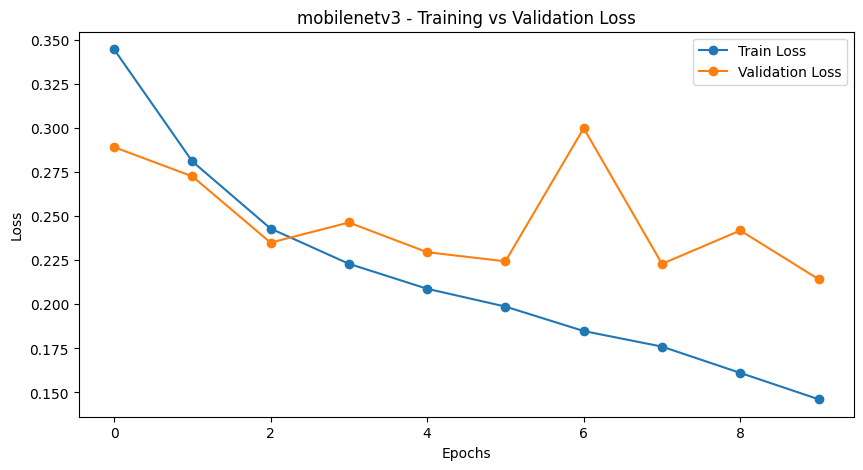

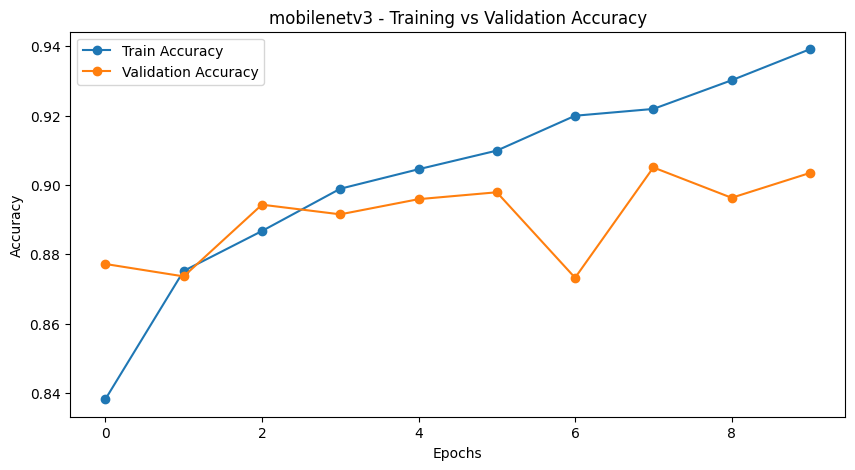

[2025-04-12 17:24:52] 
Time taken for each epoch (seconds):
[2025-04-12 17:24:52] Epoch 1: 126.80 seconds
[2025-04-12 17:24:52] Epoch 2: 94.73 seconds
[2025-04-12 17:24:52] Epoch 3: 81.28 seconds
[2025-04-12 17:24:52] Epoch 4: 78.62 seconds
[2025-04-12 17:24:52] Epoch 5: 80.75 seconds
[2025-04-12 17:24:52] Epoch 6: 82.23 seconds
[2025-04-12 17:24:52] Epoch 7: 81.18 seconds
[2025-04-12 17:24:52] Epoch 8: 82.30 seconds
[2025-04-12 17:24:52] Epoch 9: 79.46 seconds
[2025-04-12 17:24:52] Epoch 10: 80.93 seconds
[2025-04-12 17:24:52] 
----- Training densenet121 -----
[2025-04-12 17:24:52] Using TPU for computation
[2025-04-12 17:24:52] Using device: xla:0 for densenet121
[2025-04-12 17:24:52] Starting training for densenet121, will log updates every 10 minutes


densenet121 - Epoch 1/10: 100%|██████████| 92/92 [01:49<00:00,  1.19s/it] 


[2025-04-12 17:28:04]  Best densenet121 model saved with Val Accuracy: 0.9241
[2025-04-12 17:28:04] 
densenet121 - Epoch 1/10
[2025-04-12 17:28:04] Train Loss: 0.2172, Train Accuracy: 0.8984
[2025-04-12 17:28:04] Val Loss: 0.1792, Val Accuracy: 0.9241
[2025-04-12 17:28:04] Epoch Time: 191.88 seconds


densenet121 - Epoch 2/10: 100%|██████████| 92/92 [01:32<00:00,  1.00s/it] 


[2025-04-12 17:30:20] 
densenet121 - Epoch 2/10
[2025-04-12 17:30:20] Train Loss: 0.1508, Train Accuracy: 0.9359
[2025-04-12 17:30:20] Val Loss: 0.1966, Val Accuracy: 0.9162
[2025-04-12 17:30:20] Epoch Time: 135.70 seconds


densenet121 - Epoch 3/10: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]


[2025-04-12 17:32:15] 
densenet121 - Epoch 3/10
[2025-04-12 17:32:15] Train Loss: 0.1005, Train Accuracy: 0.9594
[2025-04-12 17:32:15] Val Loss: 0.2340, Val Accuracy: 0.9090
[2025-04-12 17:32:15] Epoch Time: 115.26 seconds


densenet121 - Epoch 4/10: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]


[2025-04-12 17:34:10]  Best densenet121 model saved with Val Accuracy: 0.9281
[2025-04-12 17:34:10] 
densenet121 - Epoch 4/10
[2025-04-12 17:34:10] Train Loss: 0.0584, Train Accuracy: 0.9770
[2025-04-12 17:34:10] Val Loss: 0.2017, Val Accuracy: 0.9281
[2025-04-12 17:34:10] Epoch Time: 114.11 seconds


densenet121 - Epoch 5/10:   9%|▊         | 8/92 [00:41<01:53,  1.36s/it]

[2025-04-12 17:34:52] Progress: densenet121 training - Epoch 5/10, Batch 8/92


densenet121 - Epoch 5/10: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]


[2025-04-12 17:36:04] 
densenet121 - Epoch 5/10
[2025-04-12 17:36:04] Train Loss: 0.0370, Train Accuracy: 0.9863
[2025-04-12 17:36:04] Val Loss: 0.2614, Val Accuracy: 0.9249
[2025-04-12 17:36:04] Epoch Time: 114.11 seconds


densenet121 - Epoch 6/10: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]


[2025-04-12 17:38:00] 
densenet121 - Epoch 6/10
[2025-04-12 17:38:00] Train Loss: 0.0286, Train Accuracy: 0.9894
[2025-04-12 17:38:00] Val Loss: 0.2659, Val Accuracy: 0.9241
[2025-04-12 17:38:00] Epoch Time: 115.65 seconds


densenet121 - Epoch 7/10: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]


[2025-04-12 17:39:57] 
densenet121 - Epoch 7/10
[2025-04-12 17:39:57] Train Loss: 0.0207, Train Accuracy: 0.9932
[2025-04-12 17:39:57] Val Loss: 0.3243, Val Accuracy: 0.9126
[2025-04-12 17:39:57] Epoch Time: 115.90 seconds


densenet121 - Epoch 8/10: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]


[2025-04-12 17:41:53] 
densenet121 - Epoch 8/10
[2025-04-12 17:41:53] Train Loss: 0.0161, Train Accuracy: 0.9941
[2025-04-12 17:41:53] Val Loss: 0.3448, Val Accuracy: 0.9213
[2025-04-12 17:41:53] Epoch Time: 116.28 seconds


densenet121 - Epoch 9/10: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]


[2025-04-12 17:43:50] 
densenet121 - Epoch 9/10
[2025-04-12 17:43:50] Train Loss: 0.0118, Train Accuracy: 0.9963
[2025-04-12 17:43:50] Val Loss: 0.3247, Val Accuracy: 0.9277
[2025-04-12 17:43:50] Epoch Time: 116.56 seconds
[2025-04-12 17:43:51] 
Early stopping triggered for densenet121. Training stopped.
[2025-04-12 17:43:51] 
Training Complete for densenet121!
[2025-04-12 17:43:51] Total Training Time: 1138.81 seconds


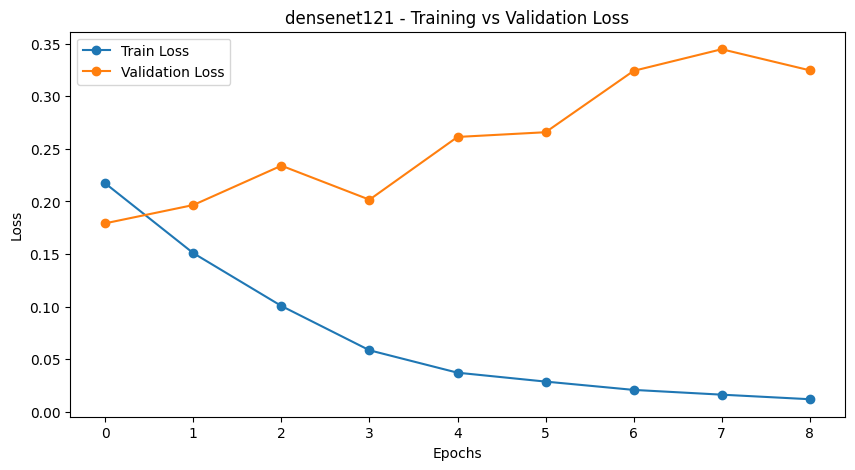

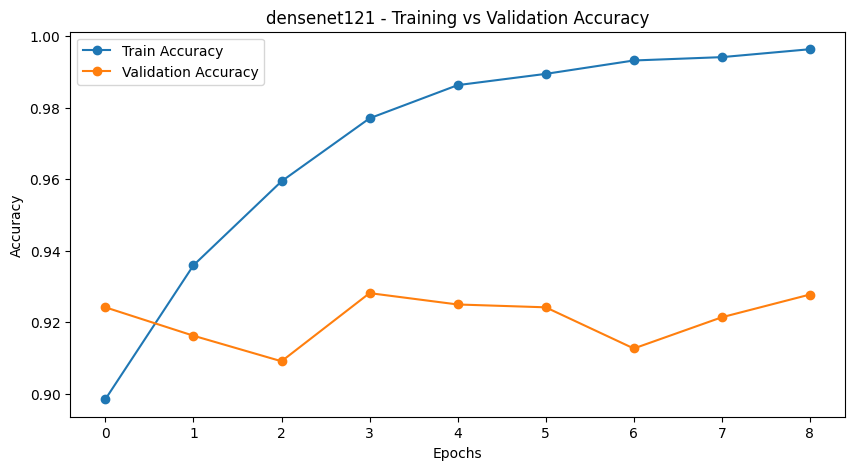

[2025-04-12 17:43:52] 
Time taken for each epoch (seconds):
[2025-04-12 17:43:52] Epoch 1: 191.88 seconds
[2025-04-12 17:43:52] Epoch 2: 135.70 seconds
[2025-04-12 17:43:52] Epoch 3: 115.26 seconds
[2025-04-12 17:43:52] Epoch 4: 114.11 seconds
[2025-04-12 17:43:52] Epoch 5: 114.11 seconds
[2025-04-12 17:43:52] Epoch 6: 115.65 seconds
[2025-04-12 17:43:52] Epoch 7: 115.90 seconds
[2025-04-12 17:43:52] Epoch 8: 116.28 seconds
[2025-04-12 17:43:52] Epoch 9: 116.56 seconds
[2025-04-12 17:43:52] 
----- Training resnet50 -----
[2025-04-12 17:43:52] Using TPU for computation
[2025-04-12 17:43:52] Using device: xla:0 for resnet50
[2025-04-12 17:43:52] Starting training for resnet50, will log updates every 10 minutes


resnet50 - Epoch 1/10: 100%|██████████| 92/92 [01:29<00:00,  1.02it/s] 


[2025-04-12 17:46:35]  Best resnet50 model saved with Val Accuracy: 0.9154
[2025-04-12 17:46:35] 
resnet50 - Epoch 1/10
[2025-04-12 17:46:35] Train Loss: 0.2144, Train Accuracy: 0.9010
[2025-04-12 17:46:35] Val Loss: 0.1812, Val Accuracy: 0.9154
[2025-04-12 17:46:35] Epoch Time: 163.61 seconds


resnet50 - Epoch 2/10: 100%|██████████| 92/92 [01:13<00:00,  1.25it/s] 


[2025-04-12 17:48:35]  Best resnet50 model saved with Val Accuracy: 0.9197
[2025-04-12 17:48:35] 
resnet50 - Epoch 2/10
[2025-04-12 17:48:35] Train Loss: 0.1357, Train Accuracy: 0.9443
[2025-04-12 17:48:35] Val Loss: 0.1818, Val Accuracy: 0.9197
[2025-04-12 17:48:35] Epoch Time: 119.20 seconds


resnet50 - Epoch 3/10: 100%|██████████| 92/92 [01:00<00:00,  1.51it/s] 


[2025-04-12 17:50:22]  Best resnet50 model saved with Val Accuracy: 0.9305
[2025-04-12 17:50:22] 
resnet50 - Epoch 3/10
[2025-04-12 17:50:22] Train Loss: 0.0843, Train Accuracy: 0.9673
[2025-04-12 17:50:22] Val Loss: 0.1932, Val Accuracy: 0.9305
[2025-04-12 17:50:22] Epoch Time: 106.39 seconds


resnet50 - Epoch 4/10: 100%|██████████| 92/92 [00:59<00:00,  1.55it/s] 


[2025-04-12 17:52:08] 
resnet50 - Epoch 4/10
[2025-04-12 17:52:08] Train Loss: 0.0404, Train Accuracy: 0.9847
[2025-04-12 17:52:08] Val Loss: 0.2267, Val Accuracy: 0.9217
[2025-04-12 17:52:08] Epoch Time: 106.47 seconds


resnet50 - Epoch 5/10: 100%|██████████| 92/92 [01:00<00:00,  1.52it/s] 


[2025-04-12 17:53:55] 
resnet50 - Epoch 5/10
[2025-04-12 17:53:55] Train Loss: 0.0322, Train Accuracy: 0.9884
[2025-04-12 17:53:55] Val Loss: 0.2574, Val Accuracy: 0.9221
[2025-04-12 17:53:55] Epoch Time: 105.88 seconds


resnet50 - Epoch 6/10:   0%|          | 0/92 [00:00<?, ?it/s]

[2025-04-12 17:54:36] Progress: resnet50 training - Epoch 6/10, Batch 0/92


resnet50 - Epoch 6/10: 100%|██████████| 92/92 [00:58<00:00,  1.56it/s] 


[2025-04-12 17:55:39] 
resnet50 - Epoch 6/10
[2025-04-12 17:55:39] Train Loss: 0.0150, Train Accuracy: 0.9942
[2025-04-12 17:55:39] Val Loss: 0.3827, Val Accuracy: 0.9245
[2025-04-12 17:55:39] Epoch Time: 104.06 seconds


resnet50 - Epoch 7/10: 100%|██████████| 92/92 [01:01<00:00,  1.50it/s] 


[2025-04-12 17:57:26] 
resnet50 - Epoch 7/10
[2025-04-12 17:57:26] Train Loss: 0.0168, Train Accuracy: 0.9940
[2025-04-12 17:57:26] Val Loss: 0.4299, Val Accuracy: 0.9130
[2025-04-12 17:57:26] Epoch Time: 106.59 seconds


resnet50 - Epoch 8/10: 100%|██████████| 92/92 [01:00<00:00,  1.51it/s] 


[2025-04-12 17:59:13] 
resnet50 - Epoch 8/10
[2025-04-12 17:59:13] Train Loss: 0.0099, Train Accuracy: 0.9966
[2025-04-12 17:59:13] Val Loss: 0.3742, Val Accuracy: 0.9289
[2025-04-12 17:59:13] Epoch Time: 106.30 seconds
[2025-04-12 17:59:13] 
Early stopping triggered for resnet50. Training stopped.
[2025-04-12 17:59:13] 
Training Complete for resnet50!
[2025-04-12 17:59:13] Total Training Time: 921.47 seconds


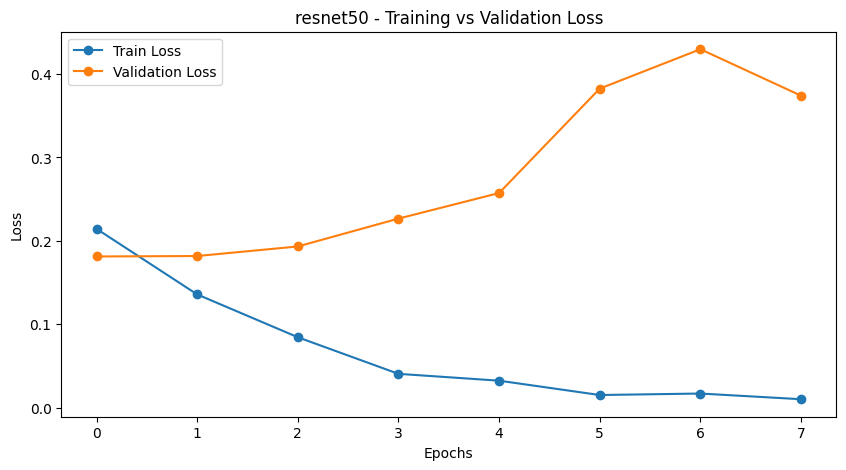

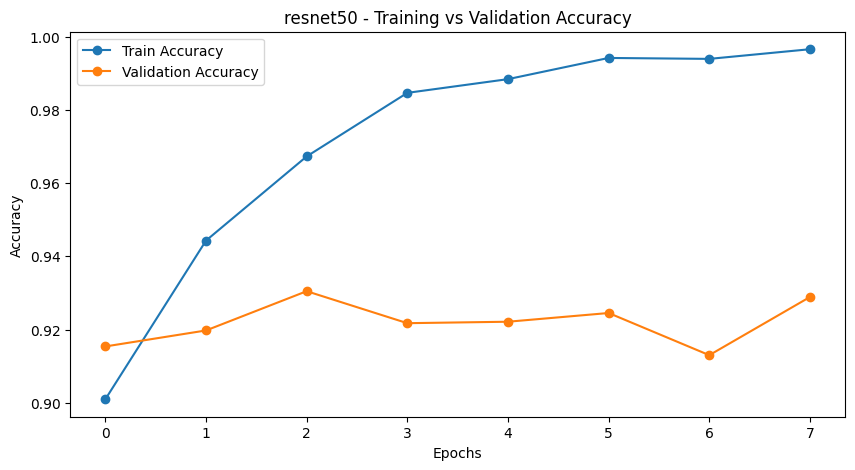

[2025-04-12 17:59:14] 
Time taken for each epoch (seconds):
[2025-04-12 17:59:14] Epoch 1: 163.61 seconds
[2025-04-12 17:59:14] Epoch 2: 119.20 seconds
[2025-04-12 17:59:14] Epoch 3: 106.39 seconds
[2025-04-12 17:59:14] Epoch 4: 106.47 seconds
[2025-04-12 17:59:14] Epoch 5: 105.88 seconds
[2025-04-12 17:59:14] Epoch 6: 104.06 seconds
[2025-04-12 17:59:14] Epoch 7: 106.59 seconds
[2025-04-12 17:59:14] Epoch 8: 106.30 seconds
[2025-04-12 17:59:14] 
----- Evaluating Ensemble Model -----
[2025-04-12 17:59:14] Using TPU for computation
[2025-04-12 17:59:14] 
Evaluating ensemble model...
[2025-04-12 17:59:15] 
Gathering predictions from all models


Getting resnet50 predictions: 100%|██████████| 20/20 [01:19<00:00,  3.95s/it]


[2025-04-12 18:03:16] 
----- Majority Voting Ensemble Results -----
[2025-04-12 18:03:16] Ensemble Test Accuracy: 0.9356
[2025-04-12 18:03:16] Ensemble Evaluation Time: 241.74 seconds
[2025-04-12 18:03:16] 
Classification Report of Majority Voting Ensemble (MobileNetV3, DenseNet121, ResNet50):
[2025-04-12 18:03:16]               precision  recall  f1-score   support
benign            0.909   0.968     0.938  1259.000
malignant         0.966   0.903     0.933  1258.000
accuracy          0.936   0.936     0.936     0.936
macro avg         0.938   0.936     0.936  2517.000
weighted avg      0.937   0.936     0.936  2517.000


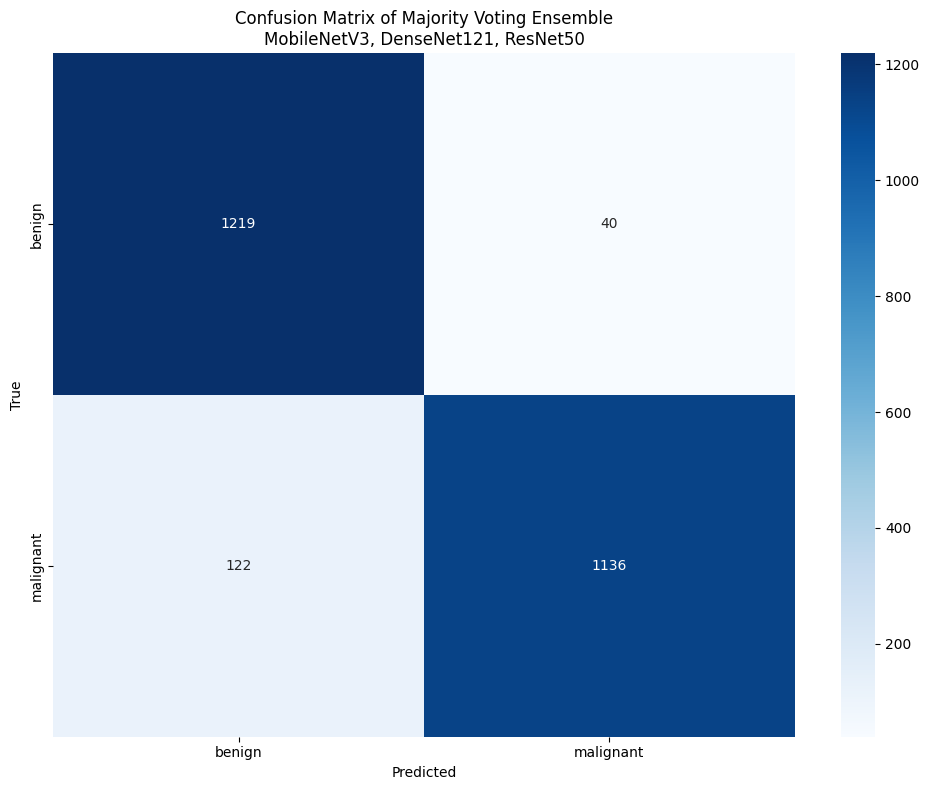

[2025-04-12 18:03:17] 
Ensemble Binary Classification Metrics:
[2025-04-12 18:03:17] Sensitivity (Recall): 0.9030
[2025-04-12 18:03:17] Specificity: 0.9682
[2025-04-12 18:03:17] Precision: 0.9660
[2025-04-12 18:03:17] F1 Score: 0.9334
[2025-04-12 18:03:17] Using TPU for computation
[2025-04-12 18:03:17] Evaluating mobilenetv3...


Evaluating mobilenetv3: 100%|██████████| 20/20 [01:14<00:00,  3.72s/it]


[2025-04-12 18:04:31] 
mobilenetv3 Test Accuracy: 0.9050
[2025-04-12 18:04:31] 
mobilenetv3 Classification Report:
[2025-04-12 18:04:31]               precision  recall  f1-score   support
benign            0.861   0.967     0.911  1259.000
malignant         0.962   0.843     0.899  1258.000
accuracy          0.905   0.905     0.905     0.905
macro avg         0.911   0.905     0.905  2517.000
weighted avg      0.911   0.905     0.905  2517.000


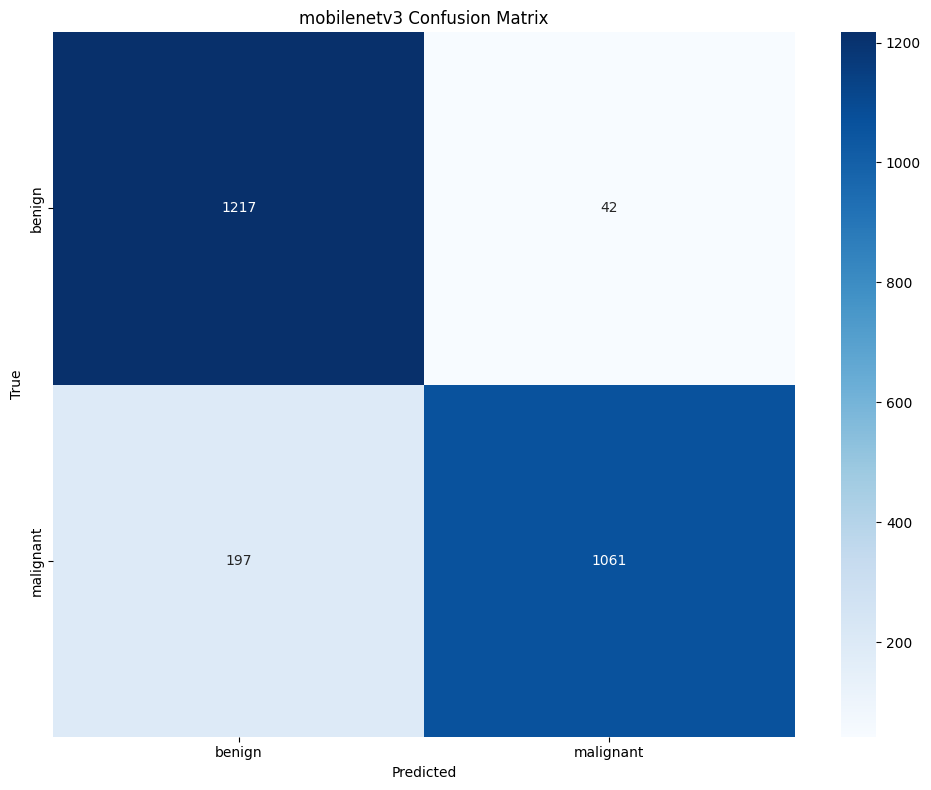

[2025-04-12 18:04:32] 
mobilenetv3 Binary Classification Metrics:
[2025-04-12 18:04:32] Sensitivity (Recall): 0.8434
[2025-04-12 18:04:32] Specificity: 0.9666
[2025-04-12 18:04:32] Precision: 0.9619
[2025-04-12 18:04:32] F1 Score: 0.8988
[2025-04-12 18:04:32] Using TPU for computation
[2025-04-12 18:04:32] Computing ROC curve for mobilenetv3...


Getting ROC data for mobilenetv3: 100%|██████████| 20/20 [00:48<00:00,  2.44s/it]


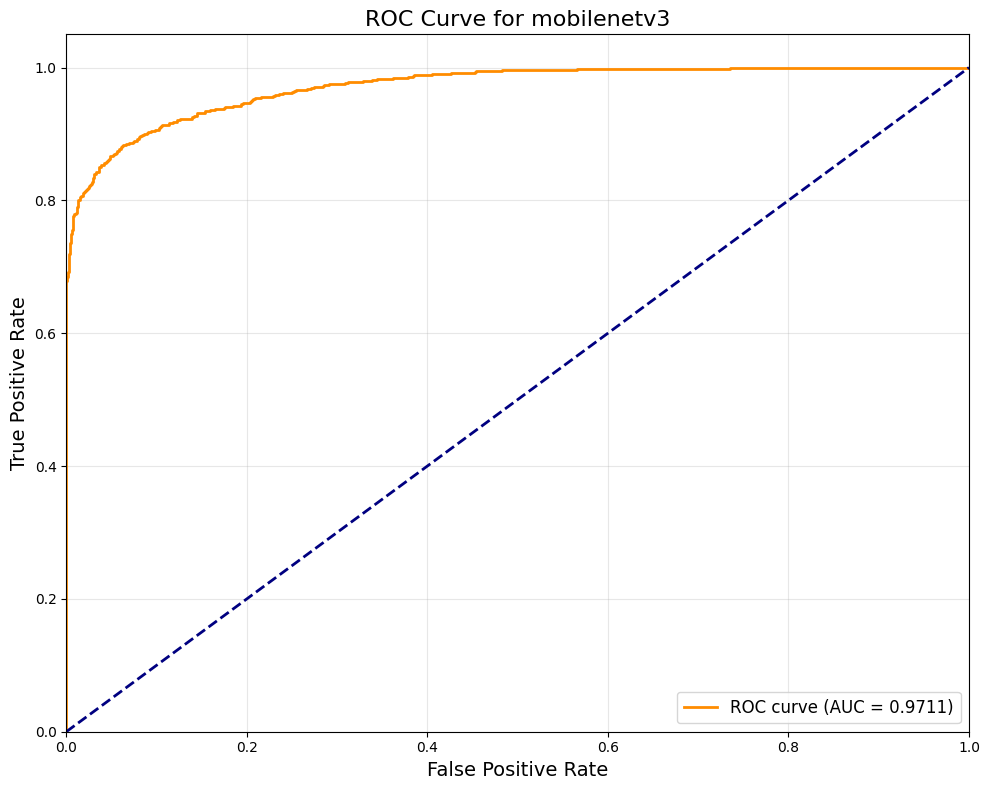

[2025-04-12 18:05:21] Using TPU for computation
[2025-04-12 18:05:21] Evaluating densenet121...


Evaluating densenet121: 100%|██████████| 20/20 [01:34<00:00,  4.70s/it]


[2025-04-12 18:06:56] 
densenet121 Test Accuracy: 0.9197
[2025-04-12 18:06:56] 
densenet121 Classification Report:
[2025-04-12 18:06:56]               precision  recall  f1-score  support
benign            0.913   0.929     0.920  1259.00
malignant         0.927   0.911     0.919  1258.00
accuracy          0.920   0.920     0.920     0.92
macro avg         0.920   0.920     0.920  2517.00
weighted avg      0.920   0.920     0.920  2517.00


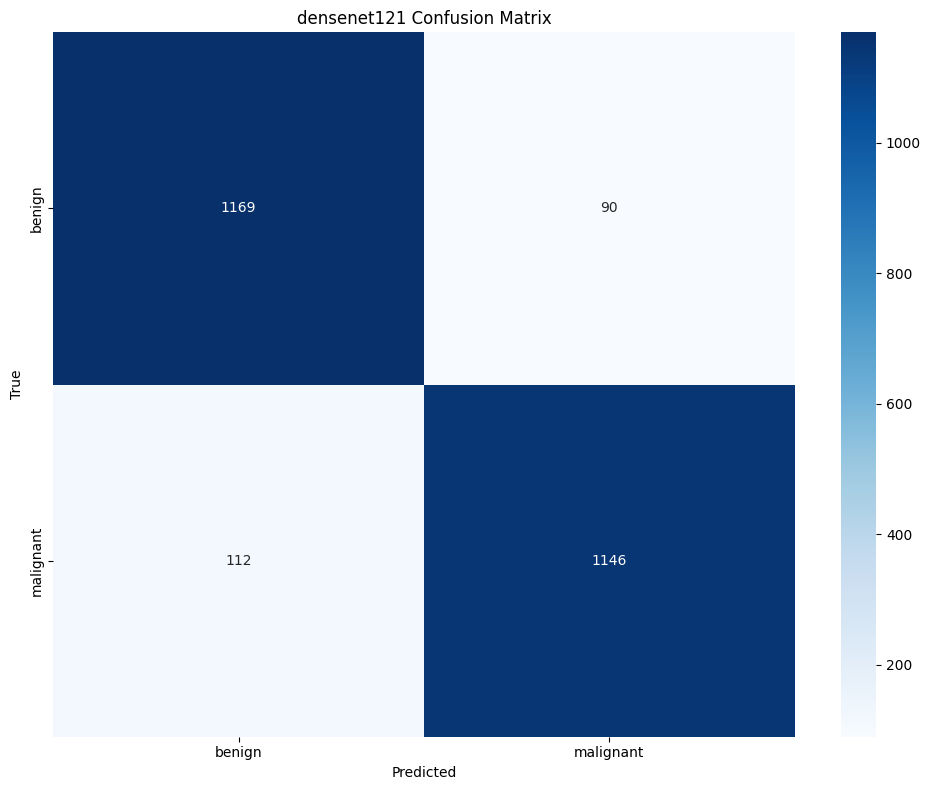

[2025-04-12 18:06:56] 
densenet121 Binary Classification Metrics:
[2025-04-12 18:06:56] Sensitivity (Recall): 0.9110
[2025-04-12 18:06:56] Specificity: 0.9285
[2025-04-12 18:06:56] Precision: 0.9272
[2025-04-12 18:06:56] F1 Score: 0.9190
[2025-04-12 18:06:56] Using TPU for computation
[2025-04-12 18:06:56] Computing ROC curve for densenet121...


Getting ROC data for densenet121: 100%|██████████| 20/20 [00:54<00:00,  2.70s/it]


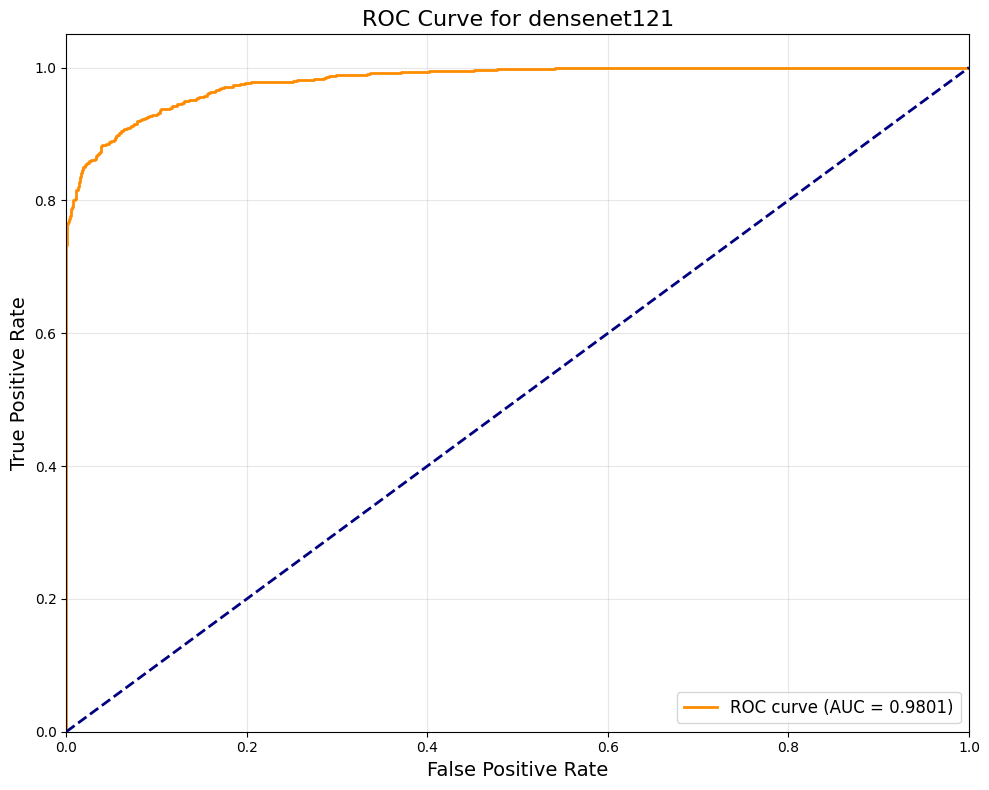

[2025-04-12 18:07:51] Using TPU for computation
[2025-04-12 18:07:51] Evaluating resnet50...


Evaluating resnet50: 100%|██████████| 20/20 [01:23<00:00,  4.15s/it]


[2025-04-12 18:09:14] 
resnet50 Test Accuracy: 0.9340
[2025-04-12 18:09:14] 
resnet50 Classification Report:
[2025-04-12 18:09:14]               precision  recall  f1-score   support
benign            0.916   0.956     0.936  1259.000
malignant         0.954   0.912     0.933  1258.000
accuracy          0.934   0.934     0.934     0.934
macro avg         0.935   0.934     0.934  2517.000
weighted avg      0.935   0.934     0.934  2517.000


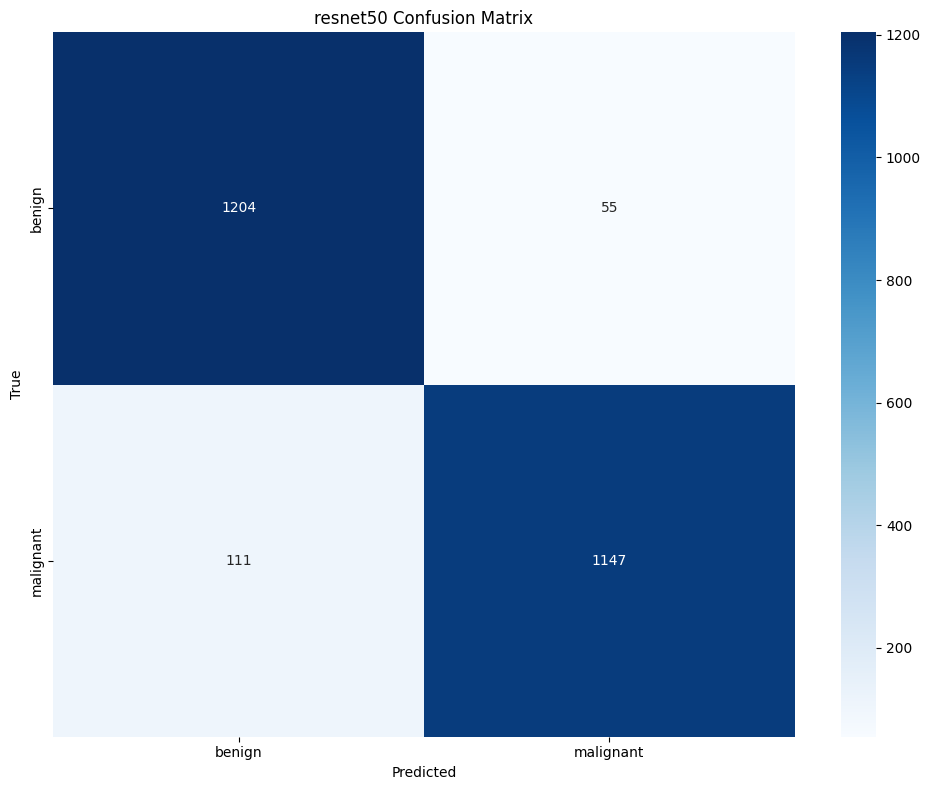

[2025-04-12 18:09:15] 
resnet50 Binary Classification Metrics:
[2025-04-12 18:09:15] Sensitivity (Recall): 0.9118
[2025-04-12 18:09:15] Specificity: 0.9563
[2025-04-12 18:09:15] Precision: 0.9542
[2025-04-12 18:09:15] F1 Score: 0.9325
[2025-04-12 18:09:15] Using TPU for computation
[2025-04-12 18:09:15] Computing ROC curve for resnet50...


Getting ROC data for resnet50: 100%|██████████| 20/20 [00:53<00:00,  2.69s/it]


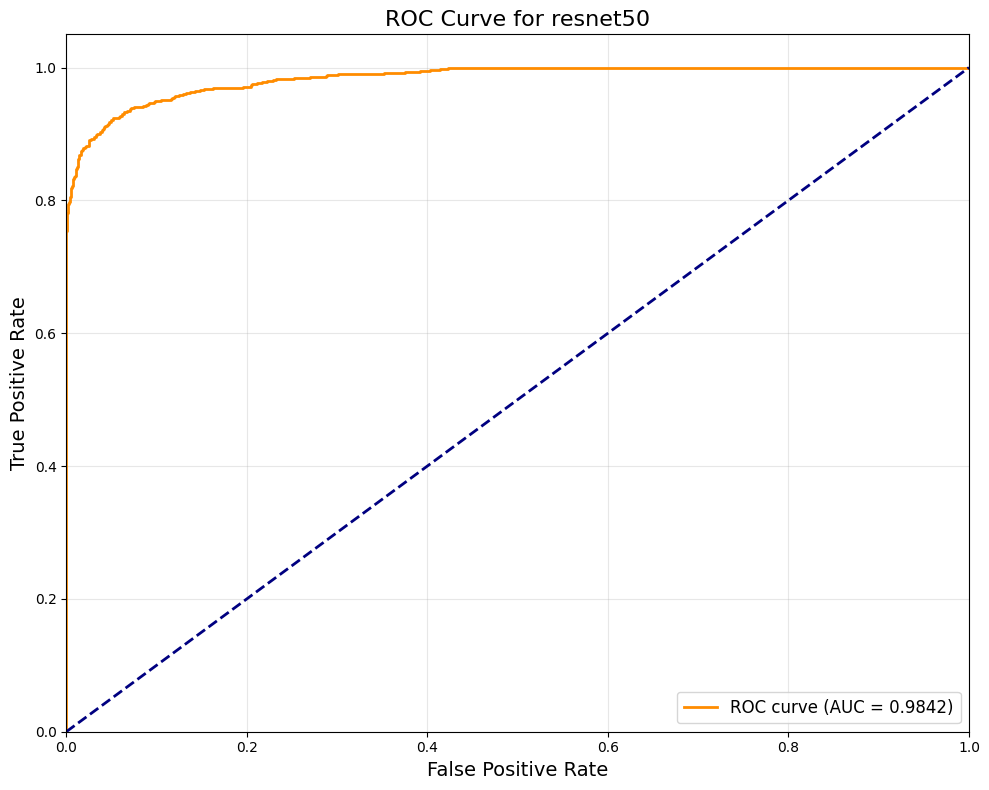

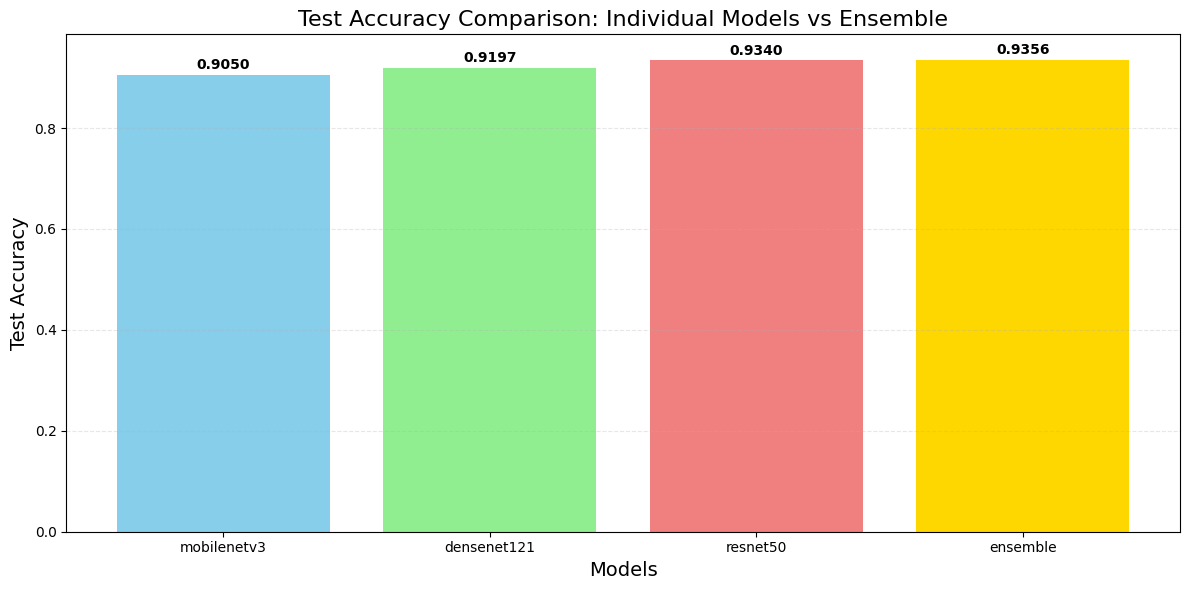

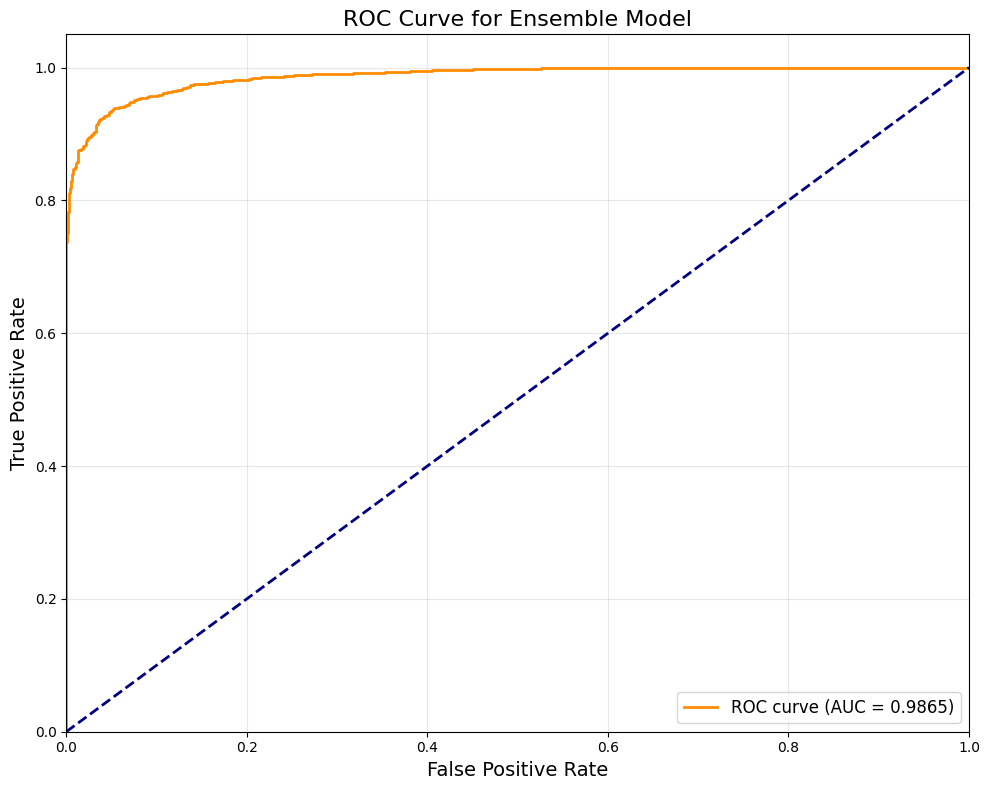

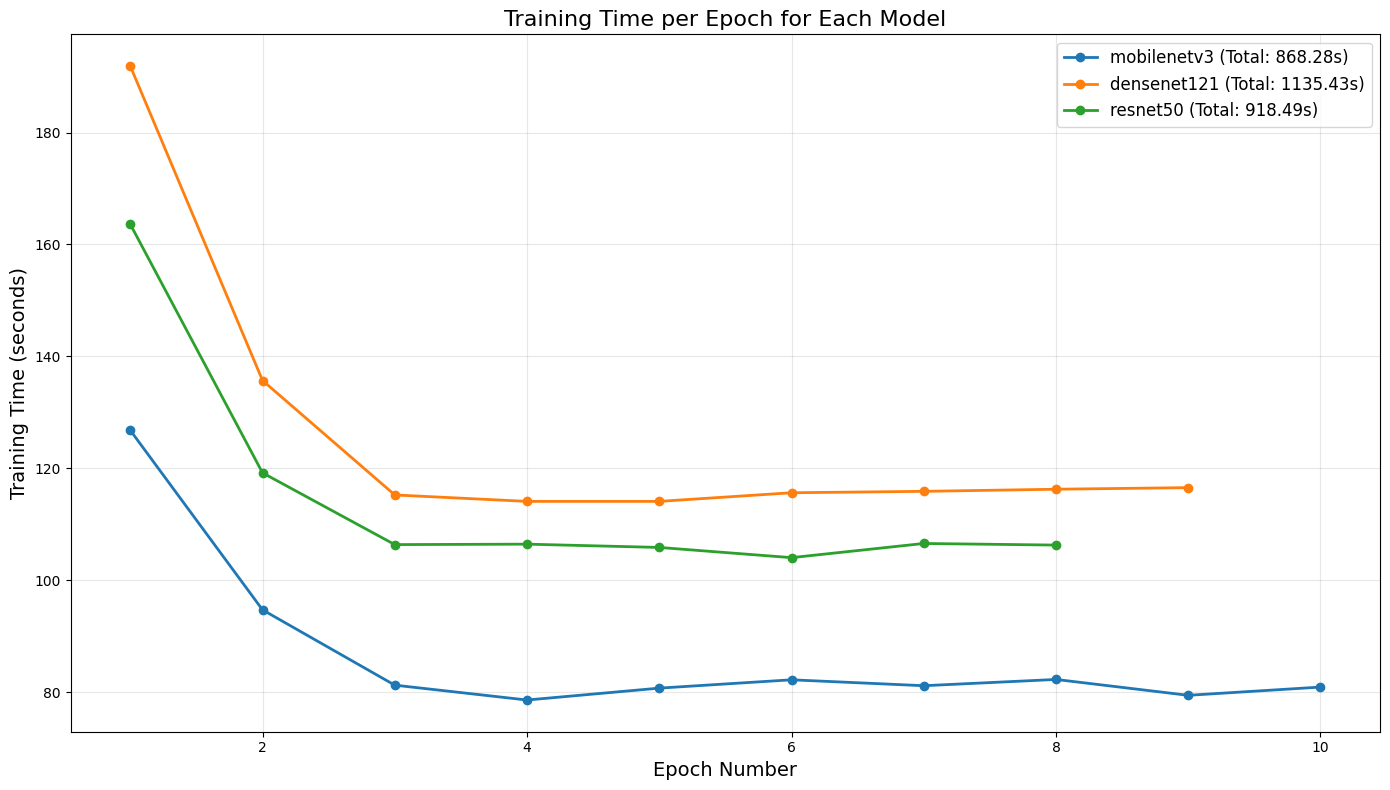

[2025-04-12 18:10:12] 
----- Creating visualization for before and after augmentation -----


<Figure size 1200x600 with 0 Axes>

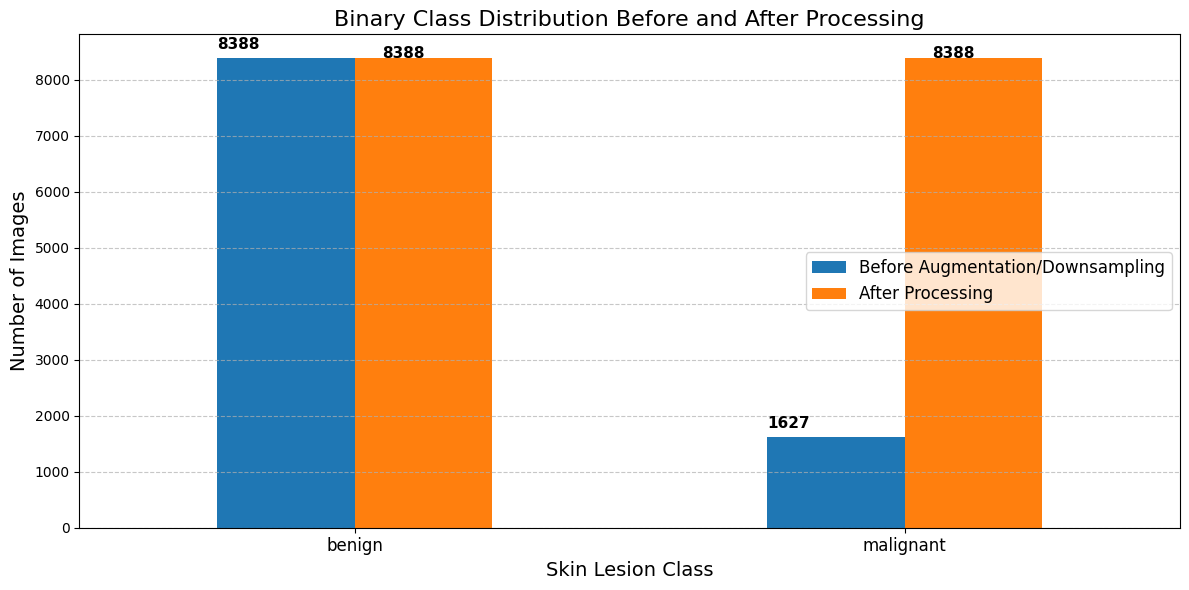

[2025-04-12 18:10:13] 
=== Binary Skin Cancer Classification Completed Successfully ===


In [1]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import time
import random
import copy
from collections import Counter
import ssl
import gc
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
import datetime

# Fix for SSL certificate issue
ssl._create_default_https_context = ssl._create_unverified_context

# Function to log messages 
def log_message(message, log_file="/kaggle/working/progress_log.txt"):
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    formatted_message = f"[{timestamp}] {message}"
    
    # Print to console
    print(formatted_message)
    
    # Write to log file
    with open(log_file, "a") as f:
        f.write(formatted_message + "\n")

# Determine optimal thread count based on system
cpu_count = multiprocessing.cpu_count()
optimal_threads = max(1, cpu_count - 1)

# Set environment variables for optimized performance
os.environ['OMP_NUM_THREADS'] = str(optimal_threads)
os.environ['MKL_NUM_THREADS'] = str(optimal_threads)
os.environ['NUMEXPR_NUM_THREADS'] = str(optimal_threads)
os.environ['VECLIB_MAXIMUM_THREADS'] = str(optimal_threads)
os.environ['OPENBLAS_NUM_THREADS'] = str(optimal_threads)

# Set up device (TPU/GPU/CPU)
def setup_device():
    try:
        import torch_xla
        import torch_xla.core.xla_model as xm
        device = xm.xla_device()
        log_message("Using TPU for computation")
        return device, "tpu"
    except ImportError:
        if torch.cuda.is_available():
            device = torch.device("cuda")
            log_message(f"Using GPU: {torch.cuda.get_device_name(0)}")
            return device, "cuda"
        else:
            device = torch.device("cpu")
            log_message("Using CPU for computation")
            return device, "cpu"

# Memory management
def release_memory(verbose=False):
    """Release unused memory in PyTorch and trigger garbage collection"""
    before = 0
    if torch.cuda.is_available() and verbose:
        before = torch.cuda.memory_allocated()
        
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        
    collected = gc.collect(generation=2)  
    
    if torch.cuda.is_available() and verbose:
        after = torch.cuda.memory_allocated()
        log_message(f"Memory freed: {(before-after)/1024**2:.2f} MB, Objects collected: {collected}")

# Define target counts for binary classes
target_counts = {
    'benign': 8388,  # Combined count for benign classes
    'malignant': 8388 # Combined count for malignant classes
}

# Define paths for saving models
model_paths = {
    'mobilenetv3': "/kaggle/working/best_mobilenetv3_binary.pth",
    'densenet121': "/kaggle/working/best_densenet121_binary.pth",
    'resnet50': "/kaggle/working/best_resnet50_binary.pth"
}

def augment_and_prepare_dataset(dataset_path):
    log_message("\nLoading and augmenting dataset...")
    
    # Initialize progress updater for 10-minute intervals
    last_update_time = time.time()
    
    # Load metadata
    metadata_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
    metadata = pd.read_csv(metadata_file)
    
   
    metadata['binary_class'] = metadata['dx'].apply(lambda x: 'malignant' if x in ['mel', 'bcc'] else 'benign')
    
    # Calculate initial class distribution 
    initial_class_counts = metadata['binary_class'].value_counts()
    log_message("\nInitial binary class distribution:")
    for cls, count in initial_class_counts.items():
        log_message(f"{cls}: {count}")
    
    # Get image paths
    image_folders = ["HAM10000_images_part_1", "HAM10000_images_part_2"]
    image_path_dict = {}
    
    def process_folder(folder):
        local_dict = {}
        folder_path = os.path.join(dataset_path, folder)
        if os.path.exists(folder_path):
            for img_name in os.listdir(folder_path):
                if img_name.endswith('.jpg'):
                    image_id = os.path.splitext(img_name)[0]
                    local_dict[image_id] = os.path.join(folder_path, img_name)
        return local_dict
    
    # Process folders in parallel 
    if len(image_folders) > 1:
        with ThreadPoolExecutor(max_workers=len(image_folders)) as executor:
            results = list(executor.map(process_folder, image_folders))
            
        for result in results:
            image_path_dict.update(result)
    else:
        image_path_dict = process_folder(image_folders[0])
    
    # Add image paths to metadata
    metadata['image_path'] = metadata['image_id'].map(image_path_dict)
    
    # Create a plot to visualize initial class distribution
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=initial_class_counts.index, y=initial_class_counts.values)
    plt.title('Initial Binary Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(initial_class_counts.values):
        ax.text(i, count + 50, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/initial_binary_class_distribution.png", dpi=300)
    plt.show()
    
    # Log progress after 10 minutes
    current_time = time.time()
    if current_time - last_update_time > 600:  # 600 seconds = 10 minutes
        log_message("Progress: Processing dataset and downsampling if needed")
        last_update_time = current_time
    
   
    processed_metadata_list = []
    
    # For each binary class, downsample if needed
    for class_name in metadata['binary_class'].unique():
        class_samples = metadata[metadata['binary_class'] == class_name]
        target_count = target_counts[class_name]
        
        if len(class_samples) > target_count:
            log_message(f"Downsampling '{class_name}' class from {len(class_samples)} to {target_count} samples")
            class_samples = class_samples.sample(target_count, random_state=42)
        
        processed_metadata_list.append(class_samples)
    
    # Combine all processed classes
    processed_metadata = pd.concat(processed_metadata_list, ignore_index=True)
    
    # Calculate new class distribution after downsampling
    processed_class_counts = processed_metadata['binary_class'].value_counts()
    log_message("\nClass distribution after downsampling:")
    for cls, count in processed_class_counts.items():
        log_message(f"{cls}: {count}")
    
    # Define augmentation transforms
    augmentation_transforms = [
        transforms.RandomRotation(15),  # 15 degree rotation
        transforms.RandomHorizontalFlip(p=0.5),  # Horizontal flip
        transforms.RandomVerticalFlip(p=0.5),  # Vertical flip
        transforms.RandomAffine(
            degrees=0,  # No additional rotation
            translate=(0.1, 0.1),  # Width and height shift of 10%
            scale=(0.8, 1.2),  # Zoom effect with scale range of 0.2 (20%)
        ),
    ]
    
    # Use the same augmentations but at different probabilities for diversity
    strong_augmentation_transforms = [
        transforms.RandomRotation(15),  # 15 degree rotation
        transforms.RandomHorizontalFlip(p=0.8),  # Horizontal flip 
        transforms.RandomVerticalFlip(p=0.8),  # Vertical flip 
        transforms.RandomAffine(
            degrees=0,  # No additional rotation
            translate=(0.1, 0.1),  # Width and height shift of 10%
            scale=(0.8, 1.2),  # Zoom effect with scale range of 0.2 (20%)
        ),
    ]
    
    # STEP 1: Create all images (original + augmented) 
    log_message("\nSTEP 1: Processing original images and generating augmentations")
    all_images = []  
    
    # Add all original images
    for idx, row in tqdm(processed_metadata.iterrows(), total=len(processed_metadata), desc="Processing original images"):
        try:
            img_path = row['image_path']
            label = row['binary_class']
            image_id = row['image_id']
            
            if pd.isna(img_path):
                continue
                
            # Load original image and add to the list
            img = Image.open(img_path).convert('RGB')
            all_images.append((img, label, f"{image_id}_orig"))
            
        except Exception as e:
            log_message(f"Error processing image {row['image_id']}: {e}")
    
    # Log progress after 10 minutes
    current_time = time.time()
    if current_time - last_update_time > 600:
        log_message("Progress: Original images processed, beginning augmentation")
        last_update_time = current_time
    
    # Create augmented data
    log_message("\nGenerating augmented images...")
    
    for class_name, target_count in target_counts.items():
        # Get original samples for this class
        class_samples = processed_metadata[processed_metadata['binary_class'] == class_name]
        current_count = len(class_samples)
        
        if current_count >= target_count:
            log_message(f"Class '{class_name}' already has {current_count} samples, no augmentation needed")
            continue
            
        # Calculate how many augmented samples 
        num_augmented_needed = target_count - current_count
        
        log_message(f"Augmenting '{class_name}' class: adding {num_augmented_needed} samples to reach {target_count}")
        
        # Pre-load images to improve performance
        preloaded_images = {}
        for _, row in tqdm(class_samples.iterrows(), desc=f"Preloading images for {class_name}", total=len(class_samples)):
            try:
                img_path = row['image_path']
                if pd.isna(img_path):
                    continue
                preloaded_images[row['image_id']] = Image.open(img_path).convert('RGB')
            except Exception as e:
                log_message(f"Error preloading image {row['image_id']}: {e}")
        
        # Generate augmented samples
        counter = 0
        augmentation_count = 0
        indices = list(range(len(class_samples)))
        
        while counter < num_augmented_needed:
            # Cycle through the indices
            idx = indices[augmentation_count % len(indices)]
            sample = class_samples.iloc[idx]
            image_id = sample['image_id']
            
            try:
                # Get the preloaded image
                if image_id not in preloaded_images:
                    augmentation_count += 1
                    continue
                    
                img = preloaded_images[image_id]
                
                # Decide which augmentation strategy to use
                if counter % 5 == 0:  # Every 5th augmentation, use strong mix
                    # Apply the strong augmentations
                    aug_img = img
                    for transform in strong_augmentation_transforms:
                        aug_img = transform(aug_img)
                
                else:
                    # Apply the standard augmentations
                    aug_img = img
                    for transform in augmentation_transforms:
                        aug_img = transform(aug_img)
                
                # Add augmented image to the list
                all_images.append((aug_img, class_name, f"{sample['image_id']}_aug_{counter}"))
                counter += 1
                
                if counter % 3000 == 0:
                    log_message(f"Generated {counter}/{num_augmented_needed} augmented samples for class {class_name}")
                    release_memory()
                    
                # Log progress every 10 minutes
                current_time = time.time()
                if current_time - last_update_time > 600:
                    log_message(f"Progress: Augmenting class {class_name} - {counter}/{num_augmented_needed} samples created")
                    last_update_time = current_time
                    
            except Exception as e:
                log_message(f"Error generating augmented image: {e}")
            
            augmentation_count += 1
    
    # Clean up preloaded images to free memory
    preloaded_images = None
    release_memory()
    
    # STEP 2: Create different transforms for each model architecture
    log_message(f"\nSTEP 2: Creating transforms for different model architectures")
    
    # Define model-specific transforms
    transforms_dict = {
        'mobilenetv3': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]),
        'densenet121': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]),
        'resnet50': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    }
    
    # Process all images 
    all_processed_data = []
    
    default_transform = transforms_dict['mobilenetv3']
    
    log_message(f"Applying resize and normalize for dataset splitting...")
    for img, label, image_id in tqdm(all_images, desc="Processing images"):
        img_tensor = default_transform(img)
        all_processed_data.append((img_tensor, label, image_id, img))  
        
        # Log progress every 10 minutes
        current_time = time.time()
        if current_time - last_update_time > 600:
            log_message(f"Progress: Processing and normalizing images - {len(all_processed_data)}/{len(all_images)} completed")
            last_update_time = current_time
    
    # Calculate class distribution in final dataset
    label_counts = {}
    for _, label, _, _ in all_processed_data:
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1
    
    # Visualize final class distribution with a bar chart
    plt.figure(figsize=(12, 6))
    classes = sorted(label_counts.keys())
    counts = [label_counts[cls] for cls in classes]
    
    ax = sns.barplot(x=classes, y=counts)
    plt.title('Final Binary Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(counts):
        ax.text(i, count + 5, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/final_binary_class_distribution.png", dpi=300)
    plt.show()
    
    # STEP 3: Split the dataset
    log_message("\nSTEP 3: Splitting dataset into train, validation, and test sets")
    
    # Create class to index mapping
    classes = sorted(list(set([label for _, label, _, _ in all_processed_data])))
    class_to_idx = {cls: i for i, cls in enumerate(classes)}
    
    # Convert string labels to indices
    all_dataset = [(img_tensor, class_to_idx[label], image_id, pil_img) for img_tensor, label, image_id, pil_img in all_processed_data]
    
   
    total_size = len(all_dataset)
    
    
    # First calculate 70% for training
    train_size = int(0.70 * total_size)
    # Then split the remaining 30% exactly in half for validation and test
    remaining = total_size - train_size
    val_size = remaining // 2  
    test_size = remaining - val_size  
    
    # If there's an odd number remaining, add the extra one to training
    if val_size != test_size:
        train_size += 1
        val_size = test_size  
        
    log_message(f"Splitting dataset: {train_size} train, {val_size} validation, {test_size} test samples")
    assert val_size == test_size, "Validation and test sizes must be exactly equal"
    
    # Convert to tensor dataset for splitting
    x_data = torch.stack([item[0] for item in all_dataset])
    y_data = torch.tensor([class_to_idx[label] for _, label, _, _ in all_processed_data])
    image_ids = [item[2] for item in all_dataset]
    pil_images = [item[3] for item in all_dataset]
    
    # Use stratified splitting to maintain class distribution
    indices = np.arange(len(all_dataset))
    
    # First split: train (val+test)
    train_indices, temp_indices = train_test_split(
        indices, test_size=val_size+test_size, 
        stratify=y_data.numpy(), 
        random_state=42
    )
    
    # Second split: val vs test 
    val_indices, test_indices = train_test_split(
        temp_indices, 
        test_size=0.5,  
        stratify=y_data[temp_indices].numpy(),
        random_state=42
    )
    
    log_message(f"Validation set size: {len(val_indices)}, Test set size: {len(test_indices)}")
    
    # Count instances of each class in each split
    train_labels = [y_data[i].item() for i in train_indices]
    val_labels = [y_data[i].item() for i in val_indices]
    test_labels = [y_data[i].item() for i in test_indices]
    
    train_counts = {}
    val_counts = {}
    test_counts = {}
    
    for label in range(len(classes)):
        train_counts[label] = train_labels.count(label)
        val_counts[label] = val_labels.count(label)
        test_counts[label] = test_labels.count(label)
    
    # Plot train split class distribution
    plt.figure(figsize=(12, 6))
    train_classes = list(train_counts.keys())
    train_count_values = list(train_counts.values())
    
    ax = sns.barplot(x=[classes[i] for i in train_classes], y=train_count_values)
    plt.title('Train Split Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(train_count_values):
        ax.text(i, count + 5, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/train_split_distribution.png", dpi=300)
    plt.show()
    
    # Plot validation split class distribution
    plt.figure(figsize=(12, 6))
    val_classes = list(val_counts.keys())
    val_count_values = list(val_counts.values())
    
    ax = sns.barplot(x=[classes[i] for i in val_classes], y=val_count_values)
    plt.title('Validation Split Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(val_count_values):
        ax.text(i, count + 2, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/val_split_distribution.png", dpi=300)
    plt.show()
    
    # Plot test split class distribution
    plt.figure(figsize=(12, 6))
    test_classes = list(test_counts.keys())
    test_count_values = list(test_counts.values())
    
    ax = sns.barplot(x=[classes[i] for i in test_classes], y=test_count_values)
    plt.title('Test Split Class Distribution', fontsize=15)
    plt.xlabel('Skin Lesion Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    
    # Add count labels above the bars
    for i, count in enumerate(test_count_values):
        ax.text(i, count + 2, str(count), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/test_split_distribution.png", dpi=300)
    plt.show()
    
    # Create special datasets for each model architecture
    class MultiModelSkinLesionDataset:
        def __init__(self, data_indices, x_data, y_data, pil_images, transform):
            self.data_indices = data_indices
            self.y_data = y_data
            self.pil_images = pil_images
            self.transform = transform
            
        def __len__(self):
            return len(self.data_indices)
            
        def __getitem__(self, idx):
            index = self.data_indices[idx]
            pil_img = self.pil_images[index]
            # Apply the model-specific transform
            img_tensor = self.transform(pil_img)
            return img_tensor, self.y_data[index]
    
    # Create dataset dictionaries for each model architecture
    train_datasets = {}
    val_datasets = {}
    test_datasets = {}
    
    for model_name, transform in transforms_dict.items():
        train_datasets[model_name] = MultiModelSkinLesionDataset(train_indices, x_data, y_data, pil_images, transform)
        val_datasets[model_name] = MultiModelSkinLesionDataset(val_indices, x_data, y_data, pil_images, transform)
        test_datasets[model_name] = MultiModelSkinLesionDataset(test_indices, x_data, y_data, pil_images, transform)
    
    # Optimize batch_size based on system resources
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1e9
        
        if gpu_memory > 16:  
            batch_size = 128
        elif gpu_memory > 8:  
            batch_size = 64
        else:  
            batch_size = 32
    else:
        # Default batch size 
        batch_size = 128
    
    # Dynamically determine optimal num_workers based on CPU cores
    num_workers = min(96, os.cpu_count() or 4)
    
    log_message(f"Using batch_size={batch_size}, num_workers={num_workers}")
    
    train_loaders = {}
    val_loaders = {}
    test_loaders = {}
    
    for model_name in transforms_dict.keys():
        train_loaders[model_name] = DataLoader(
            train_datasets[model_name], 
            batch_size=batch_size, 
            shuffle=True, 
            num_workers=num_workers, 
            pin_memory=True
        )
        val_loaders[model_name] = DataLoader(
            val_datasets[model_name], 
            batch_size=batch_size, 
            shuffle=False,
            num_workers=num_workers,
            pin_memory=True
        )
        test_loaders[model_name] = DataLoader(
            test_datasets[model_name], 
            batch_size=batch_size, 
            shuffle=False,
            num_workers=num_workers,
            pin_memory=True
        )
    
    # Print shapes to verify
    for model_name, loader in train_loaders.items():
        for i, (images, labels) in enumerate(loader):
            log_message(f"{model_name} - Batch {i} - Image shape: {images.shape}, Labels shape: {labels.shape}")
            break
    
    log_message("\nDataset preparation completed successfully!")
    
    return {
        'train_loaders': train_loaders,
        'val_loaders': val_loaders,
        'test_loaders': test_loaders,
        'class_to_idx': class_to_idx,
        'idx_to_class': {v: k for k, v in class_to_idx.items()},
        'dataset_size': {
            'train': len(train_indices),
            'validation': len(val_indices),
            'test': len(test_indices),
            'total': total_size
        },
        'classes': classes
    }

# Functions to build different models for binary classification
def build_mobilenetv3_model(num_classes=2):  # Binary classification
    # Load pre-trained MobileNetV3 Large model 
    model = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.IMAGENET1K_V1)
    
    # Get correct input features
    num_features = model.classifier[0].in_features
    
    # Modify classifier for binary classification
    model.classifier = nn.Sequential(
        nn.Linear(num_features, 256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256, num_classes)
    )
    
    return model

def build_densenet121_model(num_classes=2):  # Binary classification
    # Load pre-trained DenseNet121 model
    model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
    
    # Modify the final classifier for binary classification
    num_features = model.classifier.in_features
    model.classifier = nn.Linear(num_features, num_classes)
    
    return model

def build_resnet50_model(num_classes=2):  # Binary classification
    # Load pre-trained ResNet50 model
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    
    # Modify the final fully connected layer for binary classification
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)
    
    return model

# Dictionary to store epoch times for all models
all_model_epoch_times = {}
# Dictionary to store evaluation times
model_eval_times = {}
# Dictionary to store total times (training + evaluation)
model_total_times = {}

# Training function for each model
def train_model(model, train_loader, val_loader, num_classes, model_name):
    # Set device
    device, device_type = setup_device()
    log_message(f"Using device: {device} for {model_name}")
    
    # Move model to device
    model = model.to(device)
    
    # Initialize last update time for 10-minute logging
    last_update_time = time.time()
    
    # Freeze most of the parameters for transfer learning
   
    if model_name == 'mobilenetv3':
        # Freeze all layers except the classifier
        for param in model.features.parameters():
            param.requires_grad = False
    elif model_name == 'densenet121':
        # Freeze all layers except the classifier and last dense block
        for name, param in model.named_parameters():
            if "classifier" not in name and "denseblock4" not in name:
                param.requires_grad = False
    elif model_name == 'resnet50':
        # Freeze all layers except the last block and fc layer
        for name, param in model.named_parameters():
            if "layer4" not in name and "fc" not in name:
                param.requires_grad = False
    
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    
    # Using higher learning rates for the unfrozen layers
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)
    
    # Early stopping variables
    patience = 5
    best_val_accuracy = 0.0
    early_stop_counter = 0
    
    # Track loss & accuracy
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    epoch_times = []
    
    # Record total training start time
    total_training_start = time.time()
    
    # Log message every 10 minutes during training
    log_message(f"Starting training for {model_name}, will log updates every 10 minutes")
    
    # Training loop 
    num_epochs = 10
    for epoch in range(num_epochs):
        start_time = time.time()  # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        train_progress = tqdm(train_loader, desc=f"{model_name} - Epoch {epoch+1}/{num_epochs}")
        
        for batch_idx, (images, labels) in enumerate(train_progress):
            images, labels = images.to(device), labels.to(device)
            
            # Check if we need to log progress (every 10 minutes)
            current_time = time.time()
            if current_time - last_update_time > 600:
                log_message(f"Progress: {model_name} training - Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}")
                last_update_time = current_time
            
            # Handle TPU differently
            if device_type == "tpu":
                import torch_xla.core.xla_model as xm
                
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                xm.mark_step()  
            else:
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
        
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                
                if device_type == "tpu":
                    import torch_xla.core.xla_model as xm
                    outputs = model(images)
                else:
                    outputs = model(images)
                    
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)
        
        val_loss = val_loss / len(val_loader)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Update learning rate based on validation accuracy
        scheduler.step(val_accuracy)
        
        # Save best model 
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            
            # Handle TPU model saving
            if device_type == "tpu":
                import torch_xla.core.xla_model as xm
                xm.save(model.state_dict(), model_paths[model_name])
            else:
                torch.save(model.state_dict(), model_paths[model_name])
                
            log_message(f" Best {model_name} model saved with Val Accuracy: {val_accuracy:.4f}")
            early_stop_counter = 0
        else:
            early_stop_counter += 1
        
        end_time = time.time()
        epoch_duration = end_time - start_time
        epoch_times.append(epoch_duration)
        
        log_message(f"\n{model_name} - Epoch {epoch+1}/{num_epochs}")
        log_message(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
        log_message(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
        log_message(f"Epoch Time: {epoch_duration:.2f} seconds")
        
        # Release memory after each epoch
        release_memory()
        
        # Early stopping
        if early_stop_counter >= patience:
            log_message(f"\nEarly stopping triggered for {model_name}. Training stopped.")
            break
    
    # Calculate total training time
    total_training_time = time.time() - total_training_start
    
    # Store epoch times and total training time for this model
    all_model_epoch_times[model_name] = epoch_times
    model_total_times[model_name + "_training"] = total_training_time
    
    log_message(f"\nTraining Complete for {model_name}!")
    log_message(f"Total Training Time: {total_training_time:.2f} seconds")
    
    # Plot loss
    plt.figure(figsize=(10,5))
    plt.plot(train_losses, label='Train Loss', marker='o')
    plt.plot(val_losses, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.legend()
    plt.savefig(f"/kaggle/working/{model_name}_loss.png", dpi=300)
    plt.show()
    
    # Plot accuracy
    plt.figure(figsize=(10,5))
    plt.plot(train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(val_accuracies, label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Training vs Validation Accuracy')
    plt.legend()
    plt.savefig(f"/kaggle/working/{model_name}_accuracy.png", dpi=300)
    plt.show()
    
    # Print time for each epoch
    log_message("\nTime taken for each epoch (seconds):")
    for epoch_num, epoch_time in enumerate(epoch_times, 1):
        log_message(f"Epoch {epoch_num}: {epoch_time:.2f} seconds")
    
    return model

# Function to plot ROC curve for a model
def plot_model_roc(model, test_loader, num_classes, idx_to_class, model_name):
    device, device_type = setup_device()
    model.to(device)
    model.eval()
    
    log_message(f"Computing ROC curve for {model_name}...")
    
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc=f"Getting ROC data for {model_name}"):
            images = images.to(device)
            
            # Get probability scores
            if device_type == "tpu":
                import torch_xla.core.xla_model as xm
                outputs = model(images)
                # Move outputs to CPU for TPU
                outputs = xm.all_gather(outputs)
            else:
                outputs = model(images)
                
            probs = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
            
            all_probs.append(probs)
            all_labels.extend(labels.cpu().numpy())
    
    # Stack all batches
    all_probs = np.vstack(all_probs)
    all_labels = np.array(all_labels)
    
    # For binary classification
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(all_labels, all_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve for {model_name}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/{model_name}_roc_curve.png", dpi=300)
    plt.show()
    
    return fpr, tpr, roc_auc

# Function to evaluate each individual model
def evaluate_individual_model(model, test_loader, idx_to_class, model_name, num_classes=2):
    device, device_type = setup_device()
    
    # Record the evaluation time
    start_time = time.time()
    
    log_message(f"Evaluating {model_name}...")
    
    # Load best model
    if device_type == "tpu":
        import torch_xla.core.xla_model as xm
        model.load_state_dict(torch.load(model_paths[model_name], map_location="cpu"))
    else:
        try:
            model.load_state_dict(torch.load(model_paths[model_name]))
        except:
            model.load_state_dict(torch.load(model_paths[model_name], map_location=device))
    
    model.to(device)
    model.eval()
    
    # Test evaluation
    correct_test = 0
    total_test = 0
    all_preds = []
    all_labels = []
    all_probs = []
    
    # Initialize last update time for 10-minute logging
    last_update_time = time.time()
    
    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(tqdm(test_loader, desc=f"Evaluating {model_name}")):
            images, labels = images.to(device), labels.to(device)
            
            # Check if we need to log progress 
            current_time = time.time()
            if current_time - last_update_time > 600:
                log_message(f"Progress: Evaluating {model_name} - Batch {batch_idx}/{len(test_loader)}")
                last_update_time = current_time
                
            if device_type == "tpu":
                import torch_xla.core.xla_model as xm
                outputs = model(images)
            else:
                outputs = model(images)
                
            _, predicted = torch.max(outputs, 1)
            probs = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
            
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.append(probs)
    
    # Calculate evaluation time
    eval_time = time.time() - start_time
    model_eval_times[model_name] = eval_time
    
    test_accuracy = correct_test / total_test
    log_message(f"\n{model_name} Test Accuracy: {test_accuracy:.4f}")
    
    # Convert indices to class names
    label_names = [idx_to_class[i] for i in range(len(idx_to_class))]
    
    # Generate classification report
    log_message(f"\n{model_name} Classification Report:")
    try:
        report = classification_report(all_labels, all_preds, target_names=label_names, output_dict=True, zero_division=0)
        report_df = pd.DataFrame(report).transpose()
        log_message(str(report_df.round(3)))
    except Exception as e:
        log_message(f"Error generating classification report: {e}")
        report = None
    
    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f"/kaggle/working/{model_name}_confusion_matrix.png", dpi=300)
    plt.show()
    
    # Stack all probability batches
    all_probs = np.vstack(all_probs)
    
    # Calculate specificity, sensitivity, precision for binary classification
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    log_message(f"\n{model_name} Binary Classification Metrics:")
    log_message(f"Sensitivity (Recall): {sensitivity:.4f}")
    log_message(f"Specificity: {specificity:.4f}")
    log_message(f"Precision: {precision:.4f}")
    log_message(f"F1 Score: {f1:.4f}")
    
    # Plot ROC curve for this model
    plot_model_roc(model, test_loader, num_classes, idx_to_class, model_name)
    
    return all_preds, all_labels, test_accuracy, report, eval_time

# Function to evaluate ensemble using majority voting
def evaluate_ensemble(models, test_loaders, idx_to_class):
    device, device_type = setup_device()
    num_classes = len(idx_to_class)
    
    # Record the ensemble evaluation start time
    ensemble_start_time = time.time()
    
    log_message("\nEvaluating ensemble model...")
    
    # Initialize last update time for 10-minute logging
    last_update_time = time.time()
    
    # Load best models for each architecture
    for model_name, model in models.items():
        # Check if we need to log progress (every 10 minutes)
        current_time = time.time()
        if current_time - last_update_time > 600:
            log_message(f"Progress: Loading best {model_name} model for ensemble")
            last_update_time = current_time
            
        if device_type == "tpu":
            import torch_xla.core.xla_model as xm
            model.load_state_dict(torch.load(model_paths[model_name], map_location="cpu"))
        else:
            try:
                model.load_state_dict(torch.load(model_paths[model_name]))
            except:
                model.load_state_dict(torch.load(model_paths[model_name], map_location=device))
        
        model.to(device)
        model.eval()
    
    # Store all model predictions
    all_model_predictions = []
    all_model_probabilities = []
    true_labels = []
    test_data_size = 0
    
    # Get predictions from each model
    log_message("\nGathering predictions from all models")
    for model_name, model in models.items():
        model_predictions = []
        model_probabilities = []
        
        # Check if we need to log progress (every 10 minutes)
        current_time = time.time()
        if current_time - last_update_time > 600:
            log_message(f"Progress: Getting predictions from {model_name}")
            last_update_time = current_time
            
        with torch.no_grad():
            for batch_idx, (images, labels) in enumerate(tqdm(test_loaders[model_name], desc=f"Getting {model_name} predictions")):
                if model_name == 'mobilenetv3' and len(true_labels) < len(test_loaders[model_name].dataset):
                    true_labels.extend(labels.cpu().numpy())
                
                # Check if we need to log progress (every 10 minutes)
                current_time = time.time()
                if current_time - last_update_time > 600:
                    log_message(f"Progress: {model_name} prediction - Batch {batch_idx}/{len(test_loaders[model_name])}")
                    last_update_time = current_time
                    
                images = images.to(device)
                
                if device_type == "tpu":
                    import torch_xla.core.xla_model as xm
                    outputs = model(images)
                   
                    outputs = xm.all_gather(outputs)
                else:
                    outputs = model(images)
                    
                probs = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
                _, predicted = torch.max(outputs, 1)
                
                model_predictions.extend(predicted.cpu().numpy())
                model_probabilities.append(probs)
        
        # Stack all batches of probabilities
        model_probabilities = np.vstack(model_probabilities)
        all_model_probabilities.append(model_probabilities)
        all_model_predictions.append(model_predictions)
        test_data_size = len(model_predictions)
    
    # Perform majority voting for each test sample
    ensemble_predictions = []
    for i in range(test_data_size):
        votes = [all_model_predictions[j][i] for j in range(len(models))]
        majority_vote = Counter(votes).most_common(1)[0][0]
        ensemble_predictions.append(majority_vote)
    
    # Calculate total ensemble evaluation time
    ensemble_total_time = time.time() - ensemble_start_time
    model_eval_times['ensemble'] = ensemble_total_time
    
    # Calculate ensemble accuracy
    correct = sum(1 for a, b in zip(ensemble_predictions, true_labels) if a == b)
    ensemble_accuracy = correct / test_data_size
    
    log_message("\n----- Majority Voting Ensemble Results -----")
    log_message(f"Ensemble Test Accuracy: {ensemble_accuracy:.4f}")
    log_message(f"Ensemble Evaluation Time: {ensemble_total_time:.2f} seconds")
    
    # Convert indices to class names
    label_names = [idx_to_class[i] for i in range(len(idx_to_class))]
    
    # Generate classification report for ensemble
    log_message("\nClassification Report of Majority Voting Ensemble (MobileNetV3, DenseNet121, ResNet50):")
    try:
        ensemble_report = classification_report(true_labels, ensemble_predictions, target_names=label_names, output_dict=True, zero_division=0)
        ensemble_report_df = pd.DataFrame(ensemble_report).transpose()
        log_message(str(ensemble_report_df.round(3)))
    except Exception as e:
        log_message(f"Error generating ensemble classification report: {e}")
        ensemble_report = {}
    
    # Generate confusion matrix for ensemble
    ensemble_cm = confusion_matrix(true_labels, ensemble_predictions)
    
    # Plot confusion matrix for ensemble
    plt.figure(figsize=(10, 8))
    sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of Majority Voting Ensemble\nMobileNetV3, DenseNet121, ResNet50')
    plt.tight_layout()
    plt.savefig("/kaggle/working/ensemble_confusion_matrix.png", dpi=300)
    plt.show()
    
    # Binary metrics
    tn, fp, fn, tp = ensemble_cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    log_message(f"\nEnsemble Binary Classification Metrics:")
    log_message(f"Sensitivity (Recall): {sensitivity:.4f}")
    log_message(f"Specificity: {specificity:.4f}")
    log_message(f"Precision: {precision:.4f}")
    log_message(f"F1 Score: {f1:.4f}")
    
    # Compare individual models with ensemble
    model_accuracies = {}
    
    # Store individual model performances
    for model_name, model in models.items():
        _, _, accuracy, report, eval_time = evaluate_individual_model(
            model, 
            test_loaders[model_name],
            idx_to_class,
            model_name,
            num_classes
        )
        model_accuracies[model_name] = accuracy
    
    # Add ensemble performance
    model_accuracies['ensemble'] = ensemble_accuracy
    
    # Plot comparison of accuracies
    plt.figure(figsize=(12, 6))
    accuracy_bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), 
                        color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Test Accuracy', fontsize=14)
    plt.title('Test Accuracy Comparison: Individual Models vs Ensemble', fontsize=16)

    # Add values on top of bars
    for bar in accuracy_bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.ylim(0, max(model_accuracies.values()) + 0.05)  
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig('/kaggle/working/model_accuracy_comparison.png', dpi=300)
    plt.show()
    
    # Calculate ensemble probabilities 
    ensemble_probs = np.zeros_like(all_model_probabilities[0])
    for model_prob in all_model_probabilities:
        ensemble_probs += model_prob
    ensemble_probs /= len(all_model_probabilities)
    
    # Binary ROC curve for ensemble
    fpr, tpr, _ = roc_curve(true_labels, ensemble_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for ensemble
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve for Ensemble Model', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('/kaggle/working/ensemble_roc_curve.png', dpi=300)
    plt.show()
    
    # Create a line graph for epoch training times across all models
    plt.figure(figsize=(14, 8))
    
    # For each model, plot its epoch times
    for model_name, epoch_times in all_model_epoch_times.items():
       
        epochs = list(range(1, len(epoch_times) + 1))
        plt.plot(epochs, epoch_times, marker='o', linewidth=2, label=f"{model_name} (Total: {sum(epoch_times):.2f}s)")
    
    plt.xlabel('Epoch Number', fontsize=14)
    plt.ylabel('Training Time (seconds)', fontsize=14)
    plt.title('Training Time per Epoch for Each Model', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig("/kaggle/working/model_training_times.png", dpi=300)
    plt.show()
    
    return ensemble_predictions, true_labels, ensemble_accuracy, ensemble_report

# Main function
def main():
    # Set device 
    device, device_type = setup_device()
    log_message(f"Using device: {device}")
    
    # Apply optimizations to PyTorch for faster processing
    if device_type == 'cuda':
        # Empty cache before starting
        torch.cuda.empty_cache()
        
        # Optimize CUDA operations
        torch.backends.cudnn.benchmark = True
        # Use TensorFloat32 tensor cores in Ampere GPUs (if available)
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
    elif device_type == 'tpu':
        log_message("Using TPU-specific settings")
    
    # Specify dataset path
    dataset_path = "/kaggle/input/skin-cancer-mnist-ham10000/"
    
    # Run augmentation and preparation
    result = augment_and_prepare_dataset(dataset_path)
    
    # Display dataset information
    log_message("\nDataset Information:")
    log_message(f"Classes: {result['classes']}")
    log_message(f"Dataset sizes: {result['dataset_size']}")
    
    # Number of classes
    num_classes = len(result['class_to_idx'])
    assert num_classes == 2, "This code is specifically for binary classification"
    
    # Build models
    models = {
        'mobilenetv3': build_mobilenetv3_model(num_classes),
        'densenet121': build_densenet121_model(num_classes),
        'resnet50': build_resnet50_model(num_classes)
    }
    
    # Train each model
    for model_name, model in models.items():
        log_message(f"\n----- Training {model_name} -----")
        train_model(
            model,
            result['train_loaders'][model_name],
            result['val_loaders'][model_name],
            num_classes,
            model_name
        )
    
    # Evaluate ensemble
    log_message("\n----- Evaluating Ensemble Model -----")
    evaluate_ensemble(models, result['test_loaders'], result['idx_to_class'])

    # Create visualization for before/after augmentation
    log_message("\n----- Creating visualization for before and after augmentation -----")
    
    # Original class distribution
    metadata_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
    metadata = pd.read_csv(metadata_file)
    
    # Convert multi-class to binary for visualization
    metadata['binary_class'] = metadata['dx'].apply(lambda x: 'malignant' if x in ['mel', 'bcc'] else 'benign')
    initial_class_counts = metadata['binary_class'].value_counts()
    
    # Final distributions are the target counts
    augmented_counts = pd.Series(target_counts)
    
    # Create a DataFrame 
    comparison_df = pd.DataFrame({
        'Before Augmentation/Downsampling': initial_class_counts,
        'After Processing': augmented_counts
    })
    
    # Plot side by side bar chart
    plt.figure(figsize=(12, 6))
    comparison_df.plot(kind='bar', figsize=(12, 6))
    plt.title('Binary Class Distribution Before and After Processing', fontsize=16)
    plt.xlabel('Skin Lesion Class', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add count labels above bars
    for i, (_, row) in enumerate(comparison_df.iterrows()):
        plt.text(i-0.25, row['Before Augmentation/Downsampling']+150, 
                f'{row["Before Augmentation/Downsampling"]}', 
                fontweight='bold', fontsize=11)
        plt.text(i+0.05, row['After Processing']+5, 
                f'{row["After Processing"]}', 
                fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/before_after_processing.png', dpi=300)
    plt.show()
    
    # Log final completion message
    log_message("\n=== Binary Skin Cancer Classification Completed Successfully ===")

if __name__ == "__main__":
    # Set random seeds for reproducibility 
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    
    try:
        main()
    except Exception as e:
        # Log any exceptions to help debug issues
        with open("/kaggle/working/error_log.txt", "a") as f:
            timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            f.write(f"[{timestamp}] ERROR: {str(e)}\n")
            import traceback
            f.write(traceback.format_exc())